In this worksheet, results of a number of training runs with different feature selections and neural network models are being evaluated. See [feature-comparison](qm_usage_mlp-feature-comparison.py) and [model-comparison](qm_usage_mlp-model-comparison.py).

Those were run with dataset-2 (226663 entries of 77001 products), max_words=20000, 20 epochs (by default) and a batch_size of 4096.

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Variance

Before we start comparing statistics like loss, accuracy and recall, let's have a look at what the range of values we can expect for a single dataset. Since training involves randomness, the result is different each time, even when trained on the same data.

In [2]:
# all trained for 8 epochs with model B and feature selection method A
variance_scores = np.asarray([
    # score,             recall,             accuracy
    [0.9705809511183767, 0.8356068875408901, 0.8470655997998934],
    [0.9536293754870203, 0.8361828541978281, 0.8463986905412962],
    [0.9948492326909331, 0.8311810356003452, 0.8427913181273247],
    [0.9116820501055416, 0.8343033829544246, 0.8460955497451561],
    [0.9858511463141925, 0.8288165395355548, 0.8412756153897428],
    [0.9309634310094548, 0.8356978297016758, 0.8467624591193923],
])

print("loss:     %.4f +/- %.4f"%(np.average(variance_scores[:,0]),np.std(variance_scores[:,0])))
print("recall:   %.4f +/- %.4f"%(np.average(variance_scores[:,1]),np.std(variance_scores[:,1])))
print("accuracy: %.4f +/- %.4f"%(np.average(variance_scores[:,2]),np.std(variance_scores[:,2])))

loss:     0.9579 +/- 0.0294
recall:   0.8336 +/- 0.0027
accuracy: 0.8451 +/- 0.0022


So for recall and accuracy, we have a 0.2%-0.3% standard deviation. This is likely to decrease just a little for many more epochs.

# Feature comparison

Different features were extracted, and the model was trained on that. The following data are: statistics of the validation set, statistics during training (at the end of each epoch), and labels of the feature extraction methods.

In [3]:
feat_scores = np.asarray([
    # score,             recall,              accuracy
    [1.3300816675362033, 0.8321462645212304, 0.837011130568712],
    [1.2040877068448936, 0.8481265915600881, 0.8524008731170178],
    [1.333840507663818, 0.8333078777523881, 0.8381342247952814],
    [1.1963904382695076, 0.849490687040832, 0.853683446925986],
    [7.59920597076416, 0.3177737891674042, 0.33213645219802856],
    [6.040985584259033, 0.28351449966430664, 0.3115941882133484],
    [1.1461018181635634, 0.8478232793329976, 0.8524738407292087],
    [1.2765283045205649, 0.8358205173845075, 0.8402186343747778],
    [2.983195533726532, 0.6358046725998531, 0.6471008821153195],
    [1.3576506373218575, 0.8218363168100598, 0.8271270524102627],
    [1.3869370918055712, 0.8173590687920367, 0.8234692565242485],
    [1.2279427526987263, 0.8375492552721744, 0.8428625890437963],
    [1.317698234163724, 0.8332735916040809, 0.8378821251499676],
])
feat_history = [np.asarray(a) for a in [
    # [[time, loss, recall, accuracy, val_loss, val_recall, val_accuracy]]
    # each line was generated with: echo `grep '^ -' logfile | cut -d' ' -f3,6,9,12,15,18,21 --output-delimiter=, | sed 's/s,/,/;s/^/[/;s/$/],/'` | sed 's/^/[/;s/,$/],/'
    [[87,5.6119,0.0462,0.1159,4.1790,0.2000,0.3479], [77,3.0834,0.3494,0.4820,2.2197,0.4996,0.6083], [77,1.4968,0.6202,0.7131,1.3757,0.6615,0.7423], [77,0.7359,0.7838,0.8421,1.0551,0.7503,0.7992], [77,0.3956,0.8753,0.9060,0.9688,0.7877,0.8187], [76,0.2447,0.9198,0.9383,0.9796,0.8048,0.8260], [77,0.1696,0.9454,0.9567,1.0062,0.8195,0.8321], [76,0.1281,0.9602,0.9671,1.0020,0.8211,0.8347], [77,0.1012,0.9691,0.9741,1.0431,0.8276,0.8379], [76,0.0905,0.9740,0.9777,1.0487,0.8258,0.8372], [77,0.0750,0.9791,0.9817,1.0726,0.8281,0.8381], [76,0.0676,0.9820,0.9841,1.0865,0.8293,0.8386], [77,0.0633,0.9834,0.9850,1.0887,0.8313,0.8402], [76,0.0574,0.9855,0.9868,1.1076,0.8326,0.8398], [76,0.0531,0.9872,0.9884,1.1234,0.8326,0.8406], [76,0.0495,0.9884,0.9893,1.1299,0.8328,0.8406], [76,0.0477,0.9889,0.9898,1.1377,0.8351,0.8419], [76,0.0429,0.9900,0.9907,1.1377,0.8347,0.8407], [76,0.0413,0.9907,0.9913,1.1635,0.8333,0.8403], [76,0.0397,0.9913,0.9918,1.1744,0.8369,0.8424], [76,0.0398,0.9917,0.9922,1.1788,0.8346,0.8406], [76,0.0379,0.9917,0.9921,1.1942,0.8369,0.8428], [76,0.0382,0.9917,0.9922,1.1823,0.8367,0.8429], [77,0.0361,0.9922,0.9925,1.1973,0.8366,0.8422], [76,0.0370,0.9920,0.9924,1.1763,0.8373,0.8430], [76,0.0349,0.9925,0.9929,1.2145,0.8357,0.8413], [76,0.0355,0.9927,0.9932,1.1927,0.8360,0.8424], [76,0.0353,0.9928,0.9931,1.2167,0.8355,0.8411], [76,0.0348,0.9929,0.9934,1.2172,0.8378,0.8442], [76,0.0327,0.9932,0.9936,1.2514,0.8353,0.8413], [76,0.0342,0.9930,0.9934,1.2303,0.8346,0.8400], [76,0.0326,0.9933,0.9936,1.2578,0.8364,0.8415], [76,0.0336,0.9926,0.9931,1.2480,0.8366,0.8415], [76,0.0324,0.9933,0.9936,1.2347,0.8368,0.8424], [76,0.0326,0.9934,0.9937,1.2814,0.8337,0.8385], [76,0.0336,0.9927,0.9931,1.2650,0.8359,0.8415], [77,0.0316,0.9933,0.9937,1.2874,0.8347,0.8402], [76,0.0340,0.9929,0.9932,1.2757,0.8343,0.8398], [76,0.0336,0.9929,0.9934,1.2756,0.8354,0.8401], [76,0.0315,0.9933,0.9938,1.3201,0.8344,0.8396], [76,0.0330,0.9929,0.9934,1.2926,0.8368,0.8417], [76,0.0339,0.9932,0.9935,1.3073,0.8352,0.8400], [76,0.0331,0.9930,0.9933,1.3048,0.8358,0.8406], [76,0.0338,0.9930,0.9934,1.3124,0.8348,0.8395], [76,0.0335,0.9928,0.9933,1.2999,0.8346,0.8399], [76,0.0337,0.9930,0.9934,1.3082,0.8354,0.8408], [76,0.0334,0.9930,0.9934,1.3216,0.8338,0.8380], [76,0.0338,0.9928,0.9932,1.3399,0.8342,0.8391], [76,0.0364,0.9924,0.9928,1.3111,0.8324,0.8384], [76,0.0356,0.9922,0.9926,1.3386,0.8326,0.8382]],
    [[91,5.5734,0.0478,0.1220,4.0318,0.2211,0.3528], [81,2.9717,0.3672,0.4946,2.0732,0.5190,0.6293], [81,1.4053,0.6379,0.7286,1.2772,0.6866,0.7575], [81,0.6803,0.7980,0.8526,0.9883,0.7685,0.8125], [80,0.3699,0.8830,0.9113,0.9269,0.8018,0.8291], [80,0.2332,0.9255,0.9419,0.9298,0.8206,0.8382], [81,0.1679,0.9467,0.9576,0.9382,0.8332,0.8461], [80,0.1234,0.9624,0.9690,0.9705,0.8348,0.8452], [80,0.1019,0.9703,0.9749,0.9812,0.8384,0.8479], [81,0.0860,0.9756,0.9790,0.9956,0.8414,0.8496], [80,0.0768,0.9793,0.9817,1.0109,0.8403,0.8484], [80,0.0704,0.9818,0.9840,1.0289,0.8385,0.8469], [80,0.0623,0.9837,0.9854,1.0401,0.8414,0.8479], [81,0.0612,0.9848,0.9861,1.0288,0.8440,0.8517], [81,0.0558,0.9867,0.9878,1.0706,0.8426,0.8493], [80,0.0514,0.9879,0.9888,1.0645,0.8446,0.8503], [80,0.0513,0.9883,0.9892,1.0600,0.8442,0.8514], [80,0.0450,0.9898,0.9906,1.0890,0.8472,0.8531], [80,0.0437,0.9902,0.9908,1.0948,0.8453,0.8511], [80,0.0439,0.9904,0.9910,1.0912,0.8454,0.8514], [81,0.0420,0.9908,0.9915,1.0911,0.8457,0.8517], [80,0.0405,0.9913,0.9918,1.1169,0.8456,0.8508], [81,0.0402,0.9913,0.9918,1.1161,0.8472,0.8523], [80,0.0390,0.9915,0.9920,1.1463,0.8461,0.8516], [80,0.0380,0.9914,0.9919,1.1249,0.8453,0.8510], [80,0.0387,0.9913,0.9918,1.1375,0.8454,0.8500], [80,0.0385,0.9915,0.9920,1.1503,0.8470,0.8520], [80,0.0366,0.9919,0.9924,1.1589,0.8474,0.8510], [80,0.0376,0.9917,0.9921,1.1643,0.8449,0.8506], [80,0.0372,0.9919,0.9924,1.1751,0.8465,0.8508], [80,0.0369,0.9918,0.9923,1.1716,0.8439,0.8489], [81,0.0359,0.9923,0.9928,1.1756,0.8459,0.8501], [80,0.0356,0.9920,0.9925,1.1719,0.8460,0.8506], [80,0.0347,0.9922,0.9926,1.1784,0.8453,0.8499], [80,0.0354,0.9921,0.9925,1.1913,0.8459,0.8508], [80,0.0354,0.9921,0.9926,1.2014,0.8457,0.8503], [80,0.0368,0.9917,0.9921,1.2033,0.8462,0.8510], [80,0.0372,0.9917,0.9922,1.1872,0.8444,0.8490], [80,0.0366,0.9916,0.9922,1.2110,0.8459,0.8502], [80,0.0383,0.9913,0.9917,1.1991,0.8444,0.8496], [80,0.0356,0.9917,0.9922,1.2010,0.8453,0.8511], [80,0.0360,0.9916,0.9921,1.2266,0.8466,0.8506], [80,0.0375,0.9915,0.9920,1.2077,0.8453,0.8494], [80,0.0344,0.9922,0.9927,1.2441,0.8454,0.8490], [80,0.0363,0.9916,0.9920,1.2192,0.8450,0.8499], [80,0.0344,0.9919,0.9924,1.2377,0.8460,0.8510], [80,0.0347,0.9922,0.9926,1.2344,0.8462,0.8508], [80,0.0342,0.9923,0.9927,1.2299,0.8459,0.8501], [80,0.0325,0.9926,0.9930,1.2606,0.8467,0.8507], [80,0.0336,0.9924,0.9928,1.2473,0.8444,0.8482]],
    [[100,5.7086,0.0374,0.1082,4.2699,0.1808,0.3233], [88,3.1942,0.3307,0.4604,2.2256,0.4834,0.6052], [88,1.5679,0.6025,0.6965,1.4029,0.6498,0.7268], [86,0.7928,0.7659,0.8276,1.0697,0.7366,0.7876], [85,0.4399,0.8619,0.8959,0.9713,0.7792,0.8121], [85,0.2740,0.9130,0.9330,0.9640,0.7963,0.8214], [88,0.1914,0.9393,0.9531,0.9928,0.8103,0.8276], [86,0.1432,0.9557,0.9644,1.0115,0.8183,0.8311], [87,0.1131,0.9657,0.9717,1.0324,0.8234,0.8339], [86,0.0968,0.9718,0.9759,1.0492,0.8246,0.8351], [86,0.0827,0.9771,0.9803,1.0632,0.8265,0.8366], [88,0.0766,0.9796,0.9821,1.0998,0.8259,0.8349], [85,0.0679,0.9820,0.9842,1.1058,0.8266,0.8346], [87,0.0601,0.9854,0.9868,1.1257,0.8309,0.8380], [89,0.0571,0.9868,0.9882,1.1369,0.8288,0.8365], [85,0.0533,0.9877,0.9890,1.1399,0.8320,0.8387], [85,0.0479,0.9893,0.9902,1.1819,0.8317,0.8382], [87,0.0493,0.9897,0.9905,1.1681,0.8327,0.8397], [88,0.0453,0.9905,0.9914,1.1965,0.8330,0.8388], [87,0.0428,0.9914,0.9922,1.1960,0.8331,0.8395], [84,0.0418,0.9917,0.9923,1.2176,0.8345,0.8401], [87,0.0428,0.9915,0.9922,1.1850,0.8333,0.8391], [87,0.0426,0.9917,0.9922,1.2007,0.8324,0.8383], [88,0.0380,0.9927,0.9933,1.2376,0.8339,0.8394], [87,0.0376,0.9930,0.9935,1.2351,0.8347,0.8402], [87,0.0367,0.9931,0.9936,1.2298,0.8338,0.8399], [87,0.0375,0.9929,0.9934,1.2435,0.8347,0.8399], [85,0.0372,0.9929,0.9934,1.2267,0.8357,0.8405], [86,0.0355,0.9935,0.9939,1.2415,0.8349,0.8398], [87,0.0357,0.9931,0.9936,1.2625,0.8341,0.8393], [86,0.0365,0.9931,0.9936,1.2355,0.8341,0.8399], [87,0.0332,0.9940,0.9944,1.2740,0.8331,0.8377], [87,0.0323,0.9940,0.9944,1.2935,0.8319,0.8368], [88,0.0320,0.9939,0.9943,1.2982,0.8331,0.8369], [86,0.0328,0.9941,0.9945,1.3122,0.8323,0.8365], [88,0.0355,0.9934,0.9939,1.2658,0.8320,0.8373], [84,0.0341,0.9937,0.9941,1.3080,0.8330,0.8379], [85,0.0325,0.9942,0.9945,1.3082,0.8320,0.8371], [86,0.0327,0.9942,0.9944,1.3252,0.8316,0.8374], [86,0.0338,0.9940,0.9943,1.2918,0.8324,0.8371], [88,0.0309,0.9946,0.9949,1.3274,0.8326,0.8366], [91,0.0319,0.9944,0.9947,1.3316,0.8313,0.8363], [85,0.0339,0.9942,0.9946,1.3170,0.8323,0.8378], [86,0.0336,0.9942,0.9946,1.3172,0.8308,0.8362], [84,0.0333,0.9944,0.9947,1.3248,0.8319,0.8361], [90,0.0334,0.9943,0.9945,1.3220,0.8314,0.8360], [92,0.0315,0.9948,0.9952,1.3318,0.8337,0.8382], [88,0.0303,0.9948,0.9951,1.3447,0.8339,0.8380], [88,0.0294,0.9950,0.9953,1.3485,0.8318,0.8359], [90,0.0294,0.9954,0.9957,1.3568,0.8320,0.8365]],
    [[101,5.7019,0.0369,0.1070,4.1922,0.1922,0.3032], [90,3.0619,0.3395,0.4636,2.1208,0.4876,0.6009], [91,1.4652,0.6092,0.7018,1.2850,0.6639,0.7414], [91,0.7360,0.7749,0.8342,0.9803,0.7561,0.8049], [91,0.4088,0.8686,0.9019,0.9015,0.7945,0.8262], [91,0.2644,0.9156,0.9347,0.9081,0.8160,0.8363], [91,0.1880,0.9418,0.9544,0.9151,0.8265,0.8422], [91,0.1440,0.9577,0.9659,0.9393,0.8303,0.8433], [91,0.1251,0.9637,0.9701,0.9430,0.8381,0.8479], [91,0.1038,0.9713,0.9757,0.9560,0.8365,0.8465], [91,0.0880,0.9768,0.9799,0.9771,0.8394,0.8488], [91,0.0867,0.9778,0.9808,0.9755,0.8413,0.8506], [91,0.0767,0.9810,0.9831,0.9879,0.8450,0.8533], [91,0.0715,0.9833,0.9851,0.9858,0.8458,0.8544], [91,0.0648,0.9854,0.9867,1.0170,0.8463,0.8536], [91,0.0629,0.9861,0.9876,0.9992,0.8470,0.8546], [91,0.0563,0.9878,0.9888,1.0222,0.8471,0.8543], [91,0.0550,0.9882,0.9892,1.0360,0.8452,0.8522], [91,0.0534,0.9885,0.9896,1.0329,0.8481,0.8552], [91,0.0514,0.9889,0.9899,1.0469,0.8485,0.8553], [91,0.0538,0.9881,0.9894,1.0545,0.8490,0.8559], [91,0.0490,0.9897,0.9906,1.0786,0.8482,0.8544], [91,0.0474,0.9904,0.9910,1.0890,0.8499,0.8559], [91,0.0482,0.9904,0.9911,1.0616,0.8493,0.8554], [91,0.0497,0.9899,0.9907,1.0911,0.8486,0.8552], [91,0.0452,0.9913,0.9919,1.0951,0.8507,0.8566], [91,0.0431,0.9918,0.9924,1.0957,0.8524,0.8568], [91,0.0464,0.9910,0.9917,1.0930,0.8501,0.8560], [90,0.0473,0.9906,0.9913,1.1077,0.8496,0.8556], [91,0.0468,0.9908,0.9914,1.1031,0.8499,0.8560], [90,0.0462,0.9907,0.9914,1.1197,0.8484,0.8537], [91,0.0437,0.9914,0.9919,1.1207,0.8484,0.8542], [90,0.0455,0.9910,0.9916,1.1326,0.8503,0.8553], [90,0.0434,0.9916,0.9921,1.1208,0.8492,0.8543], [90,0.0402,0.9919,0.9924,1.1523,0.8512,0.8557], [90,0.0444,0.9913,0.9919,1.1248,0.8499,0.8546], [90,0.0454,0.9914,0.9919,1.1321,0.8514,0.8569], [90,0.0414,0.9924,0.9929,1.1704,0.8485,0.8536], [90,0.0425,0.9918,0.9923,1.1662,0.8479,0.8521], [90,0.0427,0.9918,0.9922,1.1797,0.8507,0.8547], [90,0.0431,0.9921,0.9926,1.1474,0.8497,0.8547], [90,0.0393,0.9926,0.9930,1.1862,0.8496,0.8540], [90,0.0426,0.9921,0.9926,1.1753,0.8500,0.8551], [90,0.0426,0.9921,0.9927,1.1647,0.8480,0.8525], [91,0.0418,0.9923,0.9927,1.1774,0.8497,0.8542], [91,0.0451,0.9914,0.9920,1.1610,0.8498,0.8543], [90,0.0459,0.9915,0.9922,1.1576,0.8473,0.8534], [90,0.0423,0.9921,0.9926,1.1710,0.8498,0.8556], [90,0.0411,0.9922,0.9926,1.1548,0.8502,0.8552], [90,0.0412,0.9922,0.9928,1.1858,0.8508,0.8554]],
    [[14,7.2194,0.0000e+00,5.6117e-04,7.1716,0.0000e+00,0.0179], [3,7.1525,0.0000e+00,0.0286,6.9285,0.0000e+00,0.0168], [3,6.8620,0.0000e+00,0.0222,6.4994,0.0000e+00,0.0168], [3,6.3301,0.0000e+00,0.0222,6.5585,0.0000e+00,0.0235], [3,6.2775,0.0017,0.0306,6.3488,0.0000e+00,0.0437], [3,6.0348,0.0000e+00,0.0502,6.2998,0.0000e+00,0.0605], [3,5.9542,0.0000e+00,0.0696,6.1696,0.0000e+00,0.0740], [3,5.7502,5.6117e-04,0.0929,6.0120,0.0213,0.1031], [3,5.4640,0.0222,0.1187,6.0297,0.0348,0.0695], [3,5.3489,0.0438,0.0816,5.9292,0.0504,0.1267], [3,5.1748,0.0659,0.1397,5.7961,0.0572,0.1513], [3,4.9977,0.0766,0.1813,5.6674,0.0594,0.1648], [3,4.8007,0.0906,0.2281,5.5587,0.0650,0.1839], [3,4.5991,0.1004,0.2713,5.4413,0.0841,0.1928], [3,4.3504,0.1313,0.3002,5.4126,0.1043,0.1917], [3,4.1411,0.1675,0.2747,5.3822,0.1200,0.2085], [3,3.9202,0.1944,0.3199,5.3212,0.1300,0.2287], [3,3.6932,0.2200,0.3723,5.2751,0.1289,0.2556], [3,3.4831,0.2354,0.4060,5.2250,0.1334,0.2612], [3,3.2455,0.2595,0.4450,5.1676,0.1491,0.2646], [3,2.9897,0.2882,0.4826,5.0793,0.1603,0.2724], [3,2.7442,0.3274,0.5216,5.0253,0.1670,0.2836], [3,2.5150,0.3519,0.5584,5.0085,0.1805,0.2904], [3,2.2684,0.3892,0.5993,5.0521,0.1794,0.2892], [3,2.0390,0.4242,0.6322,5.0958,0.1973,0.3016], [3,1.8083,0.4618,0.6754,5.1379,0.2063,0.3027], [3,1.5694,0.5101,0.7104,5.1701,0.2152,0.3094], [3,1.3652,0.5457,0.7483,5.2247,0.2309,0.3184], [3,1.1580,0.6041,0.7924,5.2956,0.2298,0.3072], [3,0.9849,0.6434,0.8210,5.3734,0.2422,0.3195], [3,0.8222,0.6891,0.8460,5.4551,0.2466,0.3229], [3,0.6815,0.7391,0.8707,5.5816,0.2590,0.3184], [3,0.5656,0.7817,0.8911,5.7621,0.2601,0.3150], [3,0.4650,0.8089,0.9108,5.9501,0.2623,0.3139], [3,0.3730,0.8457,0.9329,6.0902,0.2679,0.3150], [3,0.3058,0.8718,0.9453,6.2433,0.2713,0.3094], [3,0.2453,0.8967,0.9571,6.4140,0.2747,0.3105], [3,0.1926,0.9214,0.9680,6.5837,0.2646,0.3083], [3,0.1555,0.9357,0.9736,6.7341,0.2724,0.3083], [3,0.1166,0.9517,0.9798,6.8643,0.2825,0.3161], [3,0.0948,0.9574,0.9795,6.9877,0.2881,0.3150], [3,0.0693,0.9736,0.9891,7.1171,0.2937,0.3195], [3,0.0624,0.9776,0.9879,7.2366,0.2960,0.3161], [3,0.0488,0.9846,0.9905,7.3589,0.2960,0.3038], [3,0.0376,0.9871,0.9910,7.4583,0.2982,0.3016], [3,0.0330,0.9905,0.9919,7.5202,0.2926,0.3038], [3,0.0289,0.9919,0.9935,7.5822,0.2971,0.3072], [3,0.0276,0.9913,0.9924,7.6535,0.3038,0.3128], [3,0.0181,0.9966,0.9972,7.7146,0.3049,0.3139], [3,0.0177,0.9958,0.9961,7.7781,0.3016,0.3094]],
    [[13,7.2199,0.0000e+00,2.8313e-04,7.1539,0.0000e+00,0.0181], [3,7.1265,0.0000e+00,0.0362,6.8266,0.0000e+00,0.0181], [3,6.7087,0.0000e+00,0.0362,7.7945,0.0147,0.0181], [3,7.4284,0.0260,0.0362,6.4177,0.0000e+00,0.0339], [3,6.1739,0.0000e+00,0.0362,6.4557,0.0000e+00,0.0419], [3,6.2999,0.0000e+00,0.0552,6.4462,0.0000e+00,0.0407], [3,6.3122,0.0000e+00,0.0490,6.3742,0.0000e+00,0.0441], [3,6.2016,0.0000e+00,0.0493,6.3283,0.0000e+00,0.0520], [3,6.0791,5.6625e-04,0.0535,6.3117,0.0057,0.0566], [3,5.9672,0.0059,0.0580,6.2318,0.0079,0.0600], [3,5.8214,0.0096,0.0640,6.1194,0.0102,0.0633], [3,5.6807,0.0113,0.0770,6.0201,0.0124,0.0781], [3,5.5552,0.0156,0.0954,5.9374,0.0294,0.1109], [3,5.4241,0.0289,0.1285,5.8737,0.0373,0.1233], [3,5.2841,0.0391,0.1509,5.8242,0.0452,0.1369], [3,5.1262,0.0439,0.1702,5.7828,0.0464,0.1618], [3,4.9635,0.0484,0.1784,5.7256,0.0475,0.1697], [3,4.7795,0.0586,0.1982,5.6413,0.0577,0.1731], [3,4.6003,0.0646,0.2138,5.5403,0.0735,0.1776], [3,4.4098,0.0920,0.2290,5.4593,0.0973,0.1957], [3,4.2427,0.1217,0.2435,5.4026,0.0973,0.1968], [3,4.1037,0.1331,0.2540,5.3494,0.1007,0.1980], [3,3.9394,0.1540,0.2710,5.3082,0.1143,0.2081], [3,3.7896,0.1659,0.2868,5.2661,0.1165,0.2229], [3,3.6239,0.1812,0.3049,5.2128,0.1301,0.2353], [3,3.4860,0.1874,0.3160,5.1756,0.1346,0.2489], [3,3.3275,0.2013,0.3400,5.1484,0.1357,0.2523], [3,3.1805,0.2129,0.3556,5.1256,0.1437,0.2681], [3,3.0061,0.2322,0.3856,5.1077,0.1527,0.2771], [3,2.8428,0.2571,0.4134,5.1015,0.1697,0.2692], [3,2.6984,0.2820,0.4306,5.1074,0.1708,0.2749], [3,2.5304,0.2981,0.4488,5.1119,0.1810,0.2941], [3,2.3712,0.3247,0.4875,5.1264,0.1980,0.2964], [3,2.2334,0.3474,0.5144,5.1184,0.2081,0.3043], [3,2.0902,0.3805,0.5371,5.1243,0.2081,0.3066], [3,1.9285,0.4100,0.5606,5.1487,0.2149,0.3088], [3,1.7813,0.4349,0.5889,5.1862,0.2172,0.3167], [3,1.6521,0.4635,0.6266,5.2106,0.2308,0.3190], [3,1.5291,0.4901,0.6399,5.2324,0.2455,0.3213], [3,1.4061,0.5238,0.6625,5.2832,0.2410,0.3054], [3,1.2805,0.5476,0.6914,5.3619,0.2421,0.3043], [3,1.1577,0.5736,0.7203,5.4803,0.2511,0.3122], [3,1.0434,0.6050,0.7392,5.5430,0.2613,0.3145], [3,0.9648,0.6268,0.7528,5.6097,0.2670,0.3156], [3,0.8724,0.6597,0.7738,5.7018,0.2704,0.3111], [3,0.7707,0.6880,0.8029,5.7883,0.2681,0.3054], [3,0.7127,0.7087,0.8163,5.8832,0.2760,0.3224], [3,0.6453,0.7333,0.8296,5.9548,0.2817,0.3292], [3,0.5607,0.7636,0.8582,6.0498,0.2851,0.3235], [3,0.4960,0.7888,0.8746,6.1470,0.2907,0.3201]],
    [[105,5.2678,0.0825,0.1739,3.5178,0.2698,0.4009], [95,2.4808,0.4229,0.5448,1.7005,0.5657,0.6701], [95,1.1374,0.6770,0.7565,1.0765,0.7101,0.7789], [94,0.5727,0.8188,0.8650,0.8766,0.7783,0.8189], [95,0.3338,0.8901,0.9156,0.8216,0.8115,0.8359], [94,0.2250,0.9269,0.9422,0.8291,0.8219,0.8411], [94,0.1644,0.9483,0.9583,0.8423,0.8339,0.8477], [94,0.1277,0.9608,0.9673,0.8759,0.8356,0.8469], [94,0.1111,0.9680,0.9727,0.8812,0.8408,0.8517], [94,0.0941,0.9736,0.9772,0.9042,0.8421,0.8510], [94,0.0828,0.9782,0.9809,0.9207,0.8463,0.8549], [94,0.0762,0.9807,0.9828,0.9086,0.8489,0.8567], [94,0.0698,0.9829,0.9847,0.9384,0.8484,0.8554], [94,0.0658,0.9843,0.9860,0.9407,0.8483,0.8555], [94,0.0611,0.9860,0.9873,0.9513,0.8521,0.8585], [94,0.0579,0.9870,0.9880,0.9599,0.8475,0.8547], [94,0.0549,0.9877,0.9887,0.9739,0.8515,0.8578], [94,0.0516,0.9887,0.9895,0.9775,0.8493,0.8558], [94,0.0516,0.9885,0.9897,1.0053,0.8520,0.8574], [94,0.0504,0.9894,0.9901,0.9911,0.8504,0.8565], [94,0.0471,0.9904,0.9911,1.0101,0.8524,0.8582], [94,0.0440,0.9913,0.9918,1.0187,0.8538,0.8590], [94,0.0457,0.9909,0.9915,1.0174,0.8494,0.8548], [94,0.0432,0.9914,0.9919,1.0303,0.8524,0.8580], [94,0.0434,0.9912,0.9918,1.0357,0.8503,0.8561], [94,0.0420,0.9916,0.9920,1.0503,0.8505,0.8556], [94,0.0402,0.9923,0.9927,1.0511,0.8533,0.8583], [94,0.0387,0.9925,0.9928,1.0566,0.8499,0.8551], [94,0.0403,0.9922,0.9927,1.0523,0.8539,0.8591], [94,0.0385,0.9926,0.9930,1.0642,0.8541,0.8585], [94,0.0394,0.9929,0.9932,1.0617,0.8533,0.8580], [94,0.0401,0.9925,0.9929,1.0678,0.8525,0.8563], [94,0.0408,0.9921,0.9926,1.0694,0.8514,0.8563], [94,0.0433,0.9913,0.9920,1.0606,0.8513,0.8563], [94,0.0405,0.9924,0.9929,1.0951,0.8512,0.8554], [94,0.0402,0.9922,0.9926,1.0929,0.8508,0.8552], [94,0.0417,0.9919,0.9924,1.0840,0.8487,0.8538], [94,0.0410,0.9921,0.9927,1.0889,0.8517,0.8558], [94,0.0388,0.9926,0.9931,1.1039,0.8525,0.8569], [94,0.0401,0.9924,0.9928,1.0893,0.8530,0.8575], [94,0.0385,0.9927,0.9931,1.1186,0.8497,0.8545], [94,0.0394,0.9924,0.9929,1.1042,0.8485,0.8538], [94,0.0405,0.9923,0.9928,1.1327,0.8493,0.8538], [94,0.0401,0.9925,0.9929,1.1196,0.8507,0.8554], [94,0.0398,0.9922,0.9927,1.1348,0.8512,0.8555], [94,0.0405,0.9923,0.9927,1.1175,0.8511,0.8555], [94,0.0387,0.9930,0.9933,1.1206,0.8523,0.8564], [94,0.0377,0.9927,0.9932,1.1474,0.8525,0.8566], [94,0.0371,0.9932,0.9935,1.1586,0.8501,0.8543], [94,0.0375,0.9927,0.9932,1.1384,0.8514,0.8555]],
    [[106,5.6929,0.0435,0.1099,4.1869,0.1855,0.3156], [95,3.0650,0.3265,0.4512,2.1279,0.4786,0.5925], [95,1.4801,0.5933,0.6904,1.2941,0.6516,0.7345], [95,0.7380,0.7684,0.8285,1.0186,0.7414,0.7911], [95,0.4118,0.8641,0.8991,0.9516,0.7824,0.8129], [95,0.2581,0.9168,0.9358,0.9466,0.7996,0.8210], [95,0.1898,0.9404,0.9526,0.9576,0.8089,0.8255], [95,0.1475,0.9566,0.9649,0.9880,0.8156,0.8292], [95,0.1191,0.9667,0.9721,0.9930,0.8210,0.8323], [95,0.1015,0.9736,0.9776,1.0142,0.8251,0.8358], [95,0.0895,0.9776,0.9806,1.0256,0.8266,0.8356], [95,0.0802,0.9802,0.9826,1.0503,0.8299,0.8382], [95,0.0753,0.9823,0.9843,1.0552,0.8284,0.8377], [95,0.0703,0.9840,0.9859,1.0655,0.8291,0.8372], [95,0.0632,0.9859,0.9872,1.0821,0.8321,0.8390], [95,0.0617,0.9867,0.9879,1.0873,0.8314,0.8390], [95,0.0594,0.9874,0.9885,1.1080,0.8303,0.8366], [95,0.0541,0.9889,0.9898,1.1238,0.8322,0.8388], [95,0.0549,0.9883,0.9892,1.1070,0.8296,0.8364], [95,0.0522,0.9892,0.9901,1.1452,0.8304,0.8363], [95,0.0518,0.9892,0.9900,1.1465,0.8313,0.8379], [95,0.0516,0.9893,0.9901,1.1492,0.8305,0.8371], [95,0.0468,0.9907,0.9915,1.1865,0.8327,0.8385], [95,0.0477,0.9904,0.9910,1.1630,0.8321,0.8383], [95,0.0452,0.9913,0.9919,1.1790,0.8327,0.8385], [95,0.0455,0.9912,0.9918,1.1797,0.8321,0.8372], [95,0.0460,0.9907,0.9913,1.1630,0.8314,0.8378], [95,0.0434,0.9913,0.9919,1.2054,0.8343,0.8396], [95,0.0450,0.9909,0.9915,1.1751,0.8338,0.8395], [95,0.0432,0.9913,0.9920,1.2140,0.8346,0.8399], [95,0.0426,0.9912,0.9917,1.2067,0.8326,0.8377], [95,0.0462,0.9906,0.9913,1.2070,0.8326,0.8379], [95,0.0458,0.9911,0.9917,1.2056,0.8292,0.8353], [95,0.0452,0.9910,0.9917,1.2033,0.8307,0.8367], [95,0.0430,0.9912,0.9919,1.2272,0.8332,0.8382], [95,0.0436,0.9910,0.9918,1.2304,0.8318,0.8375], [95,0.0416,0.9917,0.9921,1.2411,0.8342,0.8388], [95,0.0409,0.9917,0.9923,1.2481,0.8339,0.8392], [95,0.0416,0.9919,0.9924,1.2252,0.8341,0.8395], [95,0.0406,0.9917,0.9923,1.2750,0.8322,0.8374], [95,0.0443,0.9911,0.9917,1.2382,0.8320,0.8377], [95,0.0444,0.9909,0.9915,1.2320,0.8332,0.8380], [95,0.0448,0.9909,0.9917,1.2524,0.8334,0.8383], [95,0.0422,0.9913,0.9919,1.2589,0.8330,0.8375], [95,0.0416,0.9915,0.9922,1.2584,0.8350,0.8399], [95,0.0412,0.9916,0.9921,1.2481,0.8341,0.8389], [95,0.0393,0.9923,0.9928,1.3033,0.8334,0.8376], [94,0.0399,0.9923,0.9928,1.2974,0.8334,0.8382], [95,0.0398,0.9924,0.9929,1.2857,0.8355,0.8399], [95,0.0401,0.9923,0.9928,1.2788,0.8322,0.8372]],
    [[44,5.9612,0.0176,0.0738,4.8252,0.0856,0.1959], [34,4.2545,0.1298,0.2540,3.6796,0.1862,0.3313], [34,3.1031,0.2470,0.3945,2.8610,0.2967,0.4330], [34,2.2244,0.3748,0.5178,2.3901,0.3841,0.5072], [34,1.6056,0.4963,0.6213,2.1193,0.4563,0.5699], [34,1.1345,0.6123,0.7214,2.0170,0.5121,0.6008], [34,0.7855,0.7164,0.7998,2.0303,0.5579,0.6212], [34,0.5554,0.7928,0.8568,2.0742,0.5808,0.6318], [34,0.4058,0.8483,0.8943,2.1334,0.6007,0.6413], [34,0.3066,0.8882,0.9196,2.2015,0.6119,0.6455], [34,0.2471,0.9113,0.9355,2.2518,0.6173,0.6459], [34,0.2104,0.9279,0.9452,2.2801,0.6192,0.6480], [34,0.1830,0.9386,0.9527,2.3366,0.6257,0.6505], [34,0.1538,0.9498,0.9603,2.3983,0.6282,0.6505], [34,0.1373,0.9563,0.9650,2.4307,0.6266,0.6464], [34,0.1268,0.9602,0.9679,2.4748,0.6311,0.6492], [34,0.1141,0.9651,0.9712,2.4923,0.6352,0.6504], [34,0.1054,0.9681,0.9733,2.5096,0.6302,0.6465], [34,0.0986,0.9713,0.9757,2.5318,0.6321,0.6495], [34,0.0897,0.9740,0.9778,2.5840,0.6394,0.6548], [34,0.0868,0.9760,0.9790,2.5941,0.6391,0.6538], [34,0.0824,0.9773,0.9802,2.6206,0.6392,0.6554], [34,0.0795,0.9790,0.9818,2.6444,0.6376,0.6514], [34,0.0807,0.9778,0.9806,2.6249,0.6379,0.6532], [34,0.0781,0.9795,0.9818,2.6963,0.6349,0.6485], [34,0.0735,0.9801,0.9824,2.6843,0.6375,0.6505], [34,0.0696,0.9813,0.9832,2.7062,0.6370,0.6501], [34,0.0683,0.9821,0.9841,2.7246,0.6397,0.6537], [34,0.0658,0.9832,0.9846,2.7087,0.6377,0.6489], [34,0.0615,0.9843,0.9858,2.7462,0.6399,0.6494], [34,0.0606,0.9848,0.9864,2.8074,0.6386,0.6481], [34,0.0612,0.9845,0.9859,2.7830,0.6394,0.6505], [34,0.0556,0.9863,0.9878,2.8033,0.6418,0.6522], [34,0.0575,0.9857,0.9871,2.8113,0.6367,0.6486], [34,0.0555,0.9866,0.9878,2.8217,0.6399,0.6494], [34,0.0517,0.9868,0.9879,2.8393,0.6405,0.6514], [34,0.0539,0.9873,0.9880,2.8276,0.6380,0.6481], [34,0.0548,0.9867,0.9878,2.8209,0.6393,0.6498], [34,0.0511,0.9876,0.9885,2.8100,0.6388,0.6507], [34,0.0484,0.9882,0.9893,2.8795,0.6429,0.6522], [34,0.0482,0.9884,0.9894,2.9125,0.6438,0.6532], [34,0.0497,0.9878,0.9887,2.9454,0.6402,0.6503], [34,0.0520,0.9871,0.9881,2.9171,0.6402,0.6499], [34,0.0496,0.9876,0.9883,2.9145,0.6397,0.6498], [34,0.0506,0.9881,0.9888,2.9305,0.6413,0.6505], [34,0.0499,0.9889,0.9897,2.9562,0.6413,0.6521], [34,0.0486,0.9884,0.9894,2.9409,0.6389,0.6499], [34,0.0461,0.9888,0.9896,2.9608,0.6409,0.6502], [34,0.0453,0.9894,0.9900,2.9771,0.6421,0.6497], [34,0.0462,0.9886,0.9897,2.9832,0.6394,0.6491]],
    [[107,4.7064,0.1362,0.2413,2.8632,0.3458,0.4864], [96,1.9915,0.4910,0.6066,1.4636,0.5952,0.6953], [96,0.9389,0.7115,0.7849,1.0549,0.7112,0.7731], [97,0.5050,0.8302,0.8734,0.9432,0.7666,0.8025], [96,0.3073,0.8968,0.9206,0.9312,0.7855,0.8130], [96,0.2179,0.9290,0.9435,0.9374,0.7974,0.8184], [96,0.1658,0.9470,0.9562,0.9711,0.8067,0.8217], [96,0.1374,0.9574,0.9644,0.9826,0.8063,0.8212], [96,0.1152,0.9660,0.9708,1.0238,0.8123,0.8238], [96,0.0994,0.9709,0.9750,1.0355,0.8156,0.8266], [96,0.0882,0.9746,0.9776,1.0523,0.8162,0.8262], [96,0.0796,0.9783,0.9808,1.0784,0.8171,0.8266], [96,0.0697,0.9818,0.9835,1.0884,0.8194,0.8282], [96,0.0684,0.9817,0.9836,1.1028,0.8178,0.8267], [96,0.0642,0.9827,0.9846,1.1062,0.8194,0.8281], [96,0.0596,0.9850,0.9863,1.1459,0.8198,0.8274], [96,0.0582,0.9853,0.9867,1.1449,0.8203,0.8287], [96,0.0562,0.9857,0.9870,1.1653,0.8213,0.8285], [96,0.0544,0.9864,0.9875,1.1763,0.8188,0.8264], [96,0.0528,0.9872,0.9880,1.1792,0.8192,0.8264], [96,0.0483,0.9880,0.9890,1.2163,0.8236,0.8292], [96,0.0471,0.9886,0.9894,1.2064,0.8213,0.8274], [96,0.0463,0.9888,0.9897,1.2036,0.8230,0.8308], [96,0.0451,0.9889,0.9897,1.1895,0.8204,0.8277], [96,0.0454,0.9892,0.9901,1.2147,0.8203,0.8271], [96,0.0477,0.9886,0.9896,1.2252,0.8196,0.8269], [96,0.0467,0.9889,0.9898,1.2471,0.8179,0.8240], [96,0.0457,0.9886,0.9894,1.2508,0.8204,0.8259], [96,0.0481,0.9886,0.9895,1.2727,0.8207,0.8261], [96,0.0468,0.9886,0.9896,1.2779,0.8220,0.8282], [96,0.0463,0.9887,0.9895,1.2780,0.8218,0.8279], [96,0.0463,0.9893,0.9901,1.2613,0.8191,0.8263], [96,0.0464,0.9891,0.9899,1.3053,0.8217,0.8278], [96,0.0430,0.9898,0.9906,1.3123,0.8213,0.8270], [96,0.0422,0.9902,0.9910,1.2987,0.8229,0.8289], [96,0.0419,0.9904,0.9910,1.3048,0.8215,0.8272], [96,0.0411,0.9906,0.9913,1.3047,0.8218,0.8283], [96,0.0422,0.9906,0.9913,1.2954,0.8217,0.8275], [96,0.0400,0.9909,0.9916,1.3205,0.8218,0.8272], [96,0.0430,0.9903,0.9909,1.3016,0.8197,0.8260], [96,0.0422,0.9905,0.9913,1.3372,0.8228,0.8281], [96,0.0434,0.9908,0.9913,1.3356,0.8220,0.8281], [96,0.0428,0.9911,0.9916,1.3389,0.8202,0.8256], [96,0.0428,0.9905,0.9912,1.3205,0.8205,0.8268], [96,0.0415,0.9911,0.9916,1.3389,0.8226,0.8278], [96,0.0438,0.9905,0.9912,1.3375,0.8204,0.8261], [96,0.0444,0.9900,0.9907,1.3328,0.8191,0.8259], [96,0.0436,0.9905,0.9912,1.3429,0.8225,0.8288], [96,0.0396,0.9912,0.9918,1.3582,0.8242,0.8299], [96,0.0388,0.9914,0.9920,1.3636,0.8241,0.8296]],
    [[111,4.6084,0.1497,0.2543,2.6922,0.3729,0.5168], [103,1.8787,0.5182,0.6293,1.3657,0.6219,0.7155], [107,0.8819,0.7302,0.7980,1.0117,0.7271,0.7799], [102,0.4821,0.8416,0.8795,0.9237,0.7691,0.8038], [105,0.3062,0.8974,0.9201,0.9257,0.7892,0.8130], [104,0.2205,0.9284,0.9427,0.9504,0.7972,0.8154], [103,0.1742,0.9446,0.9541,0.9660,0.7985,0.8157], [101,0.1430,0.9559,0.9631,0.9981,0.8054,0.8203], [103,0.1187,0.9647,0.9703,1.0229,0.8070,0.8198], [103,0.1007,0.9711,0.9752,1.0564,0.8117,0.8226], [102,0.0899,0.9749,0.9781,1.0594,0.8118,0.8228], [103,0.0813,0.9778,0.9803,1.0913,0.8111,0.8206], [104,0.0743,0.9800,0.9821,1.1298,0.8161,0.8244], [103,0.0711,0.9818,0.9837,1.1012,0.8157,0.8246], [105,0.0656,0.9835,0.9852,1.1383,0.8165,0.8242], [102,0.0657,0.9842,0.9857,1.1679,0.8168,0.8242], [103,0.0593,0.9856,0.9869,1.1710,0.8151,0.8218], [102,0.0570,0.9867,0.9881,1.2020,0.8180,0.8250], [103,0.0547,0.9872,0.9886,1.2017,0.8174,0.8239], [103,0.0533,0.9873,0.9883,1.2005,0.8199,0.8264], [103,0.0509,0.9882,0.9894,1.2128,0.8177,0.8238], [104,0.0488,0.9889,0.9897,1.2447,0.8186,0.8245], [102,0.0495,0.9888,0.9898,1.2283,0.8163,0.8227], [103,0.0474,0.9894,0.9901,1.2344,0.8179,0.8240], [103,0.0484,0.9891,0.9901,1.2764,0.8175,0.8234], [105,0.0502,0.9891,0.9900,1.2507,0.8158,0.8224], [105,0.0511,0.9890,0.9898,1.2701,0.8151,0.8211], [104,0.0454,0.9901,0.9909,1.2765,0.8152,0.8213], [103,0.0468,0.9902,0.9909,1.2625,0.8180,0.8243], [102,0.0449,0.9906,0.9914,1.3225,0.8180,0.8231], [103,0.0423,0.9913,0.9918,1.3151,0.8174,0.8229], [105,0.0454,0.9900,0.9908,1.3112,0.8183,0.8240], [103,0.0455,0.9906,0.9913,1.3156,0.8142,0.8213], [102,0.0450,0.9904,0.9911,1.2975,0.8150,0.8209], [103,0.0440,0.9907,0.9916,1.3267,0.8168,0.8224], [102,0.0442,0.9909,0.9915,1.2955,0.8181,0.8242], [106,0.0437,0.9909,0.9915,1.3211,0.8170,0.8230], [108,0.0424,0.9913,0.9918,1.3173,0.8168,0.8226], [102,0.0417,0.9916,0.9923,1.3365,0.8182,0.8242], [103,0.0413,0.9915,0.9922,1.3265,0.8175,0.8240], [106,0.0431,0.9914,0.9921,1.3103,0.8180,0.8241], [106,0.0414,0.9923,0.9928,1.3660,0.8176,0.8229], [102,0.0436,0.9915,0.9923,1.3516,0.8151,0.8206], [105,0.0421,0.9916,0.9922,1.3958,0.8156,0.8206], [103,0.0418,0.9920,0.9926,1.3671,0.8162,0.8217], [105,0.0413,0.9917,0.9923,1.3314,0.8157,0.8230], [104,0.0390,0.9926,0.9930,1.3511,0.8176,0.8229], [104,0.0408,0.9921,0.9927,1.3466,0.8185,0.8247], [106,0.0374,0.9930,0.9934,1.3603,0.8181,0.8239], [101,0.0379,0.9928,0.9933,1.3846,0.8172,0.8226]],
    [[114,5.6091,0.0496,0.1222,4.0397,0.1937,0.3362], [105,2.9305,0.3448,0.4689,1.9991,0.5069,0.6141], [104,1.4049,0.6129,0.7046,1.2403,0.6594,0.7446], [106,0.7073,0.7771,0.8364,0.9787,0.7453,0.7971], [105,0.3956,0.8715,0.9034,0.8977,0.7921,0.8212], [104,0.2521,0.9186,0.9363,0.9023,0.8068,0.8289], [104,0.1835,0.9432,0.9543,0.9239,0.8151,0.8318], [106,0.1443,0.9569,0.9650,0.9491,0.8213,0.8339], [102,0.1193,0.9668,0.9722,0.9655,0.8274,0.8389], [105,0.1014,0.9733,0.9774,0.9870,0.8277,0.8389], [106,0.0916,0.9766,0.9795,0.9843,0.8300,0.8399], [103,0.0820,0.9800,0.9826,1.0138,0.8312,0.8397], [102,0.0747,0.9821,0.9842,1.0159,0.8343,0.8427], [103,0.0703,0.9840,0.9855,1.0102,0.8340,0.8433], [106,0.0645,0.9851,0.9867,1.0576,0.8337,0.8415], [108,0.0621,0.9860,0.9873,1.0561,0.8320,0.8396], [103,0.0580,0.9871,0.9882,1.0577,0.8358,0.8427], [105,0.0547,0.9880,0.9890,1.0650,0.8358,0.8428], [106,0.0542,0.9885,0.9896,1.0580,0.8373,0.8443], [107,0.0497,0.9893,0.9900,1.0859,0.8369,0.8431], [103,0.0505,0.9895,0.9903,1.0898,0.8373,0.8433], [103,0.0449,0.9907,0.9914,1.1113,0.8385,0.8442], [105,0.0469,0.9907,0.9913,1.1010,0.8365,0.8430], [110,0.0464,0.9906,0.9912,1.1267,0.8366,0.8424], [105,0.0435,0.9909,0.9916,1.1335,0.8386,0.8447], [105,0.0430,0.9911,0.9918,1.1252,0.8405,0.8459], [103,0.0434,0.9913,0.9919,1.1315,0.8397,0.8452], [106,0.0442,0.9911,0.9917,1.1311,0.8390,0.8445], [102,0.0438,0.9912,0.9918,1.1461,0.8384,0.8440], [102,0.0438,0.9910,0.9917,1.1497,0.8390,0.8440], [104,0.0435,0.9913,0.9919,1.1469,0.8397,0.8453], [105,0.0432,0.9912,0.9919,1.1518,0.8367,0.8421], [106,0.0437,0.9910,0.9916,1.1431,0.8390,0.8450], [106,0.0412,0.9918,0.9923,1.1802,0.8373,0.8432], [107,0.0433,0.9913,0.9918,1.1554,0.8375,0.8433], [105,0.0423,0.9913,0.9919,1.2075,0.8370,0.8416], [103,0.0444,0.9908,0.9914,1.1728,0.8352,0.8409], [105,0.0439,0.9910,0.9916,1.1818,0.8372,0.8430], [103,0.0425,0.9916,0.9921,1.1803,0.8389,0.8440], [107,0.0410,0.9917,0.9923,1.1895,0.8385,0.8434], [107,0.0416,0.9919,0.9924,1.1997,0.8382,0.8431], [105,0.0424,0.9911,0.9917,1.2012,0.8368,0.8420], [105,0.0410,0.9918,0.9924,1.2033,0.8387,0.8437], [105,0.0431,0.9917,0.9922,1.1852,0.8355,0.8409], [100,0.0421,0.9915,0.9921,1.2194,0.8369,0.8423], [103,0.0409,0.9914,0.9920,1.2025,0.8383,0.8438], [109,0.0402,0.9918,0.9923,1.2191,0.8382,0.8439], [104,0.0384,0.9919,0.9924,1.2317,0.8380,0.8433], [110,0.0369,0.9922,0.9928,1.2250,0.8392,0.8442], [107,0.0379,0.9919,0.9924,1.2124,0.8383,0.8438]],
    [[114,5.4069,0.0747,0.1521,3.7524,0.2382,0.3816], [104,2.6812,0.3964,0.5191,1.8764,0.5384,0.6392], [103,1.2692,0.6481,0.7323,1.1757,0.6819,0.7571], [103,0.6388,0.7990,0.8507,0.9647,0.7519,0.7997], [102,0.3692,0.8792,0.9084,0.9206,0.7853,0.8145], [103,0.2464,0.9198,0.9379,0.9235,0.7984,0.8204], [103,0.1795,0.9429,0.9541,0.9512,0.8078,0.8250], [102,0.1412,0.9573,0.9654,0.9817,0.8130,0.8275], [100,0.1166,0.9666,0.9720,0.9998,0.8157,0.8289], [103,0.0988,0.9729,0.9768,1.0121,0.8195,0.8304], [103,0.0876,0.9765,0.9796,1.0366,0.8227,0.8324], [103,0.0807,0.9789,0.9816,1.0472,0.8221,0.8316], [105,0.0702,0.9828,0.9848,1.0616,0.8234,0.8331], [103,0.0684,0.9836,0.9856,1.0867,0.8253,0.8330], [101,0.0623,0.9854,0.9870,1.0970,0.8246,0.8323], [107,0.0581,0.9867,0.9881,1.0944,0.8267,0.8343], [103,0.0536,0.9880,0.9891,1.1202,0.8289,0.8352], [102,0.0502,0.9890,0.9900,1.1343,0.8275,0.8344], [103,0.0483,0.9897,0.9905,1.1545,0.8285,0.8339], [103,0.0508,0.9892,0.9901,1.1434,0.8266,0.8336], [103,0.0479,0.9902,0.9910,1.1487,0.8287,0.8350], [104,0.0438,0.9908,0.9916,1.1645,0.8296,0.8354], [103,0.0436,0.9909,0.9915,1.1698,0.8289,0.8356], [103,0.0456,0.9909,0.9915,1.1892,0.8282,0.8341], [102,0.0461,0.9907,0.9914,1.1663,0.8289,0.8346], [104,0.0434,0.9912,0.9918,1.1718,0.8287,0.8347], [105,0.0435,0.9910,0.9917,1.2101,0.8265,0.8319], [103,0.0400,0.9920,0.9925,1.2341,0.8283,0.8340], [106,0.0428,0.9917,0.9923,1.1996,0.8304,0.8360], [103,0.0421,0.9919,0.9926,1.2348,0.8300,0.8354], [101,0.0426,0.9920,0.9925,1.2185,0.8280,0.8341], [103,0.0416,0.9923,0.9928,1.2263,0.8311,0.8365], [105,0.0428,0.9917,0.9922,1.2164,0.8297,0.8353], [103,0.0431,0.9918,0.9923,1.2293,0.8285,0.8345], [101,0.0407,0.9927,0.9932,1.2528,0.8293,0.8338], [103,0.0399,0.9926,0.9931,1.2585,0.8287,0.8339], [103,0.0414,0.9925,0.9930,1.2267,0.8305,0.8361], [104,0.0392,0.9931,0.9936,1.2778,0.8275,0.8319], [108,0.0407,0.9925,0.9930,1.2599,0.8292,0.8345], [109,0.0403,0.9926,0.9932,1.2569,0.8317,0.8370], [108,0.0400,0.9928,0.9932,1.2629,0.8302,0.8351], [104,0.0392,0.9927,0.9932,1.2724,0.8290,0.8341], [106,0.0413,0.9926,0.9932,1.2867,0.8291,0.8340], [108,0.0388,0.9929,0.9934,1.2540,0.8303,0.8356], [109,0.0390,0.9927,0.9932,1.2734,0.8306,0.8360], [106,0.0386,0.9934,0.9938,1.2794,0.8319,0.8362], [105,0.0399,0.9931,0.9935,1.2576,0.8269,0.8327], [104,0.0392,0.9933,0.9938,1.3043,0.8280,0.8332], [103,0.0389,0.9936,0.9939,1.2605,0.8303,0.8356], [103,0.0359,0.9937,0.9941,1.3175,0.8299,0.8344]],
]]
feat_labels = [
    'A:  brand, name',
    'A2: name, brand',
    'A3: brand, name [prefixed]',
    'B:  brand, name, ing1',
    'C:  categories (full)',
    'D:  categories (split)',
    'E:  brand, name, categories (split)',
    'F:  brand, name, ing1, categories (split)',
    'G:  ingredients',
    'H:  brand, name, categories (split), ingredients',
    'H2: brand, name, categories (split), ingredients [prefixed]',
    'I:  brand, name, ing1, categories (split)',
    'I2: brand, name, ing1, categories (split) [prefixed]',
]

## Training convergence over time

Accuracy and recall progress for each epoch, showing how the training is going. Solid lines are of the evaluation set (during training, which is a different one from evaluation at the end), dotted lines are statistics of the training data.

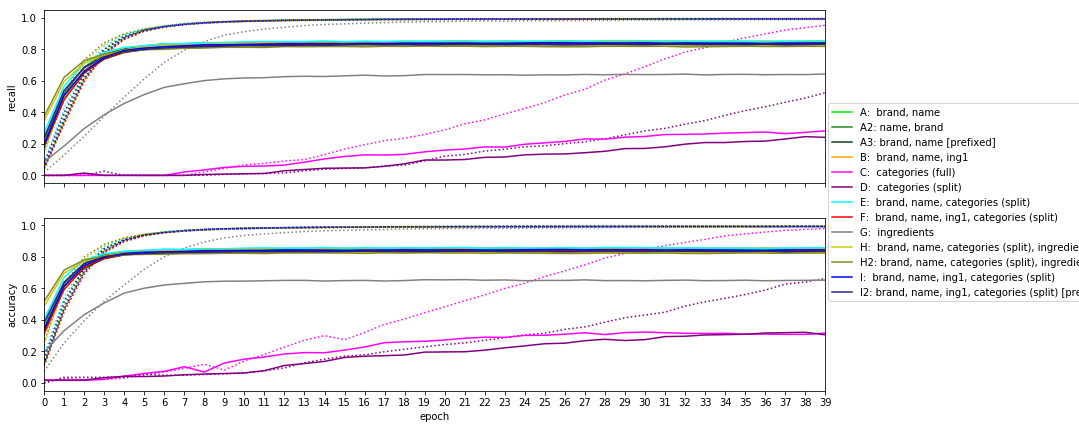

In [4]:
f, (ax1,ax2) = plt.subplots(2,1, sharex=True, figsize=(14,7))
fx = np.arange(0, max([a.shape[0] for a in feat_history]))
colors = ['#00ee00', '#228822', '#114411', 'orange', 'magenta', 'purple', 'cyan', 'red', 'grey', '#cccc00', '#888822', '#0000ff', '#222288']
for i, h in enumerate(feat_history):
    ax1.plot(fx, h[:,2], ':', color=colors[i])
    ax2.plot(fx, h[:,3], ':', color=colors[i])
for i, h in enumerate(feat_history):
    ax1.plot(fx, h[:,5], label=feat_labels[i], color=colors[i])
    ax2.plot(fx, h[:,6], label=feat_labels[i], color=colors[i])
ax1.set_ylabel('recall')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.set_xticks(fx)
ax2.set_xlim((0,39))
f.legend(bbox_to_anchor=(1.15,0.45),loc='center right')
None

One can see that all methods converge within 5-10 epochs, except for the two based on categories only, these need much longer, don't get that far, and suffer greatly from over-fitting (the dotted line keeps rising, while the solid line becomes mostly flat).

Just to see if there are small differences, let's zoom into the top right part of the graphs.

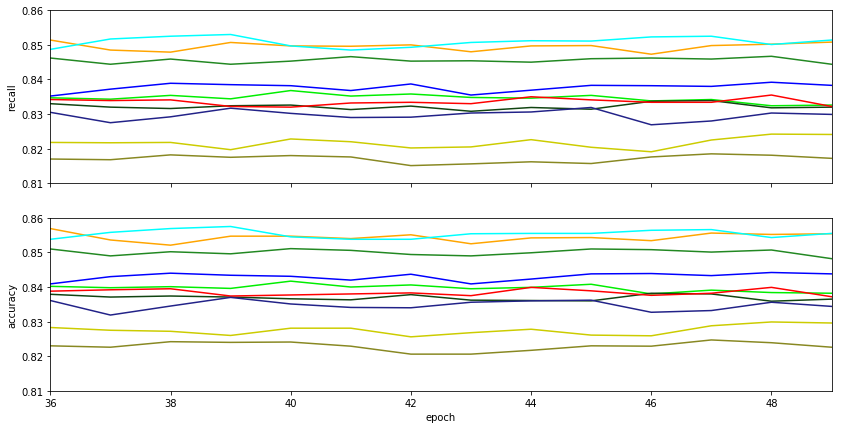

In [5]:
f, (ax1,ax2) = plt.subplots(2,1, sharex=True, figsize=(14,7))
for i, h in enumerate(feat_history):
    ax1.plot(fx, h[:,5], label=feat_labels[i], color=colors[i])
    ax2.plot(fx, h[:,6], label=feat_labels[i], color=colors[i])
ax1.set_ylabel('recall')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.set_xlim((36,49))
ax1.set_ylim((0.81,0.86))
ax2.set_ylim((0.81,0.86))
None

The differences are significantly greater than the 0.003 standard deviation, and it looks like B and E are winners, albeit by a very small margin.

## End comparison

The end results of evaluating the validation sets for each feature extraction method. This is a different validation set than the validation set used for reporting during training.

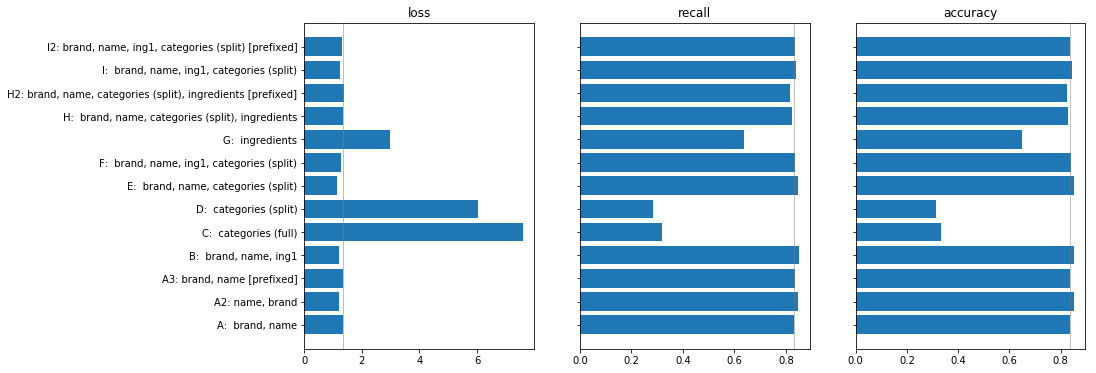

In [6]:
f, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize=(14,6))
fy = np.arange(0, len(feat_scores))
ax1.axvline(x=feat_scores[0,0], color='grey', linewidth=0.5)
ax2.axvline(x=feat_scores[0,1], color='grey', linewidth=0.5)
ax3.axvline(x=feat_scores[0,2], color='grey', linewidth=0.5)
ax1.barh(fy, feat_scores[:,0])
ax2.barh(fy, feat_scores[:,1])
ax3.barh(fy, feat_scores[:,2])
ax1.set_title('loss')
ax2.set_title('recall')
ax3.set_title('accuracy')
ax1.set_yticks(fy)
ax1.set_yticklabels(feat_labels)
None

It's clear that name plus brand are quite enough, and the other features don't add much. Only using categories really doesn't cut it, so much is clear; neither does ingredients do the job. Name and brand are quite enough, adding ingredients or categories doesn't seem to help, really.

# Number of words

In the above feature selection method comparison, H performs worse than A, even though there would be more information in the former. This means that either training was not finished (which the flat accuracy and recall lines in the epoch-graph contradicts), or, perhaps, including more features pushes out relevant words in the tokenization step.

First we'll look at the influence of the max_words parameter (maximum number of words used in tokenization), to see how it may influence statistics, for A and H. Then we'll look into how many words of each part (name, brand, ingredients, etc.) end up in the tokens.

Note that the batch size here was adjusted to 1025 (that should have been 1024) with 40-50 epochs.

In [7]:
numwords_a_scores = np.asarray([
    # for i in `ls out/out-numwords-* | sort -n -t- -k7`; do tail -n1 $i | sed 's/$/,/'; done
    # score,             recall,              accuracy
    [5.376279792281882,  0.0,                  0.08014572214993405],
    [5.309878626153316,  0.009911319743268615, 0.06311945710865607],
    [4.537096606715984,  0.03906866650360959,  0.19613259595590213],
    [2.982217435455954,  0.19377990227698577,  0.38222304207022945],
    [2.344695701279454,  0.3315083818229217,   0.4903910559648908],
    [1.9434251421325635, 0.4349617400562694,   0.5662995005570077],
    [1.6318405846634043, 0.5526802240306984,   0.6375759181676958],
    [1.410631557722724,  0.6304409942439851,   0.6951896051537395],
    [1.367333433219249,  0.7738622664798095,   0.7847944017379515],
    [1.3741408959828216, 0.8040137901081549,   0.8091835990647639],
    [1.295310598998305,  0.8251857833725109,   0.8296856788933996],
    [1.2729584821681832, 0.8299970058071001,   0.8350761783723356],
    [1.4688244335255365, 0.8297330245456346,   0.8342790732009835],
    [1.5050310610019155, 0.8313513432758222,   0.8360572312329266],
])
numwords_a_history = [np.asarray(a) for a in [
    [[0,7.2213,0.0000e+00,0.0031,7.2107,0.0000e+00,0.0034], [0,7.2052,0.0000e+00,0.0065,7.1977,0.0000e+00,0.0068], [0,7.1886,0.0000e+00,0.0060,7.1837,0.0000e+00,0.0057], [0,7.1707,0.0000e+00,0.0065,7.1675,0.0000e+00,0.0080], [0,7.1499,0.0000e+00,0.0080,7.1484,0.0000e+00,0.0080], [0,7.1274,0.0000e+00,0.0088,7.1255,0.0000e+00,0.0102], [0,7.0988,0.0000e+00,0.0077,7.0979,0.0000e+00,0.0125], [0,7.0650,0.0000e+00,0.0097,7.0645,0.0000e+00,0.0137], [0,7.0297,0.0000e+00,0.0120,7.0246,0.0000e+00,0.0171], [0,6.9821,0.0000e+00,0.0137,6.9769,0.0000e+00,0.0125], [0,6.9260,0.0000e+00,0.0159,6.9204,0.0000e+00,0.0171], [0,6.8636,0.0000e+00,0.0131,6.8541,0.0000e+00,0.0182], [0,6.7913,0.0000e+00,0.0117,6.7774,0.0000e+00,0.0193], [0,6.7080,0.0000e+00,0.0120,6.6901,0.0000e+00,0.0159], [0,6.6103,0.0000e+00,0.0151,6.5920,0.0000e+00,0.0171], [0,6.5112,0.0000e+00,0.0140,6.4845,0.0000e+00,0.0159], [0,6.3920,0.0000e+00,0.0142,6.3696,0.0000e+00,0.0159], [0,6.2778,0.0000e+00,0.0140,6.2509,0.0000e+00,0.0171], [0,6.1590,0.0000e+00,0.0165,6.1332,0.0000e+00,0.0193], [0,6.0380,0.0000e+00,0.0171,6.0207,0.0000e+00,0.0216], [0,5.9439,0.0000e+00,0.0202,5.9195,0.0000e+00,0.0216], [0,5.8302,0.0000e+00,0.0182,5.8327,0.0000e+00,0.0216], [0,5.7476,0.0000e+00,0.0214,5.7620,0.0000e+00,0.0216], [0,5.6669,0.0000e+00,0.0196,5.7074,0.0000e+00,0.0216], [0,5.6064,0.0000e+00,0.0279,5.6670,0.0000e+00,0.0319], [0,5.5694,0.0000e+00,0.0364,5.6381,0.0000e+00,0.0432], [0,5.5202,0.0000e+00,0.0421,5.6170,0.0000e+00,0.0739], [0,5.4936,0.0000e+00,0.0569,5.6013,0.0000e+00,0.0774], [0,5.4712,0.0000e+00,0.0715,5.5883,0.0000e+00,0.0774], [0,5.4434,0.0000e+00,0.0792,5.5777,0.0000e+00,0.0774], [0,5.4370,2.8474e-04,0.0826,5.5690,0.0000e+00,0.0774], [0,5.4204,0.0014,0.0843,5.5622,0.0000e+00,0.0774], [0,5.4149,0.0020,0.0837,5.5570,0.0000e+00,0.0774], [0,5.3807,0.0043,0.0840,5.5521,0.0000e+00,0.0774], [0,5.3697,0.0051,0.0840,5.5479,0.0000e+00,0.0774], [0,5.3789,0.0074,0.0837,5.5438,0.0000e+00,0.0774], [0,5.3618,0.0031,0.0840,5.5402,0.0000e+00,0.0774], [0,5.3588,0.0034,0.0840,5.5375,0.0000e+00,0.0774], [0,5.3501,0.0043,0.0840,5.5347,0.0000e+00,0.0774], [0,5.3403,0.0048,0.0840,5.5312,0.0000e+00,0.0774], [0,5.3457,0.0065,0.0840,5.5274,0.0000e+00,0.0774], [0,5.3195,0.0051,0.0837,5.5232,0.0000e+00,0.0774], [0,5.3145,0.0071,0.0837,5.5191,0.0000e+00,0.0774], [0,5.3102,0.0068,0.0840,5.5147,0.0000e+00,0.0774], [0,5.3075,0.0077,0.0840,5.5102,0.0000e+00,0.0774], [0,5.3148,0.0074,0.0840,5.5060,0.0000e+00,0.0774], [0,5.2798,0.0091,0.0837,5.5018,0.0000e+00,0.0774], [0,5.2851,0.0100,0.0837,5.4982,0.0000e+00,0.0774], [0,5.2943,0.0060,0.0840,5.4950,0.0000e+00,0.0774], [0,5.2649,0.0057,0.0837,5.4920,0.0000e+00,0.0774]],
    [[0,7.2086,0.0000e+00,0.0042,7.2003,0.0000e+00,0.0124], [0,7.1863,0.0000e+00,0.0099,7.1788,0.0000e+00,0.0156], [0,7.1562,0.0000e+00,0.0165,7.1478,0.0000e+00,0.0176], [0,7.1161,0.0000e+00,0.0163,7.1016,0.0000e+00,0.0202], [0,7.0564,0.0000e+00,0.0153,7.0327,0.0000e+00,0.0254], [0,6.9718,0.0000e+00,0.0173,6.9319,0.0000e+00,0.0287], [0,6.8518,0.0000e+00,0.0189,6.7896,0.0000e+00,0.0326], [0,6.6952,0.0000e+00,0.0196,6.6000,0.0000e+00,0.0378], [0,6.4909,0.0000e+00,0.0209,6.3673,0.0000e+00,0.0378], [0,6.2552,0.0000e+00,0.0204,6.1176,0.0000e+00,0.0372], [0,6.0304,0.0000e+00,0.0236,5.8983,0.0000e+00,0.0352], [0,5.8487,0.0000e+00,0.0207,5.7528,0.0000e+00,0.0365], [0,5.7407,0.0000e+00,0.0220,5.6853,0.0000e+00,0.0502], [0,5.6963,0.0000e+00,0.0372,5.6545,0.0000e+00,0.0639], [0,5.6703,0.0000e+00,0.0528,5.6308,0.0000e+00,0.0639], [0,5.6318,0.0000e+00,0.0572,5.6101,0.0000e+00,0.0639], [0,5.6098,9.7831e-04,0.0584,5.5944,0.0000e+00,0.0639], [0,5.5918,0.0011,0.0585,5.5829,0.0000e+00,0.0639], [0,5.5755,0.0011,0.0584,5.5734,0.0000e+00,0.0639], [0,5.5633,9.7831e-04,0.0589,5.5641,0.0000e+00,0.0639], [0,5.5472,4.8916e-04,0.0582,5.5543,0.0000e+00,0.0639], [0,5.5427,4.8916e-04,0.0585,5.5440,0.0000e+00,0.0639], [0,5.5204,0.0013,0.0585,5.5339,0.0000e+00,0.0639], [0,5.5135,8.1526e-04,0.0587,5.5261,0.0000e+00,0.0639], [0,5.4987,0.0018,0.0582,5.5169,0.0000e+00,0.0639], [0,5.4808,0.0021,0.0585,5.5083,0.0000e+00,0.0639], [0,5.4743,0.0028,0.0580,5.4999,0.0000e+00,0.0639], [0,5.4606,0.0021,0.0590,5.4906,0.0000e+00,0.0639], [0,5.4545,0.0029,0.0587,5.4811,0.0000e+00,0.0639], [0,5.4356,0.0044,0.0589,5.4719,6.5189e-04,0.0639], [0,5.4365,0.0026,0.0589,5.4621,6.5189e-04,0.0639], [0,5.4165,0.0029,0.0592,5.4523,6.5189e-04,0.0639], [0,5.4093,0.0047,0.0605,5.4427,6.5189e-04,0.0639], [0,5.4054,0.0054,0.0602,5.4319,6.5189e-04,0.0639], [0,5.3886,0.0054,0.0595,5.4209,0.0013,0.0639], [0,5.3698,0.0064,0.0597,5.4087,0.0026,0.0639], [0,5.3517,0.0065,0.0608,5.3960,0.0026,0.0639], [0,5.3401,0.0060,0.0618,5.3841,0.0026,0.0639], [0,5.3350,0.0054,0.0626,5.3705,0.0026,0.0652], [0,5.3207,0.0068,0.0639,5.3560,0.0033,0.0652], [0,5.3062,0.0062,0.0613,5.3415,0.0052,0.0665], [0,5.2912,0.0093,0.0651,5.3263,0.0052,0.0671], [0,5.2732,0.0091,0.0639,5.3103,0.0065,0.0671], [0,5.2590,0.0104,0.0688,5.2946,0.0065,0.0704], [0,5.2430,0.0093,0.0685,5.2784,0.0091,0.0711], [0,5.2266,0.0103,0.0686,5.2611,0.0098,0.0724], [0,5.2111,0.0119,0.0672,5.2439,0.0104,0.0763], [0,5.2004,0.0127,0.0703,5.2260,0.0137,0.0808], [0,5.1768,0.0130,0.0729,5.2079,0.0143,0.0815], [0,5.1617,0.0129,0.0740,5.1894,0.0156,0.0828]],
    [[1,7.2057,0.0000e+00,0.0023,7.1929,0.0000e+00,0.0030], [0,7.1686,0.0000e+00,0.0058,7.1545,0.0000e+00,0.0049], [0,7.1119,0.0000e+00,0.0075,7.0887,0.0000e+00,0.0049], [0,7.0178,0.0000e+00,0.0111,6.9736,0.0000e+00,0.0128], [0,6.8646,0.0000e+00,0.0141,6.7809,0.0000e+00,0.0291], [0,6.6267,0.0000e+00,0.0162,6.4924,0.0000e+00,0.0468], [0,6.3081,0.0000e+00,0.0201,6.1451,0.0000e+00,0.0478], [0,5.9848,0.0000e+00,0.0260,5.8690,0.0000e+00,0.0562], [0,5.7817,0.0000e+00,0.0397,5.7553,0.0000e+00,0.0562], [0,5.7031,0.0000e+00,0.0537,5.7146,0.0000e+00,0.0562], [0,5.6602,6.1667e-04,0.0550,5.6767,0.0000e+00,0.0562], [0,5.6298,4.9334e-04,0.0548,5.6421,0.0000e+00,0.0562], [0,5.5950,2.4667e-04,0.0549,5.6170,0.0000e+00,0.0562], [0,5.5713,9.8668e-04,0.0548,5.5965,0.0000e+00,0.0562], [0,5.5473,0.0016,0.0548,5.5747,0.0000e+00,0.0562], [0,5.5208,0.0020,0.0556,5.5547,0.0000e+00,0.0562], [0,5.4980,0.0025,0.0554,5.5363,0.0000e+00,0.0562], [0,5.4811,0.0026,0.0554,5.5176,4.9310e-04,0.0562], [0,5.4579,0.0031,0.0561,5.4983,0.0015,0.0562], [0,5.4433,0.0038,0.0561,5.4777,0.0015,0.0562], [0,5.4165,0.0039,0.0570,5.4547,0.0039,0.0562], [0,5.3946,0.0060,0.0585,5.4335,0.0049,0.0562], [0,5.3749,0.0068,0.0583,5.4104,0.0049,0.0562], [0,5.3594,0.0064,0.0617,5.3844,0.0049,0.0562], [0,5.3229,0.0080,0.0609,5.3561,0.0089,0.0567], [0,5.3011,0.0109,0.0635,5.3251,0.0128,0.0597], [0,5.2705,0.0111,0.0682,5.2938,0.0143,0.0641], [0,5.2483,0.0110,0.0685,5.2609,0.0163,0.0690], [0,5.2035,0.0136,0.0738,5.2258,0.0173,0.0730], [0,5.1762,0.0139,0.0755,5.1918,0.0192,0.0814], [0,5.1479,0.0153,0.0792,5.1573,0.0207,0.0858], [0,5.1181,0.0155,0.0793,5.1214,0.0222,0.0932], [0,5.0896,0.0173,0.0839,5.0873,0.0237,0.1021], [0,5.0604,0.0175,0.0831,5.0526,0.0237,0.1050], [0,5.0253,0.0185,0.0884,5.0183,0.0247,0.1129], [0,5.0107,0.0206,0.0907,4.9853,0.0261,0.1179], [0,4.9787,0.0207,0.0979,4.9542,0.0276,0.1198], [0,4.9464,0.0224,0.0977,4.9221,0.0276,0.1252], [0,4.9267,0.0199,0.0983,4.8905,0.0276,0.1272], [0,4.8878,0.0221,0.1020,4.8608,0.0291,0.1326], [0,4.8699,0.0213,0.1046,4.8320,0.0291,0.1381], [0,4.8564,0.0228,0.1030,4.8038,0.0321,0.1376], [0,4.8197,0.0258,0.1084,4.7755,0.0325,0.1464], [0,4.7943,0.0237,0.1094,4.7487,0.0325,0.1538], [0,4.7798,0.0245,0.1100,4.7238,0.0335,0.1543], [0,4.7642,0.0257,0.1153,4.6993,0.0345,0.1617], [0,4.7236,0.0250,0.1207,4.6763,0.0360,0.1657], [0,4.7013,0.0259,0.1230,4.6516,0.0355,0.1677], [0,4.6730,0.0270,0.1210,4.6278,0.0380,0.1701], [0,4.6737,0.0248,0.1240,4.6040,0.0380,0.1765]],
    [[1,7.1698,0.0000e+00,0.0174,7.0950,0.0000e+00,0.0501], [1,6.8760,0.0000e+00,0.0442,6.5385,0.0000e+00,0.0449], [1,6.0869,0.0000e+00,0.0462,5.7277,0.0000e+00,0.0449], [1,5.7085,5.7518e-04,0.0456,5.6158,0.0000e+00,0.0449], [1,5.5973,3.4511e-04,0.0461,5.5357,4.6009e-04,0.0449], [1,5.5189,0.0024,0.0461,5.4628,0.0025,0.0449], [1,5.4459,0.0025,0.0501,5.3862,0.0032,0.0449], [1,5.3661,0.0049,0.0566,5.2938,0.0062,0.0575], [1,5.2651,0.0088,0.0728,5.1756,0.0106,0.0865], [1,5.1537,0.0144,0.0894,5.0411,0.0161,0.1118], [1,5.0293,0.0221,0.1043,4.8942,0.0239,0.1408], [1,4.9016,0.0263,0.1237,4.7464,0.0315,0.1684], [1,4.7829,0.0351,0.1348,4.6095,0.0396,0.1935], [1,4.6625,0.0388,0.1514,4.4800,0.0488,0.2057], [1,4.5578,0.0450,0.1666,4.3585,0.0594,0.2257], [1,4.4663,0.0496,0.1687,4.2504,0.0672,0.2390], [1,4.3677,0.0594,0.1805,4.1495,0.0750,0.2450], [1,4.2779,0.0636,0.1934,4.0612,0.0867,0.2581], [1,4.2029,0.0656,0.2049,3.9743,0.0955,0.2611], [1,4.1199,0.0716,0.2068,3.8962,0.0980,0.2740], [1,4.0610,0.0768,0.2166,3.8232,0.1070,0.2813], [1,3.9934,0.0805,0.2225,3.7626,0.1150,0.2855], [1,3.9271,0.0854,0.2329,3.7006,0.1189,0.2956], [1,3.8712,0.0908,0.2328,3.6487,0.1233,0.2988], [1,3.8194,0.0953,0.2399,3.5951,0.1256,0.3053], [1,3.7789,0.0959,0.2435,3.5463,0.1302,0.3161], [1,3.7287,0.0989,0.2496,3.5051,0.1376,0.3159], [1,3.6840,0.1058,0.2528,3.4641,0.1396,0.3228], [1,3.6405,0.1083,0.2577,3.4253,0.1461,0.3285], [1,3.6023,0.1111,0.2607,3.3904,0.1481,0.3345], [1,3.5636,0.1147,0.2662,3.3565,0.1509,0.3386], [1,3.5319,0.1195,0.2711,3.3296,0.1567,0.3414], [1,3.5095,0.1192,0.2710,3.2991,0.1567,0.3446], [1,3.4911,0.1207,0.2744,3.2762,0.1645,0.3412], [1,3.4469,0.1235,0.2727,3.2499,0.1631,0.3492], [1,3.4221,0.1261,0.2788,3.2248,0.1705,0.3517], [1,3.3988,0.1291,0.2814,3.2067,0.1700,0.3524], [1,3.3871,0.1305,0.2832,3.1860,0.1739,0.3533], [1,3.3599,0.1328,0.2870,3.1659,0.1709,0.3589], [1,3.3403,0.1336,0.2901,3.1471,0.1806,0.3614], [1,3.3142,0.1346,0.2931,3.1350,0.1806,0.3607], [1,3.2926,0.1361,0.2894,3.1170,0.1813,0.3639], [1,3.2857,0.1355,0.2920,3.0986,0.1875,0.3683], [1,3.2605,0.1402,0.2954,3.0857,0.1866,0.3699], [1,3.2374,0.1436,0.3008,3.0692,0.1863,0.3738], [1,3.2134,0.1456,0.3039,3.0555,0.1935,0.3745], [1,3.2045,0.1454,0.3032,3.0443,0.1928,0.3727], [1,3.1995,0.1466,0.3056,3.0325,0.1916,0.3796], [1,3.1917,0.1437,0.3094,3.0242,0.1946,0.3791], [1,3.1878,0.1463,0.3054,3.0134,0.1974,0.3803]],
    [[1,6.9686,0.0000e+00,0.0135,6.3333,0.0000e+00,0.0182], [1,5.9004,6.9840e-05,0.0292,5.6915,0.0000e+00,0.0342], [1,5.6008,8.3808e-04,0.0395,5.4973,0.0021,0.0405], [1,5.4080,0.0059,0.0650,5.2703,0.0144,0.0912], [1,5.1533,0.0199,0.1089,4.9479,0.0374,0.1599], [1,4.8326,0.0385,0.1616,4.5826,0.0543,0.2323], [1,4.5169,0.0586,0.2028,4.2446,0.0793,0.2795], [1,4.2314,0.0755,0.2353,3.9592,0.1024,0.3074], [1,3.9916,0.0944,0.2628,3.7249,0.1201,0.3281], [1,3.7960,0.1116,0.2830,3.5303,0.1508,0.3392], [1,3.6314,0.1287,0.2997,3.3767,0.1673,0.3575], [1,3.4866,0.1448,0.3153,3.2540,0.1916,0.3644], [1,3.3782,0.1562,0.3233,3.1508,0.2021,0.3739], [1,3.2844,0.1669,0.3329,3.0638,0.2124,0.3851], [1,3.1978,0.1784,0.3425,2.9886,0.2236,0.3909], [1,3.1177,0.1862,0.3560,2.9256,0.2256,0.4001], [1,3.0680,0.1894,0.3561,2.8722,0.2337,0.4053], [1,2.9925,0.2011,0.3673,2.8221,0.2432,0.4110], [1,2.9546,0.2045,0.3719,2.7786,0.2487,0.4162], [1,2.9028,0.2056,0.3770,2.7402,0.2524,0.4165], [1,2.8579,0.2134,0.3805,2.7057,0.2570,0.4246], [1,2.8337,0.2188,0.3848,2.6777,0.2606,0.4307], [1,2.7809,0.2223,0.3895,2.6514,0.2616,0.4295], [1,2.7549,0.2239,0.3931,2.6299,0.2704,0.4321], [1,2.7268,0.2288,0.3971,2.6043,0.2723,0.4411], [1,2.6999,0.2302,0.3983,2.5825,0.2749,0.4399], [1,2.6651,0.2348,0.4051,2.5618,0.2788,0.4411], [1,2.6541,0.2364,0.4055,2.5486,0.2796,0.4433], [1,2.6294,0.2393,0.4077,2.5320,0.2846,0.4506], [1,2.6149,0.2393,0.4090,2.5160,0.2884,0.4485], [1,2.5859,0.2452,0.4119,2.5007,0.2890,0.4493], [1,2.5568,0.2497,0.4183,2.4902,0.2923,0.4500], [1,2.5424,0.2482,0.4195,2.4743,0.2930,0.4527], [1,2.5280,0.2496,0.4202,2.4639,0.2993,0.4587], [1,2.5155,0.2546,0.4216,2.4508,0.2971,0.4534], [1,2.4937,0.2546,0.4267,2.4424,0.3022,0.4595], [1,2.4956,0.2567,0.4251,2.4351,0.3006,0.4592], [1,2.4746,0.2578,0.4272,2.4186,0.3045,0.4672], [1,2.4611,0.2594,0.4327,2.4101,0.3035,0.4662], [1,2.4417,0.2605,0.4304,2.4049,0.3098,0.4677], [1,2.4272,0.2625,0.4343,2.4033,0.3074,0.4659], [1,2.4196,0.2633,0.4359,2.3923,0.3089,0.4663], [1,2.4188,0.2668,0.4359,2.3820,0.3098,0.4704], [1,2.3969,0.2695,0.4395,2.3758,0.3122,0.4691], [1,2.3811,0.2718,0.4396,2.3666,0.3124,0.4733], [1,2.3727,0.2705,0.4416,2.3632,0.3148,0.4789], [1,2.3671,0.2692,0.4386,2.3572,0.3187,0.4716], [1,2.3598,0.2741,0.4460,2.3505,0.3201,0.4757], [1,2.3479,0.2717,0.4443,2.3437,0.3182,0.4768], [1,2.3477,0.2755,0.4451,2.3435,0.3212,0.4767]],
    [[2,6.6104,0.0000e+00,0.0268,5.8409,0.0000e+00,0.0279], [1,5.6336,5.5182e-04,0.0424,5.4721,0.0018,0.0600], [1,5.2815,0.0116,0.1016,5.0447,0.0317,0.1813], [1,4.7923,0.0472,0.1907,4.4704,0.0743,0.2583], [1,4.2888,0.0921,0.2536,3.9653,0.1248,0.3254], [1,3.8736,0.1295,0.3010,3.5658,0.1776,0.3539], [1,3.5518,0.1656,0.3355,3.2677,0.2125,0.3916], [1,3.3088,0.1926,0.3606,3.0443,0.2442,0.4161], [1,3.1100,0.2146,0.3850,2.8808,0.2645,0.4373], [1,2.9579,0.2311,0.3983,2.7517,0.2858,0.4536], [1,2.8385,0.2482,0.4132,2.6487,0.2977,0.4654], [1,2.7389,0.2571,0.4238,2.5691,0.3122,0.4714], [1,2.6561,0.2692,0.4305,2.5048,0.3184,0.4775], [1,2.5746,0.2769,0.4456,2.4467,0.3314,0.4872], [1,2.5175,0.2850,0.4485,2.4007,0.3352,0.4911], [1,2.4693,0.2933,0.4555,2.3621,0.3402,0.4950], [1,2.4144,0.2981,0.4612,2.3262,0.3446,0.5001], [1,2.3706,0.3061,0.4694,2.2877,0.3549,0.5048], [1,2.3362,0.3089,0.4720,2.2665,0.3550,0.5118], [1,2.3030,0.3140,0.4779,2.2441,0.3653,0.5153], [1,2.2670,0.3207,0.4817,2.2160,0.3694,0.5172], [1,2.2407,0.3239,0.4856,2.1978,0.3714,0.5189], [1,2.2125,0.3273,0.4872,2.1800,0.3753,0.5221], [1,2.1871,0.3283,0.4920,2.1639,0.3756,0.5263], [1,2.1571,0.3357,0.4975,2.1450,0.3819,0.5282], [1,2.1351,0.3394,0.4996,2.1305,0.3835,0.5312], [1,2.1164,0.3404,0.4999,2.1167,0.3847,0.5335], [1,2.0940,0.3448,0.5056,2.1057,0.3890,0.5317], [1,2.0760,0.3467,0.5061,2.0920,0.3893,0.5355], [1,2.0569,0.3483,0.5088,2.0848,0.3918,0.5393], [1,2.0445,0.3511,0.5118,2.0732,0.3979,0.5418], [1,2.0309,0.3543,0.5133,2.0668,0.4015,0.5416], [1,2.0154,0.3567,0.5145,2.0586,0.4022,0.5446], [1,1.9960,0.3607,0.5199,2.0466,0.4053,0.5493], [1,1.9856,0.3616,0.5189,2.0415,0.4053,0.5480], [1,1.9688,0.3653,0.5246,2.0346,0.4078,0.5487], [1,1.9553,0.3677,0.5256,2.0266,0.4088,0.5521], [1,1.9416,0.3715,0.5281,2.0221,0.4073,0.5491], [1,1.9375,0.3679,0.5280,2.0141,0.4132,0.5530], [1,1.9233,0.3712,0.5286,2.0073,0.4149,0.5548], [1,1.9154,0.3735,0.5332,2.0024,0.4160,0.5527], [1,1.8939,0.3744,0.5347,1.9964,0.4200,0.5512], [1,1.8859,0.3808,0.5360,1.9940,0.4203,0.5562], [1,1.8713,0.3814,0.5382,1.9863,0.4234,0.5564], [1,1.8672,0.3808,0.5396,1.9802,0.4235,0.5593], [1,1.8596,0.3839,0.5409,1.9731,0.4250,0.5592], [1,1.8504,0.3870,0.5438,1.9685,0.4286,0.5617], [1,1.8373,0.3868,0.5408,1.9674,0.4302,0.5607], [1,1.8255,0.3914,0.5479,1.9618,0.4321,0.5621], [1,1.8201,0.3900,0.5448,1.9578,0.4309,0.5650]],
    [[2,6.3086,8.2522e-05,0.0284,5.6319,8.2515e-05,0.0374], [2,5.3200,0.0138,0.1063,4.9210,0.0431,0.2159], [2,4.5051,0.0819,0.2466,4.0184,0.1407,0.3355], [2,3.7429,0.1591,0.3422,3.3451,0.2228,0.4101], [2,3.2130,0.2252,0.4027,2.9188,0.2836,0.4514], [2,2.8609,0.2726,0.4420,2.6311,0.3259,0.4860], [2,2.6181,0.3072,0.4704,2.4336,0.3537,0.5119], [2,2.4494,0.3296,0.4898,2.3104,0.3732,0.5264], [2,2.3222,0.3482,0.5026,2.2108,0.3931,0.5373], [2,2.2164,0.3646,0.5154,2.1387,0.4063,0.5449], [2,2.1312,0.3778,0.5254,2.0806,0.4210,0.5568], [2,2.0599,0.3856,0.5353,2.0332,0.4289,0.5635], [2,2.0002,0.3955,0.5449,1.9927,0.4364,0.5649], [2,1.9447,0.4035,0.5505,1.9631,0.4470,0.5737], [2,1.9015,0.4122,0.5586,1.9353,0.4481,0.5779], [2,1.8557,0.4212,0.5645,1.9110,0.4540,0.5837], [2,1.8215,0.4268,0.5706,1.8853,0.4586,0.5854], [2,1.7808,0.4327,0.5747,1.8675,0.4653,0.5896], [2,1.7542,0.4353,0.5785,1.8501,0.4659,0.5944], [2,1.7225,0.4430,0.5833,1.8351,0.4742,0.5964], [2,1.6865,0.4482,0.5893,1.8207,0.4786,0.5978], [2,1.6668,0.4512,0.5927,1.8038,0.4838,0.6020], [2,1.6452,0.4562,0.5960,1.7914,0.4857,0.6042], [2,1.6161,0.4602,0.6020,1.7800,0.4916,0.6029], [2,1.5982,0.4665,0.6042,1.7680,0.4920,0.6065], [2,1.5811,0.4691,0.6046,1.7614,0.4940,0.6117], [2,1.5668,0.4716,0.6084,1.7545,0.4982,0.6105], [2,1.5393,0.4772,0.6116,1.7446,0.5040,0.6135], [2,1.5255,0.4816,0.6163,1.7413,0.5050,0.6148], [2,1.5066,0.4840,0.6199,1.7312,0.5057,0.6143], [2,1.4992,0.4865,0.6226,1.7219,0.5096,0.6189], [2,1.4746,0.4917,0.6242,1.7183,0.5143,0.6212], [2,1.4575,0.4959,0.6273,1.7117,0.5170,0.6228], [2,1.4459,0.4980,0.6303,1.7071,0.5149,0.6227], [2,1.4345,0.4999,0.6328,1.6996,0.5209,0.6265], [2,1.4287,0.5030,0.6291,1.6967,0.5215,0.6261], [2,1.4026,0.5071,0.6369,1.6914,0.5229,0.6255], [2,1.4008,0.5106,0.6381,1.6871,0.5252,0.6265], [2,1.3868,0.5123,0.6394,1.6865,0.5274,0.6284], [2,1.3721,0.5160,0.6451,1.6825,0.5302,0.6288], [2,1.3606,0.5171,0.6455,1.6778,0.5301,0.6303], [2,1.3472,0.5214,0.6486,1.6705,0.5311,0.6321], [2,1.3422,0.5222,0.6468,1.6691,0.5338,0.6294], [2,1.3284,0.5255,0.6503,1.6677,0.5343,0.6301], [2,1.3184,0.5308,0.6514,1.6606,0.5349,0.6334], [2,1.3110,0.5314,0.6574,1.6577,0.5352,0.6343], [2,1.2981,0.5369,0.6594,1.6613,0.5385,0.6353], [2,1.2909,0.5356,0.6568,1.6553,0.5445,0.6374], [2,1.2852,0.5385,0.6617,1.6532,0.5434,0.6382], [2,1.2776,0.5396,0.6617,1.6462,0.5471,0.6401]],
    [[3,6.1335,4.2901e-04,0.0426,5.4074,0.0045,0.1133], [3,4.9031,0.0494,0.1947,4.1897,0.1259,0.3231], [3,3.7343,0.1700,0.3549,3.1741,0.2516,0.4419], [3,2.9771,0.2668,0.4414,2.6187,0.3376,0.5033], [3,2.5504,0.3299,0.4925,2.3152,0.3815,0.5384], [3,2.2842,0.3667,0.5219,2.1250,0.4229,0.5579], [3,2.1084,0.3960,0.5417,2.0019,0.4428,0.5697], [3,1.9734,0.4187,0.5626,1.9150,0.4665,0.5834], [3,1.8669,0.4366,0.5750,1.8489,0.4786,0.5909], [3,1.7866,0.4492,0.5846,1.7956,0.4892,0.6007], [3,1.7127,0.4638,0.5975,1.7560,0.5003,0.6080], [3,1.6559,0.4726,0.6035,1.7172,0.5084,0.6150], [3,1.5994,0.4819,0.6133,1.6905,0.5137,0.6188], [3,1.5545,0.4900,0.6197,1.6620,0.5230,0.6246], [3,1.5091,0.5013,0.6300,1.6423,0.5290,0.6278], [3,1.4745,0.5058,0.6345,1.6233,0.5335,0.6323], [3,1.4341,0.5158,0.6407,1.6117,0.5380,0.6328], [3,1.4019,0.5205,0.6447,1.5949,0.5440,0.6388], [3,1.3699,0.5320,0.6531,1.5832,0.5503,0.6379], [3,1.3482,0.5341,0.6551,1.5701,0.5536,0.6415], [3,1.3294,0.5380,0.6586,1.5597,0.5570,0.6476], [3,1.2940,0.5466,0.6648,1.5528,0.5599,0.6479], [3,1.2700,0.5518,0.6693,1.5410,0.5655,0.6518], [3,1.2500,0.5576,0.6735,1.5339,0.5693,0.6523], [3,1.2310,0.5605,0.6767,1.5288,0.5711,0.6545], [3,1.2128,0.5657,0.6799,1.5202,0.5739,0.6556], [3,1.1858,0.5727,0.6853,1.5102,0.5803,0.6574], [3,1.1766,0.5744,0.6874,1.5075,0.5799,0.6583], [3,1.1503,0.5814,0.6936,1.5060,0.5832,0.6607], [3,1.1446,0.5828,0.6922,1.4972,0.5857,0.6629], [3,1.1289,0.5895,0.7002,1.4900,0.5889,0.6666], [3,1.1073,0.5922,0.6999,1.4903,0.5907,0.6650], [3,1.0942,0.5961,0.7048,1.4884,0.5948,0.6681], [3,1.0770,0.6009,0.7076,1.4848,0.5954,0.6672], [3,1.0675,0.6059,0.7109,1.4768,0.5983,0.6720], [3,1.0566,0.6091,0.7118,1.4785,0.5993,0.6708], [3,1.0431,0.6109,0.7159,1.4787,0.6023,0.6698], [3,1.0287,0.6155,0.7176,1.4754,0.6035,0.6700], [3,1.0135,0.6205,0.7210,1.4727,0.6067,0.6705], [3,1.0030,0.6234,0.7235,1.4722,0.6088,0.6753], [3,0.9926,0.6266,0.7259,1.4615,0.6115,0.6771], [3,0.9881,0.6293,0.7275,1.4636,0.6130,0.6765], [3,0.9717,0.6310,0.7299,1.4632,0.6179,0.6790], [3,0.9639,0.6356,0.7324,1.4626,0.6202,0.6790], [3,0.9478,0.6407,0.7357,1.4593,0.6175,0.6805], [3,0.9389,0.6426,0.7375,1.4576,0.6226,0.6823], [3,0.9322,0.6459,0.7386,1.4567,0.6209,0.6806], [3,0.9223,0.6483,0.7405,1.4529,0.6195,0.6820], [3,0.9103,0.6510,0.7440,1.4596,0.6273,0.6857], [3,0.9044,0.6535,0.7452,1.4556,0.6266,0.6870]],
    [[9,5.3895,0.0432,0.1578,3.9215,0.1745,0.3799], [9,2.9982,0.3021,0.4830,2.2387,0.4341,0.5825], [9,1.9124,0.4776,0.6180,1.6801,0.5404,0.6556], [9,1.4828,0.5567,0.6728,1.4524,0.5886,0.6806], [9,1.2455,0.6057,0.7080,1.3313,0.6191,0.7006], [8,1.0963,0.6346,0.7315,1.2513,0.6394,0.7127], [8,0.9886,0.6615,0.7505,1.2049,0.6513,0.7227], [8,0.8966,0.6836,0.7665,1.1701,0.6628,0.7309], [8,0.8208,0.7054,0.7828,1.1491,0.6777,0.7359], [8,0.7633,0.7204,0.7938,1.1322,0.6845,0.7407], [8,0.7053,0.7378,0.8082,1.1197,0.6918,0.7444], [8,0.6603,0.7522,0.8170,1.1065,0.7020,0.7491], [8,0.6133,0.7663,0.8276,1.1009,0.7066,0.7532], [8,0.5799,0.7763,0.8356,1.1015,0.7123,0.7566], [8,0.5489,0.7873,0.8429,1.0928,0.7195,0.7614], [8,0.5152,0.7973,0.8512,1.1006,0.7247,0.7633], [8,0.4859,0.8091,0.8574,1.1026,0.7245,0.7629], [8,0.4586,0.8171,0.8654,1.0981,0.7325,0.7677], [8,0.4342,0.8268,0.8729,1.1038,0.7368,0.7713], [8,0.4126,0.8351,0.8775,1.1113,0.7410,0.7736], [8,0.3957,0.8417,0.8822,1.1151,0.7446,0.7735], [8,0.3759,0.8485,0.8876,1.1268,0.7456,0.7733], [8,0.3584,0.8552,0.8921,1.1247,0.7501,0.7765], [8,0.3413,0.8626,0.8971,1.1343,0.7532,0.7782], [8,0.3297,0.8658,0.8999,1.1365,0.7532,0.7780], [8,0.3138,0.8718,0.9040,1.1466,0.7564,0.7793], [8,0.3012,0.8783,0.9089,1.1590,0.7567,0.7781], [8,0.2921,0.8829,0.9112,1.1639,0.7592,0.7812], [8,0.2799,0.8872,0.9148,1.1749,0.7583,0.7801], [8,0.2656,0.8928,0.9185,1.1838,0.7602,0.7808], [8,0.2574,0.8954,0.9201,1.1846,0.7644,0.7822], [8,0.2456,0.9009,0.9246,1.1913,0.7648,0.7835], [8,0.2415,0.9016,0.9253,1.2011,0.7665,0.7842], [8,0.2320,0.9062,0.9282,1.2087,0.7652,0.7808], [8,0.2251,0.9085,0.9303,1.2165,0.7692,0.7859], [8,0.2184,0.9126,0.9323,1.2272,0.7684,0.7856], [8,0.2088,0.9163,0.9354,1.2317,0.7710,0.7862], [8,0.2060,0.9172,0.9367,1.2342,0.7719,0.7862], [8,0.1967,0.9207,0.9393,1.2501,0.7716,0.7854], [8,0.1917,0.9232,0.9403,1.2599,0.7720,0.7874], [8,0.1847,0.9257,0.9421,1.2713,0.7714,0.7858], [8,0.1802,0.9281,0.9436,1.2809,0.7726,0.7858], [8,0.1753,0.9304,0.9450,1.2796,0.7759,0.7875], [8,0.1694,0.9329,0.9472,1.2945,0.7743,0.7882], [8,0.1659,0.9338,0.9475,1.3034,0.7756,0.7878], [8,0.1661,0.9347,0.9482,1.3020,0.7742,0.7868], [8,0.1580,0.9380,0.9515,1.3134,0.7755,0.7878], [8,0.1532,0.9391,0.9522,1.3112,0.7766,0.7881], [8,0.1477,0.9416,0.9535,1.3311,0.7781,0.7884], [8,0.1467,0.9422,0.9539,1.3349,0.7787,0.7897]],
    [[25,4.6232,0.1347,0.2765,2.7670,0.3665,0.5289], [24,1.9368,0.4966,0.6328,1.5070,0.5809,0.6890], [24,1.1401,0.6497,0.7450,1.1596,0.6589,0.7401], [24,0.8259,0.7231,0.7970,1.0366,0.7025,0.7608], [24,0.6538,0.7692,0.8277,0.9746,0.7269,0.7766], [24,0.5425,0.8043,0.8535,0.9508,0.7425,0.7841], [24,0.4541,0.8305,0.8745,0.9351,0.7548,0.7906], [24,0.3893,0.8531,0.8904,0.9440,0.7664,0.7947], [24,0.3391,0.8707,0.9019,0.9451,0.7746,0.8021], [24,0.2999,0.8854,0.9128,0.9600,0.7808,0.8036], [24,0.2644,0.8990,0.9226,0.9687,0.7847,0.8053], [24,0.2371,0.9100,0.9308,0.9792,0.7896,0.8071], [24,0.2154,0.9184,0.9361,0.9907,0.7910,0.8084], [24,0.1980,0.9263,0.9425,1.0007,0.7963,0.8119], [24,0.1798,0.9343,0.9483,1.0127,0.7966,0.8113], [24,0.1658,0.9387,0.9513,1.0379,0.7994,0.8122], [24,0.1543,0.9434,0.9547,1.0453,0.8026,0.8147], [24,0.1436,0.9487,0.9587,1.0634,0.8007,0.8117], [24,0.1353,0.9513,0.9606,1.0753,0.8013,0.8136], [24,0.1247,0.9560,0.9640,1.0906,0.8042,0.8152], [24,0.1176,0.9589,0.9669,1.0939,0.8063,0.8170], [24,0.1098,0.9617,0.9688,1.1129,0.8059,0.8163], [24,0.1086,0.9627,0.9690,1.1112,0.8069,0.8171], [24,0.1012,0.9657,0.9714,1.1271,0.8087,0.8165], [24,0.0945,0.9680,0.9734,1.1510,0.8080,0.8155], [24,0.0906,0.9704,0.9751,1.1566,0.8081,0.8162], [24,0.0900,0.9705,0.9751,1.1802,0.8080,0.8156], [24,0.0850,0.9726,0.9770,1.1796,0.8087,0.8165], [24,0.0847,0.9728,0.9768,1.1785,0.8092,0.8170], [24,0.0790,0.9750,0.9787,1.1844,0.8090,0.8157], [24,0.0762,0.9765,0.9800,1.2006,0.8119,0.8189], [24,0.0767,0.9757,0.9789,1.1993,0.8085,0.8155], [24,0.0726,0.9773,0.9803,1.2163,0.8092,0.8171], [24,0.0698,0.9789,0.9820,1.2134,0.8101,0.8173], [24,0.0684,0.9789,0.9815,1.2250,0.8123,0.8191], [24,0.0668,0.9804,0.9829,1.2471,0.8099,0.8160], [24,0.0671,0.9802,0.9825,1.2367,0.8120,0.8183], [24,0.0624,0.9818,0.9839,1.2607,0.8103,0.8166], [24,0.0622,0.9815,0.9838,1.2630,0.8107,0.8165], [24,0.0606,0.9822,0.9842,1.2633,0.8132,0.8187], [24,0.0605,0.9818,0.9841,1.2635,0.8124,0.8173], [24,0.0592,0.9825,0.9847,1.2666,0.8123,0.8181], [24,0.0577,0.9831,0.9848,1.2817,0.8116,0.8170], [24,0.0572,0.9835,0.9853,1.2719,0.8131,0.8191], [24,0.0543,0.9836,0.9854,1.2938,0.8139,0.8192], [24,0.0548,0.9841,0.9856,1.2898,0.8130,0.8193], [24,0.0555,0.9842,0.9856,1.2909,0.8122,0.8186], [24,0.0530,0.9844,0.9860,1.3033,0.8128,0.8190], [24,0.0530,0.9847,0.9862,1.3115,0.8131,0.8186], [24,0.0502,0.9853,0.9869,1.3126,0.8149,0.8203]],
    [[50,4.2116,0.1939,0.3380,2.2946,0.4516,0.5887], [49,1.5398,0.5796,0.6938,1.2381,0.6515,0.7358], [49,0.8345,0.7305,0.8037,0.9918,0.7168,0.7740], [49,0.5696,0.8026,0.8527,0.9184,0.7512,0.7934], [49,0.4227,0.8471,0.8841,0.8876,0.7701,0.8052], [49,0.3313,0.8770,0.9067,0.8860,0.7809,0.8094], [49,0.2701,0.8986,0.9220,0.9039,0.7892,0.8123], [49,0.2237,0.9170,0.9350,0.9207,0.7971,0.8161], [49,0.1898,0.9298,0.9443,0.9317,0.8048,0.8205], [49,0.1645,0.9403,0.9519,0.9427,0.8063,0.8220], [49,0.1443,0.9482,0.9580,0.9645,0.8084,0.8223], [49,0.1291,0.9544,0.9625,0.9969,0.8103,0.8224], [49,0.1165,0.9596,0.9669,1.0050,0.8121,0.8241], [49,0.1046,0.9646,0.9706,1.0234,0.8137,0.8245], [49,0.0990,0.9667,0.9723,1.0369,0.8149,0.8250], [49,0.0900,0.9710,0.9752,1.0629,0.8145,0.8233], [49,0.0844,0.9726,0.9763,1.0682,0.8143,0.8234], [49,0.0793,0.9747,0.9783,1.0843,0.8183,0.8261], [49,0.0726,0.9774,0.9805,1.1016,0.8163,0.8242], [49,0.0716,0.9782,0.9811,1.0989,0.8211,0.8284], [49,0.0680,0.9790,0.9819,1.1126,0.8208,0.8288], [49,0.0644,0.9816,0.9835,1.1309,0.8199,0.8268], [49,0.0616,0.9821,0.9841,1.1520,0.8179,0.8246], [49,0.0612,0.9822,0.9842,1.1530,0.8212,0.8281], [49,0.0564,0.9841,0.9860,1.1532,0.8209,0.8281], [49,0.0555,0.9845,0.9858,1.1717,0.8228,0.8293], [48,0.0531,0.9851,0.9869,1.1784,0.8221,0.8284], [49,0.0526,0.9855,0.9869,1.1850,0.8220,0.8282], [49,0.0499,0.9865,0.9878,1.1991,0.8218,0.8283], [49,0.0499,0.9869,0.9883,1.2040,0.8219,0.8284], [49,0.0473,0.9876,0.9888,1.1961,0.8248,0.8302], [49,0.0482,0.9874,0.9884,1.1987,0.8224,0.8286], [49,0.0472,0.9873,0.9884,1.2362,0.8220,0.8278], [49,0.0479,0.9870,0.9881,1.2040,0.8246,0.8307], [49,0.0436,0.9885,0.9896,1.2448,0.8198,0.8253], [49,0.0444,0.9886,0.9895,1.2400,0.8224,0.8269], [49,0.0422,0.9893,0.9902,1.2375,0.8227,0.8281], [49,0.0407,0.9890,0.9899,1.2542,0.8235,0.8287], [49,0.0399,0.9892,0.9900,1.2552,0.8225,0.8279], [49,0.0394,0.9895,0.9902,1.2635,0.8217,0.8276], [49,0.0400,0.9896,0.9903,1.2635,0.8237,0.8289], [49,0.0378,0.9904,0.9910,1.2593,0.8234,0.8288], [49,0.0364,0.9906,0.9911,1.2824,0.8222,0.8276], [49,0.0368,0.9905,0.9911,1.2729,0.8238,0.8294], [49,0.0375,0.9902,0.9908,1.2867,0.8245,0.8294], [49,0.0377,0.9897,0.9904,1.2934,0.8241,0.8289], [49,0.0384,0.9894,0.9902,1.2762,0.8227,0.8278], [49,0.0377,0.9899,0.9906,1.2915,0.8242,0.8296], [49,0.0368,0.9904,0.9912,1.3122,0.8232,0.8276], [49,0.0347,0.9906,0.9913,1.2961,0.8244,0.8293]],
    [[83,3.9561,0.2334,0.3766,1.9890,0.5078,0.6357], [81,1.3372,0.6247,0.7262,1.1135,0.6809,0.7588], [81,0.6908,0.7716,0.8329,0.9065,0.7473,0.7989], [81,0.4513,0.8416,0.8813,0.8569,0.7777,0.8131], [81,0.3203,0.8851,0.9113,0.8485,0.7921,0.8193], [81,0.2498,0.9111,0.9302,0.8545,0.8027,0.8223], [81,0.2035,0.9282,0.9427,0.8761,0.8083,0.8254], [81,0.1715,0.9406,0.9514,0.8996,0.8157,0.8295], [81,0.1472,0.9509,0.9591,0.9217,0.8175,0.8299], [81,0.1270,0.9583,0.9653,0.9246,0.8199,0.8322], [81,0.1193,0.9620,0.9676,0.9621,0.8178,0.8290], [81,0.1091,0.9662,0.9712,0.9697,0.8229,0.8330], [81,0.0985,0.9701,0.9743,0.9753,0.8263,0.8352], [81,0.0839,0.9755,0.9786,0.9992,0.8253,0.8340], [81,0.0804,0.9781,0.9809,1.0166,0.8251,0.8331], [81,0.0802,0.9782,0.9809,1.0331,0.8236,0.8309], [81,0.0682,0.9819,0.9841,1.0552,0.8264,0.8331], [81,0.0674,0.9815,0.9835,1.0472,0.8273,0.8348], [81,0.0636,0.9835,0.9854,1.0627,0.8274,0.8340], [81,0.0611,0.9843,0.9858,1.0694,0.8247,0.8314], [81,0.0578,0.9851,0.9864,1.0763,0.8256,0.8323], [81,0.0561,0.9859,0.9872,1.0974,0.8283,0.8349], [81,0.0570,0.9863,0.9874,1.1017,0.8278,0.8351], [81,0.0543,0.9871,0.9879,1.1048,0.8270,0.8333], [81,0.0513,0.9881,0.9890,1.1103,0.8281,0.8339], [81,0.0505,0.9882,0.9889,1.1223,0.8275,0.8331], [81,0.0486,0.9885,0.9894,1.1287,0.8270,0.8336], [81,0.0522,0.9881,0.9890,1.1394,0.8269,0.8325], [81,0.0497,0.9882,0.9891,1.1497,0.8287,0.8340], [81,0.0510,0.9877,0.9887,1.1559,0.8269,0.8330], [81,0.0499,0.9878,0.9887,1.1613,0.8257,0.8317], [81,0.0490,0.9881,0.9887,1.1597,0.8265,0.8324], [81,0.0491,0.9888,0.9896,1.1686,0.8272,0.8336], [81,0.0447,0.9896,0.9903,1.1751,0.8275,0.8334], [81,0.0451,0.9896,0.9902,1.1782,0.8281,0.8339], [81,0.0488,0.9884,0.9893,1.1965,0.8283,0.8336], [81,0.0443,0.9896,0.9903,1.2038,0.8288,0.8341], [81,0.0419,0.9904,0.9909,1.2023,0.8287,0.8339], [81,0.0411,0.9904,0.9910,1.2058,0.8300,0.8348], [81,0.0398,0.9907,0.9912,1.2302,0.8287,0.8339], [81,0.0422,0.9901,0.9906,1.2294,0.8280,0.8329], [81,0.0448,0.9895,0.9902,1.2409,0.8283,0.8335], [81,0.0448,0.9896,0.9902,1.2260,0.8280,0.8330], [81,0.0402,0.9903,0.9909,1.2366,0.8277,0.8323], [81,0.0407,0.9909,0.9915,1.2406,0.8301,0.8348], [81,0.0380,0.9915,0.9920,1.2660,0.8306,0.8346], [81,0.0364,0.9913,0.9917,1.2693,0.8289,0.8334], [81,0.0397,0.9906,0.9912,1.2632,0.8302,0.8357], [81,0.0430,0.9894,0.9901,1.2568,0.8271,0.8328], [81,0.0413,0.9899,0.9905,1.2645,0.8282,0.8329]],
    [[184,4.2291,0.2077,0.3098,2.1955,0.4941,0.6048], [179,1.4674,0.6178,0.7096,1.1938,0.6888,0.7556], [180,0.6946,0.7900,0.8405,0.9787,0.7575,0.8001], [179,0.4108,0.8692,0.8975,0.9584,0.7853,0.8125], [179,0.2828,0.9095,0.9276,0.9532,0.8022,0.8253], [179,0.2098,0.9350,0.9463,0.9723,0.8100,0.8268], [179,0.1694,0.9492,0.9578,1.0268,0.8203,0.8320], [180,0.1399,0.9597,0.9652,1.0619,0.8214,0.8318], [180,0.1222,0.9657,0.9706,1.0902,0.8240,0.8325], [180,0.1093,0.9699,0.9737,1.0832,0.8242,0.8335], [180,0.0974,0.9740,0.9772,1.1194,0.8270,0.8348], [180,0.0900,0.9773,0.9797,1.1575,0.8256,0.8329], [179,0.0863,0.9783,0.9805,1.1520,0.8284,0.8365], [179,0.0793,0.9803,0.9823,1.1824,0.8248,0.8335], [179,0.0811,0.9798,0.9821,1.2083,0.8285,0.8344], [180,0.0778,0.9811,0.9832,1.2149,0.8276,0.8343], [179,0.0730,0.9829,0.9845,1.2373,0.8298,0.8359], [179,0.0742,0.9826,0.9846,1.2307,0.8276,0.8342], [180,0.0705,0.9835,0.9851,1.2701,0.8267,0.8333], [180,0.0707,0.9835,0.9852,1.2298,0.8283,0.8356], [180,0.0682,0.9843,0.9857,1.2628,0.8294,0.8353], [179,0.0719,0.9835,0.9851,1.3121,0.8267,0.8317], [180,0.0727,0.9841,0.9854,1.2609,0.8290,0.8350], [179,0.0687,0.9846,0.9860,1.2990,0.8256,0.8315], [179,0.0701,0.9856,0.9868,1.2981,0.8276,0.8329], [180,0.0664,0.9851,0.9866,1.3007,0.8256,0.8323], [180,0.0679,0.9850,0.9862,1.3010,0.8279,0.8342], [179,0.0647,0.9859,0.9872,1.3261,0.8266,0.8331], [180,0.0625,0.9864,0.9872,1.3002,0.8276,0.8347], [180,0.0616,0.9870,0.9879,1.3773,0.8290,0.8342], [179,0.0589,0.9874,0.9888,1.3902,0.8271,0.8327], [179,0.0621,0.9867,0.9878,1.3679,0.8271,0.8330], [179,0.0606,0.9872,0.9884,1.3752,0.8287,0.8336], [179,0.0575,0.9872,0.9882,1.4126,0.8296,0.8337], [179,0.0593,0.9873,0.9883,1.3903,0.8300,0.8353], [179,0.0595,0.9878,0.9887,1.4175,0.8256,0.8315], [180,0.0628,0.9865,0.9876,1.4224,0.8309,0.8358], [180,0.0619,0.9870,0.9881,1.3919,0.8293,0.8352], [179,0.0586,0.9877,0.9888,1.3977,0.8279,0.8326], [180,0.0598,0.9876,0.9885,1.3819,0.8268,0.8326], [180,0.0550,0.9887,0.9895,1.3992,0.8272,0.8324], [180,0.0529,0.9890,0.9898,1.4031,0.8321,0.8371], [179,0.0533,0.9890,0.9898,1.4075,0.8290,0.8345], [179,0.0547,0.9891,0.9899,1.4391,0.8300,0.8348], [179,0.0534,0.9887,0.9896,1.4355,0.8281,0.8332], [180,0.0515,0.9890,0.9898,1.4601,0.8300,0.8346], [179,0.0492,0.9897,0.9904,1.4468,0.8296,0.8341], [180,0.0515,0.9894,0.9902,1.4504,0.8294,0.8337], [179,0.0489,0.9900,0.9907,1.4882,0.8305,0.8347], [179,0.0499,0.9900,0.9907,1.4816,0.8299,0.8334]],
    [[326,4.2635,0.2049,0.3002,2.2530,0.4840,0.5881], [317,1.4605,0.6144,0.7055,1.2046,0.6820,0.7548], [317,0.6421,0.8035,0.8509,1.0140,0.7618,0.8046], [316,0.3582,0.8875,0.9106,1.0087,0.7938,0.8165], [316,0.2382,0.9265,0.9393,1.0190,0.8067,0.8259], [317,0.1753,0.9480,0.9564,1.0586,0.8130,0.8271], [318,0.1415,0.9588,0.9649,1.1002,0.8190,0.8303], [317,0.1165,0.9677,0.9721,1.1143,0.8211,0.8320], [317,0.1027,0.9721,0.9757,1.1708,0.8227,0.8324], [316,0.0979,0.9747,0.9776,1.1892,0.8243,0.8330], [317,0.0854,0.9785,0.9809,1.2052,0.8235,0.8306], [317,0.0842,0.9790,0.9813,1.2207,0.8280,0.8352], [317,0.0785,0.9808,0.9826,1.2142,0.8268,0.8343], [317,0.0755,0.9821,0.9838,1.2486,0.8283,0.8348], [317,0.0740,0.9828,0.9846,1.2685,0.8298,0.8358], [318,0.0722,0.9831,0.9844,1.2390,0.8285,0.8359], [319,0.0707,0.9831,0.9849,1.2790,0.8269,0.8339], [318,0.0735,0.9824,0.9841,1.2690,0.8261,0.8341], [318,0.0741,0.9825,0.9843,1.3103,0.8257,0.8320], [317,0.0713,0.9834,0.9849,1.3052,0.8258,0.8329], [317,0.0713,0.9831,0.9847,1.3303,0.8265,0.8334], [317,0.0663,0.9847,0.9860,1.3475,0.8287,0.8344], [318,0.0673,0.9848,0.9863,1.3233,0.8265,0.8331], [317,0.0643,0.9854,0.9869,1.3264,0.8275,0.8341], [317,0.0623,0.9865,0.9877,1.3534,0.8274,0.8332], [317,0.0653,0.9858,0.9871,1.3953,0.8265,0.8315], [317,0.0633,0.9857,0.9869,1.3548,0.8268,0.8329], [317,0.0642,0.9862,0.9875,1.3873,0.8273,0.8335], [317,0.0622,0.9864,0.9877,1.4050,0.8284,0.8336], [318,0.0583,0.9876,0.9887,1.3904,0.8308,0.8364], [317,0.0559,0.9884,0.9894,1.4000,0.8298,0.8357], [318,0.0578,0.9880,0.9891,1.3946,0.8308,0.8364], [317,0.0601,0.9874,0.9885,1.3772,0.8272,0.8339], [318,0.0576,0.9881,0.9890,1.4111,0.8287,0.8346], [318,0.0569,0.9879,0.9888,1.4435,0.8255,0.8311], [317,0.0605,0.9872,0.9884,1.4109,0.8276,0.8339], [318,0.0604,0.9874,0.9885,1.4263,0.8276,0.8335], [319,0.0588,0.9877,0.9887,1.3802,0.8283,0.8342], [318,0.0543,0.9885,0.9893,1.4239,0.8292,0.8357], [317,0.0550,0.9888,0.9898,1.4377,0.8285,0.8343], [318,0.0536,0.9892,0.9899,1.4605,0.8271,0.8328], [318,0.0539,0.9887,0.9894,1.4525,0.8302,0.8357], [318,0.0494,0.9899,0.9906,1.4460,0.8268,0.8332], [318,0.0531,0.9896,0.9903,1.4824,0.8297,0.8353], [318,0.0544,0.9895,0.9902,1.5097,0.8292,0.8341], [318,0.0589,0.9880,0.9889,1.4681,0.8287,0.8354], [318,0.0538,0.9890,0.9898,1.5044,0.8275,0.8343], [318,0.0532,0.9892,0.9899,1.4610,0.8269,0.8329], [319,0.0521,0.9894,0.9901,1.5026,0.8281,0.8343], [318,0.0488,0.9901,0.9908,1.5346,0.8316,0.8360]],
]]
numwords_h_scores = np.asarray([
    [4.473483254554935, 0.0, 0.11445065463639569],
    [3.798710803111226, 0.008964361206240608, 0.1860651540598537],
    [3.5922659632587757, 0.02365793128191494, 0.21700958213028948],
    [2.655883370038599, 0.13268224118625277, 0.3811579370263236],
    [2.053532138984636, 0.30285337406235774, 0.5076749199951017],
    [1.7720258749461917, 0.4341348660926429, 0.5849015400330351],
    [1.5003651952439119, 0.5623423678854488, 0.6509694148695935],
    
])
numwords_h_history = [np.asarray(a) for a in [
    [[1,7.1409,0.0000e+00,0.0058,6.9972,0.0000e+00,0.0052], [1,6.6683,0.0000e+00,0.0125,6.2014,0.0000e+00,0.0304], [1,6.1586,0.0000e+00,0.0225,5.9690,0.0000e+00,0.0291], [1,6.0490,0.0000e+00,0.0250,5.8931,0.0000e+00,0.0379], [1,5.9641,0.0000e+00,0.0305,5.8007,0.0000e+00,0.0442], [1,5.8740,5.7275e-05,0.0343,5.6903,0.0000e+00,0.0501], [1,5.7858,0.0000e+00,0.0375,5.5904,0.0000e+00,0.0505], [1,5.7043,0.0000e+00,0.0408,5.5006,0.0000e+00,0.0503], [1,5.6439,0.0000e+00,0.0425,5.4210,0.0000e+00,0.0649], [1,5.5770,2.8638e-05,0.0432,5.3459,0.0000e+00,0.0726], [1,5.5208,0.0000e+00,0.0472,5.2762,0.0000e+00,0.0718], [1,5.4712,2.8638e-05,0.0482,5.2160,0.0000e+00,0.0710], [1,5.4264,8.5913e-05,0.0506,5.1560,0.0000e+00,0.0756], [1,5.3874,2.8638e-05,0.0519,5.1086,0.0000e+00,0.0797], [1,5.3547,5.7275e-05,0.0533,5.0650,0.0000e+00,0.0756], [1,5.3103,2.8638e-05,0.0529,5.0239,0.0000e+00,0.0782], [1,5.2910,5.7275e-05,0.0554,4.9816,0.0000e+00,0.0771], [1,5.2612,1.1455e-04,0.0563,4.9476,0.0000e+00,0.0798], [1,5.2377,1.7183e-04,0.0572,4.9185,0.0000e+00,0.0845], [1,5.2093,1.7183e-04,0.0605,4.8852,0.0000e+00,0.0853], [1,5.1917,8.5913e-05,0.0601,4.8563,0.0000e+00,0.0879], [1,5.1717,1.7183e-04,0.0612,4.8320,0.0000e+00,0.0852], [1,5.1618,1.1455e-04,0.0609,4.8081,0.0000e+00,0.0919], [1,5.1408,2.2910e-04,0.0612,4.7886,0.0000e+00,0.0937], [1,5.1190,8.5913e-05,0.0614,4.7603,0.0000e+00,0.0924], [1,5.0989,8.5913e-05,0.0641,4.7409,0.0000e+00,0.0985], [1,5.0904,2.5774e-04,0.0652,4.7238,0.0000e+00,0.0981], [1,5.0763,8.5913e-05,0.0663,4.7049,0.0000e+00,0.0978], [1,5.0515,1.7183e-04,0.0649,4.6866,0.0000e+00,0.0983], [1,5.0524,1.1455e-04,0.0673,4.6698,0.0000e+00,0.0999], [1,5.0407,2.2910e-04,0.0678,4.6577,0.0000e+00,0.1050], [1,5.0228,0.0000e+00,0.0676,4.6357,0.0000e+00,0.1073], [1,5.0116,2.2910e-04,0.0659,4.6247,0.0000e+00,0.1025], [1,5.0026,1.4319e-04,0.0674,4.6137,0.0000e+00,0.1033], [1,4.9980,1.7183e-04,0.0678,4.5997,0.0000e+00,0.1034], [1,4.9913,2.2910e-04,0.0672,4.5895,0.0000e+00,0.1072], [1,4.9732,3.1501e-04,0.0702,4.5769,0.0000e+00,0.1081], [1,4.9672,3.1501e-04,0.0705,4.5644,0.0000e+00,0.1100], [1,4.9553,2.0046e-04,0.0711,4.5519,0.0000e+00,0.1070], [1,4.9563,6.5867e-04,0.0700,4.5433,0.0000e+00,0.1092], [1,4.9435,3.7229e-04,0.0725,4.5331,0.0000e+00,0.1087], [1,4.9385,4.2957e-04,0.0711,4.5257,0.0000e+00,0.1109], [1,4.9368,4.0093e-04,0.0711,4.5171,0.0000e+00,0.1062], [1,4.9220,3.7229e-04,0.0729,4.5103,0.0000e+00,0.1124], [1,4.9170,3.7229e-04,0.0731,4.5019,0.0000e+00,0.1117], [1,4.9087,3.1501e-04,0.0750,4.4944,0.0000e+00,0.1119], [1,4.8942,3.7229e-04,0.0751,4.4849,0.0000e+00,0.1109], [1,4.8945,3.7229e-04,0.0731,4.4782,0.0000e+00,0.1136], [1,4.8891,2.5774e-04,0.0742,4.4726,0.0000e+00,0.1121], [1,4.8905,3.4365e-04,0.0738,4.4710,0.0000e+00,0.1149]],
    [[2,7.0432,0.0000e+00,0.0075,6.6522,0.0000e+00,0.0112], [1,6.2662,0.0000e+00,0.0172,6.0243,0.0000e+00,0.0243], [1,5.9942,0.0000e+00,0.0296,5.8090,0.0000e+00,0.0516], [1,5.7702,0.0000e+00,0.0446,5.5248,0.0000e+00,0.0741], [1,5.5583,4.5554e-05,0.0551,5.2942,0.0000e+00,0.0841], [1,5.3999,9.1108e-05,0.0616,5.1321,0.0000e+00,0.0865], [1,5.2767,4.0999e-04,0.0680,5.0024,0.0000e+00,0.0993], [1,5.1729,6.6053e-04,0.0745,4.8854,0.0000e+00,0.1045], [1,5.0866,7.9719e-04,0.0768,4.7823,0.0000e+00,0.1122], [1,5.0178,0.0014,0.0821,4.6903,0.0000e+00,0.1138], [1,4.9501,0.0019,0.0847,4.6117,9.1100e-05,0.1285], [1,4.8884,0.0021,0.0876,4.5381,1.8220e-04,0.1368], [1,4.8289,0.0022,0.0947,4.4696,5.4660e-04,0.1346], [1,4.7949,0.0024,0.0919,4.4177,5.4660e-04,0.1405], [1,4.7477,0.0026,0.0963,4.3634,0.0015,0.1410], [1,4.7135,0.0035,0.0982,4.3205,0.0012,0.1479], [1,4.6713,0.0035,0.1008,4.2769,0.0013,0.1474], [1,4.6505,0.0040,0.1037,4.2458,0.0021,0.1515], [1,4.6215,0.0035,0.1047,4.2122,0.0024,0.1516], [1,4.5980,0.0042,0.1056,4.1836,0.0026,0.1581], [1,4.5738,0.0043,0.1066,4.1552,0.0036,0.1531], [1,4.5483,0.0043,0.1114,4.1295,0.0034,0.1615], [1,4.5378,0.0050,0.1095,4.1101,0.0043,0.1538], [1,4.5179,0.0047,0.1096,4.0922,0.0046,0.1633], [1,4.5012,0.0053,0.1136,4.0703,0.0053,0.1641], [1,4.4901,0.0054,0.1112,4.0533,0.0047,0.1684], [1,4.4693,0.0049,0.1148,4.0374,0.0049,0.1678], [1,4.4631,0.0057,0.1180,4.0245,0.0054,0.1704], [1,4.4539,0.0056,0.1134,4.0135,0.0064,0.1646], [1,4.4357,0.0060,0.1159,4.0041,0.0067,0.1659], [1,4.4294,0.0066,0.1183,3.9878,0.0065,0.1710], [1,4.4098,0.0065,0.1159,3.9828,0.0067,0.1705], [1,4.4197,0.0067,0.1184,3.9727,0.0076,0.1725], [1,4.4001,0.0064,0.1211,3.9602,0.0071,0.1718], [1,4.3953,0.0067,0.1219,3.9538,0.0067,0.1719], [1,4.3842,0.0064,0.1204,3.9486,0.0075,0.1768], [1,4.3688,0.0071,0.1200,3.9366,0.0067,0.1752], [1,4.3715,0.0065,0.1211,3.9301,0.0080,0.1725], [1,4.3611,0.0071,0.1221,3.9208,0.0087,0.1789], [1,4.3541,0.0078,0.1235,3.9186,0.0080,0.1743], [1,4.3434,0.0078,0.1234,3.9078,0.0077,0.1764], [1,4.3426,0.0071,0.1233,3.9016,0.0088,0.1738], [1,4.3254,0.0075,0.1235,3.8976,0.0097,0.1743], [1,4.3312,0.0078,0.1247,3.8935,0.0091,0.1742], [1,4.3122,0.0076,0.1273,3.8819,0.0080,0.1752], [1,4.3215,0.0075,0.1242,3.8802,0.0092,0.1783], [1,4.3090,0.0083,0.1258,3.8734,0.0096,0.1746], [1,4.3033,0.0079,0.1268,3.8718,0.0099,0.1776], [1,4.2986,0.0085,0.1253,3.8697,0.0090,0.1797], [1,4.2912,0.0086,0.1283,3.8597,0.0092,0.1816]],
    [[2,6.9275,0.0000e+00,0.0122,6.3018,0.0000e+00,0.0209], [1,6.1514,0.0000e+00,0.0234,5.9636,0.0000e+00,0.0475], [1,5.8881,2.0945e-05,0.0385,5.6495,0.0000e+00,0.0555], [1,5.5838,1.4662e-04,0.0552,5.3030,0.0000e+00,0.0818], [1,5.3317,4.1890e-04,0.0669,5.0466,0.0000e+00,0.1011], [1,5.1433,0.0010,0.0772,4.8458,1.6756e-04,0.1065], [1,4.9994,0.0019,0.0865,4.6826,1.6756e-04,0.1174], [1,4.8827,0.0032,0.0921,4.5513,7.5402e-04,0.1333], [1,4.7859,0.0041,0.0979,4.4459,0.0025,0.1347], [1,4.7023,0.0045,0.1024,4.3560,0.0034,0.1370], [1,4.6363,0.0063,0.1086,4.2786,0.0050,0.1510], [1,4.5724,0.0071,0.1116,4.2145,0.0085,0.1511], [1,4.5257,0.0081,0.1159,4.1606,0.0109,0.1495], [1,4.4803,0.0083,0.1183,4.1130,0.0097,0.1589], [1,4.4399,0.0096,0.1198,4.0751,0.0111,0.1561], [1,4.3962,0.0107,0.1245,4.0362,0.0114,0.1628], [1,4.3802,0.0099,0.1232,4.0047,0.0144,0.1595], [1,4.3411,0.0112,0.1272,3.9750,0.0132,0.1664], [1,4.3175,0.0117,0.1307,3.9505,0.0128,0.1738], [1,4.3007,0.0125,0.1316,3.9346,0.0135,0.1681], [1,4.2752,0.0127,0.1324,3.9086,0.0160,0.1790], [1,4.2597,0.0130,0.1331,3.8907,0.0160,0.1733], [1,4.2375,0.0138,0.1355,3.8701,0.0149,0.1823], [1,4.2218,0.0138,0.1371,3.8563,0.0173,0.1849], [1,4.2112,0.0138,0.1370,3.8411,0.0169,0.1796], [1,4.1916,0.0139,0.1411,3.8248,0.0167,0.1862], [1,4.1856,0.0155,0.1418,3.8114,0.0183,0.1929], [1,4.1683,0.0144,0.1400,3.8004,0.0178,0.1940], [1,4.1516,0.0142,0.1431,3.7834,0.0172,0.1969], [1,4.1408,0.0150,0.1447,3.7763,0.0182,0.1962], [1,4.1350,0.0152,0.1458,3.7623,0.0200,0.1921], [1,4.1204,0.0161,0.1464,3.7523,0.0194,0.1909], [1,4.1254,0.0157,0.1455,3.7466,0.0181,0.2010], [1,4.1069,0.0162,0.1466,3.7364,0.0185,0.2007], [1,4.1019,0.0163,0.1507,3.7289,0.0204,0.2035], [1,4.0935,0.0164,0.1489,3.7216,0.0194,0.2043], [1,4.0893,0.0169,0.1492,3.7121,0.0205,0.2030], [1,4.0803,0.0167,0.1511,3.7076,0.0205,0.2006], [1,4.0715,0.0173,0.1496,3.7000,0.0213,0.2027], [1,4.0666,0.0184,0.1527,3.6955,0.0217,0.2054], [1,4.0660,0.0183,0.1525,3.6856,0.0222,0.2043], [1,4.0469,0.0174,0.1544,3.6812,0.0209,0.2086], [1,4.0442,0.0183,0.1560,3.6704,0.0227,0.2013], [1,4.0406,0.0187,0.1522,3.6703,0.0218,0.2033], [1,4.0353,0.0186,0.1570,3.6625,0.0220,0.2064], [1,4.0292,0.0182,0.1560,3.6559,0.0228,0.2098], [1,4.0197,0.0195,0.1582,3.6499,0.0243,0.2062], [1,4.0160,0.0200,0.1559,3.6439,0.0234,0.2081], [1,4.0049,0.0193,0.1572,3.6393,0.0231,0.2120], [1,4.0139,0.0198,0.1576,3.6391,0.0232,0.2085]],
    [[2,6.6075,0.0000e+00,0.0140,5.9207,0.0000e+00,0.0499], [2,5.6652,3.3725e-04,0.0595,5.1754,1.3490e-04,0.1140], [2,5.0555,0.0036,0.0980,4.6015,0.0061,0.1497], [2,4.6566,0.0118,0.1244,4.2160,0.0190,0.1736], [2,4.3773,0.0178,0.1492,3.9439,0.0224,0.2003], [2,4.1674,0.0231,0.1653,3.7311,0.0310,0.2272], [2,4.0168,0.0280,0.1776,3.5768,0.0370,0.2484], [2,3.8883,0.0336,0.1914,3.4499,0.0464,0.2624], [2,3.7963,0.0380,0.1995,3.3538,0.0540,0.2747], [2,3.7111,0.0428,0.2093,3.2735,0.0594,0.2878], [2,3.6539,0.0454,0.2152,3.2073,0.0636,0.2966], [2,3.6010,0.0491,0.2236,3.1519,0.0680,0.3022], [2,3.5462,0.0524,0.2277,3.1027,0.0695,0.3157], [2,3.5103,0.0555,0.2322,3.0604,0.0733,0.3194], [2,3.4736,0.0599,0.2402,3.0251,0.0792,0.3256], [2,3.4418,0.0607,0.2419,2.9954,0.0782,0.3240], [2,3.4051,0.0641,0.2452,2.9648,0.0820,0.3366], [2,3.3853,0.0662,0.2491,2.9412,0.0816,0.3359], [2,3.3591,0.0672,0.2506,2.9145,0.0882,0.3443], [2,3.3453,0.0691,0.2529,2.8939,0.0861,0.3459], [2,3.3233,0.0708,0.2570,2.8752,0.0968,0.3432], [2,3.3097,0.0721,0.2565,2.8575,0.0926,0.3499], [2,3.2900,0.0732,0.2616,2.8419,0.0900,0.3481], [2,3.2754,0.0749,0.2622,2.8255,0.0998,0.3524], [2,3.2589,0.0775,0.2651,2.8071,0.1002,0.3582], [2,3.2468,0.0769,0.2666,2.7974,0.1034,0.3596], [2,3.2318,0.0786,0.2714,2.7828,0.1047,0.3602], [2,3.2179,0.0815,0.2748,2.7704,0.1060,0.3652], [2,3.2077,0.0811,0.2722,2.7580,0.1093,0.3641], [2,3.2011,0.0820,0.2727,2.7547,0.1108,0.3660], [2,3.1986,0.0828,0.2720,2.7421,0.1066,0.3694], [2,3.1830,0.0853,0.2777,2.7325,0.1128,0.3712], [2,3.1709,0.0872,0.2795,2.7190,0.1166,0.3733], [2,3.1580,0.0870,0.2798,2.7141,0.1157,0.3749], [2,3.1586,0.0871,0.2808,2.7080,0.1139,0.3694], [2,3.1523,0.0879,0.2804,2.6989,0.1118,0.3756], [2,3.1429,0.0881,0.2817,2.6940,0.1158,0.3720], [2,3.1354,0.0898,0.2824,2.6848,0.1178,0.3756], [2,3.1228,0.0907,0.2846,2.6811,0.1097,0.3728], [2,3.1181,0.0919,0.2856,2.6691,0.1218,0.3776], [2,3.1080,0.0929,0.2859,2.6635,0.1179,0.3805], [2,3.0968,0.0949,0.2886,2.6574,0.1222,0.3834], [2,3.0982,0.0953,0.2910,2.6550,0.1257,0.3797], [2,3.0937,0.0937,0.2903,2.6489,0.1232,0.3822], [2,3.0839,0.0960,0.2903,2.6458,0.1225,0.3820], [2,3.0828,0.0958,0.2896,2.6395,0.1300,0.3826], [2,3.0782,0.0952,0.2914,2.6344,0.1264,0.3814], [2,3.0717,0.0976,0.2924,2.6288,0.1306,0.3865], [2,3.0699,0.0980,0.2951,2.6245,0.1295,0.3855], [2,3.0637,0.0993,0.2949,2.6181,0.1304,0.3902]],
    [[3,6.3102,3.0900e-04,0.0391,5.4388,1.1771e-04,0.0945], [2,5.0194,0.0149,0.1206,4.3775,0.0335,0.1982], [2,4.2795,0.0380,0.1797,3.7552,0.0555,0.2692], [2,3.8410,0.0615,0.2225,3.3754,0.0871,0.3131], [2,3.5523,0.0796,0.2565,3.1239,0.1094,0.3417], [2,3.3621,0.0951,0.2773,2.9554,0.1282,0.3570], [2,3.2224,0.1081,0.2928,2.8319,0.1419,0.3790], [2,3.1133,0.1173,0.3072,2.7387,0.1558,0.3896], [2,3.0238,0.1269,0.3213,2.6597,0.1637,0.4053], [2,2.9633,0.1352,0.3294,2.6027,0.1696,0.4113], [2,2.8971,0.1436,0.3379,2.5506,0.1791,0.4175], [2,2.8523,0.1456,0.3458,2.5036,0.1939,0.4266], [2,2.8021,0.1536,0.3529,2.4709,0.1970,0.4336], [2,2.7697,0.1586,0.3574,2.4371,0.1999,0.4389], [2,2.7308,0.1651,0.3631,2.4051,0.2101,0.4477], [2,2.7015,0.1694,0.3686,2.3780,0.2189,0.4486], [2,2.6741,0.1737,0.3726,2.3560,0.2205,0.4492], [2,2.6472,0.1777,0.3777,2.3356,0.2275,0.4537], [2,2.6314,0.1819,0.3765,2.3156,0.2299,0.4608], [2,2.6076,0.1830,0.3823,2.2963,0.2357,0.4625], [2,2.5928,0.1856,0.3849,2.2834,0.2358,0.4652], [2,2.5628,0.1915,0.3912,2.2649,0.2395,0.4707], [2,2.5476,0.1928,0.3932,2.2540,0.2486,0.4726], [2,2.5346,0.1972,0.3961,2.2404,0.2462,0.4768], [2,2.5216,0.1978,0.3964,2.2273,0.2478,0.4770], [2,2.5032,0.2008,0.3997,2.2128,0.2545,0.4828], [2,2.4849,0.2047,0.4036,2.1997,0.2597,0.4821], [2,2.4725,0.2055,0.4048,2.1914,0.2618,0.4857], [2,2.4617,0.2081,0.4063,2.1823,0.2667,0.4821], [2,2.4558,0.2084,0.4087,2.1790,0.2644,0.4887], [2,2.4399,0.2135,0.4118,2.1654,0.2664,0.4915], [2,2.4288,0.2130,0.4126,2.1588,0.2729,0.4916], [2,2.4244,0.2165,0.4160,2.1504,0.2726,0.4913], [2,2.4137,0.2163,0.4143,2.1472,0.2726,0.4926], [2,2.4097,0.2167,0.4160,2.1381,0.2777,0.4971], [2,2.3955,0.2198,0.4176,2.1304,0.2752,0.4962], [2,2.3842,0.2221,0.4190,2.1195,0.2841,0.5004], [2,2.3795,0.2240,0.4168,2.1151,0.2819,0.5013], [2,2.3684,0.2241,0.4219,2.1087,0.2818,0.5027], [2,2.3685,0.2263,0.4208,2.1049,0.2824,0.5028], [2,2.3534,0.2273,0.4280,2.0994,0.2864,0.5050], [2,2.3606,0.2276,0.4236,2.0965,0.2880,0.5049], [2,2.3431,0.2305,0.4254,2.0893,0.2891,0.5094], [2,2.3307,0.2334,0.4288,2.0869,0.2906,0.5066], [2,2.3345,0.2313,0.4273,2.0813,0.2921,0.5071], [2,2.3209,0.2348,0.4306,2.0764,0.2959,0.5082], [2,2.3155,0.2371,0.4320,2.0730,0.2963,0.5114], [2,2.3135,0.2384,0.4336,2.0709,0.2965,0.5089], [2,2.3061,0.2381,0.4331,2.0637,0.2995,0.5126], [2,2.3075,0.2376,0.4327,2.0638,0.3000,0.5110]],
    [[3,6.0804,0.0021,0.0551,5.1043,0.0136,0.1536], [3,4.5873,0.0421,0.1812,3.8865,0.0784,0.2680], [3,3.7866,0.0878,0.2498,3.2846,0.1170,0.3397], [3,3.3440,0.1205,0.3011,2.9305,0.1607,0.3755], [3,3.0710,0.1473,0.3352,2.7092,0.1881,0.4056], [3,2.8756,0.1709,0.3598,2.5506,0.2061,0.4304], [3,2.7461,0.1868,0.3791,2.4414,0.2278,0.4480], [3,2.6426,0.2011,0.3974,2.3554,0.2436,0.4643], [3,2.5534,0.2155,0.4113,2.2897,0.2609,0.4726], [3,2.4873,0.2247,0.4192,2.2373,0.2716,0.4834], [3,2.4185,0.2368,0.4305,2.1852,0.2872,0.4944], [3,2.3694,0.2471,0.4386,2.1480,0.3010,0.4991], [3,2.3299,0.2546,0.4456,2.1146,0.3048,0.5041], [3,2.2902,0.2608,0.4536,2.0837,0.3157,0.5099], [3,2.2538,0.2681,0.4574,2.0560,0.3170,0.5151], [3,2.2169,0.2769,0.4642,2.0383,0.3272,0.5174], [3,2.1928,0.2814,0.4701,2.0200,0.3347,0.5201], [3,2.1716,0.2865,0.4727,1.9952,0.3411,0.5262], [3,2.1453,0.2924,0.4787,1.9803,0.3422,0.5309], [3,2.1196,0.2941,0.4792,1.9615,0.3529,0.5325], [3,2.1032,0.3008,0.4845,1.9529,0.3540,0.5350], [3,2.0780,0.3058,0.4880,1.9380,0.3609,0.5362], [3,2.0584,0.3094,0.4927,1.9248,0.3626,0.5409], [3,2.0519,0.3131,0.4956,1.9121,0.3695,0.5415], [3,2.0279,0.3163,0.4994,1.9057,0.3726,0.5469], [3,2.0148,0.3216,0.5028,1.8909,0.3778,0.5488], [3,1.9999,0.3248,0.5043,1.8828,0.3782,0.5512], [3,1.9871,0.3274,0.5058,1.8766,0.3866,0.5530], [3,1.9719,0.3326,0.5090,1.8671,0.3824,0.5551], [3,1.9646,0.3304,0.5086,1.8579,0.3887,0.5561], [3,1.9452,0.3355,0.5131,1.8544,0.3915,0.5559], [3,1.9386,0.3402,0.5149,1.8459,0.3910,0.5581], [3,1.9316,0.3404,0.5153,1.8426,0.3902,0.5590], [3,1.9225,0.3420,0.5175,1.8313,0.3990,0.5627], [3,1.9076,0.3469,0.5196,1.8294,0.4029,0.5631], [3,1.8993,0.3482,0.5222,1.8250,0.4044,0.5665], [3,1.8912,0.3499,0.5235,1.8198,0.4029,0.5644], [3,1.8828,0.3525,0.5243,1.8117,0.4055,0.5686], [3,1.8791,0.3509,0.5247,1.8097,0.4099,0.5692], [3,1.8691,0.3553,0.5270,1.8034,0.4125,0.5714], [3,1.8612,0.3580,0.5279,1.7969,0.4131,0.5737], [3,1.8496,0.3610,0.5293,1.7994,0.4133,0.5705], [3,1.8404,0.3637,0.5328,1.7909,0.4143,0.5758], [3,1.8371,0.3650,0.5336,1.7880,0.4170,0.5741], [3,1.8318,0.3641,0.5322,1.7842,0.4210,0.5753], [3,1.8270,0.3672,0.5351,1.7829,0.4243,0.5757], [3,1.8204,0.3670,0.5351,1.7767,0.4237,0.5763], [3,1.8064,0.3706,0.5377,1.7768,0.4236,0.5755], [3,1.8043,0.3746,0.5391,1.7683,0.4239,0.5812], [3,1.8002,0.3716,0.5381,1.7697,0.4266,0.5787]],
    [[4,5.7113,0.0156,0.1026,4.4761,0.0683,0.2373], [3,3.9738,0.0987,0.2625,3.2885,0.1567,0.3730], [3,3.1884,0.1641,0.3476,2.7376,0.2197,0.4319], [3,2.7840,0.2109,0.3975,2.4478,0.2654,0.4723], [3,2.5338,0.2448,0.4324,2.2662,0.3083,0.4981], [3,2.3708,0.2752,0.4558,2.1442,0.3377,0.5152], [3,2.2416,0.2970,0.4753,2.0491,0.3570,0.5295], [3,2.1406,0.3189,0.4938,1.9847,0.3714,0.5406], [3,2.0641,0.3309,0.5064,1.9291,0.3867,0.5525], [3,1.9954,0.3455,0.5177,1.8897,0.3992,0.5589], [3,1.9446,0.3584,0.5288,1.8565,0.4088,0.5689], [3,1.8962,0.3672,0.5339,1.8160,0.4195,0.5729], [3,1.8480,0.3789,0.5437,1.7894,0.4277,0.5783], [3,1.8050,0.3903,0.5521,1.7707,0.4320,0.5847], [3,1.7735,0.3984,0.5595,1.7472,0.4421,0.5908], [3,1.7376,0.4041,0.5648,1.7301,0.4506,0.5949], [3,1.7135,0.4128,0.5710,1.7130,0.4515,0.5970], [3,1.6833,0.4183,0.5749,1.6968,0.4614,0.6037], [3,1.6580,0.4265,0.5820,1.6818,0.4639,0.6041], [3,1.6304,0.4312,0.5853,1.6710,0.4737,0.6062], [3,1.6077,0.4375,0.5908,1.6604,0.4785,0.6103], [3,1.5911,0.4429,0.5920,1.6505,0.4825,0.6125], [3,1.5728,0.4497,0.5987,1.6501,0.4860,0.6142], [3,1.5498,0.4541,0.6018,1.6360,0.4898,0.6162], [3,1.5379,0.4579,0.6004,1.6256,0.4930,0.6194], [3,1.5173,0.4615,0.6071,1.6152,0.5022,0.6226], [3,1.5045,0.4666,0.6086,1.6074,0.5021,0.6237], [3,1.4901,0.4710,0.6133,1.6025,0.5086,0.6241], [3,1.4733,0.4751,0.6168,1.5999,0.5103,0.6260], [3,1.4554,0.4795,0.6187,1.5921,0.5131,0.6257], [3,1.4483,0.4836,0.6228,1.5825,0.5151,0.6277], [3,1.4342,0.4876,0.6246,1.5806,0.5185,0.6290], [3,1.4227,0.4913,0.6268,1.5785,0.5206,0.6304], [3,1.4053,0.4960,0.6304,1.5722,0.5252,0.6336], [3,1.3995,0.4956,0.6295,1.5694,0.5239,0.6334], [3,1.3866,0.5001,0.6337,1.5629,0.5279,0.6362], [3,1.3769,0.5041,0.6364,1.5597,0.5315,0.6361], [3,1.3629,0.5073,0.6377,1.5555,0.5357,0.6370], [3,1.3558,0.5107,0.6393,1.5535,0.5375,0.6377], [3,1.3490,0.5131,0.6416,1.5490,0.5364,0.6403], [3,1.3367,0.5155,0.6433,1.5471,0.5398,0.6397], [3,1.3274,0.5171,0.6449,1.5451,0.5409,0.6405], [3,1.3224,0.5189,0.6463,1.5412,0.5447,0.6408], [3,1.3099,0.5219,0.6488,1.5431,0.5479,0.6430], [3,1.3002,0.5251,0.6505,1.5366,0.5518,0.6447], [3,1.2938,0.5294,0.6536,1.5361,0.5525,0.6462], [3,1.2832,0.5320,0.6526,1.5294,0.5535,0.6467], [3,1.2767,0.5329,0.6559,1.5313,0.5558,0.6475], [3,1.2683,0.5367,0.6570,1.5290,0.5571,0.6483], [3,1.2597,0.5374,0.6594,1.5270,0.5570,0.6508]],
    [[5,5.4442,0.0326,0.1370,4.0530,0.1120,0.2976], [4,3.5330,0.1544,0.3302,2.8736,0.2275,0.4270], [4,2.7568,0.2356,0.4208,2.3768,0.2988,0.4954], [4,2.3821,0.2932,0.4709,2.1314,0.3461,0.5308], [4,2.1543,0.3354,0.5072,1.9665,0.3897,0.5552], [4,1.9966,0.3653,0.5305,1.8691,0.4099,0.5682], [4,1.8788,0.3902,0.5513,1.7935,0.4294,0.5829], [4,1.7851,0.4112,0.5682,1.7269,0.4481,0.5937], [4,1.7098,0.4291,0.5807,1.6798,0.4619,0.6067], [4,1.6383,0.4439,0.5930,1.6436,0.4749,0.6119], [4,1.5860,0.4571,0.6033,1.6117,0.4921,0.6197], [4,1.5330,0.4701,0.6141,1.5867,0.4962,0.6255], [4,1.4905,0.4810,0.6227,1.5655,0.5118,0.6274], [4,1.4487,0.4952,0.6302,1.5431,0.5160,0.6332], [4,1.4090,0.5032,0.6367,1.5271,0.5272,0.6379], [4,1.3812,0.5112,0.6443,1.5153,0.5329,0.6432], [4,1.3503,0.5212,0.6501,1.4962,0.5413,0.6465], [4,1.3174,0.5288,0.6548,1.4878,0.5443,0.6466], [4,1.2927,0.5365,0.6603,1.4828,0.5500,0.6515], [4,1.2722,0.5417,0.6650,1.4679,0.5569,0.6545], [4,1.2463,0.5509,0.6704,1.4648,0.5614,0.6558], [4,1.2222,0.5564,0.6758,1.4554,0.5645,0.6580], [4,1.1992,0.5638,0.6806,1.4523,0.5701,0.6605], [4,1.1791,0.5705,0.6841,1.4399,0.5740,0.6615], [4,1.1651,0.5730,0.6863,1.4352,0.5775,0.6634], [4,1.1478,0.5783,0.6896,1.4309,0.5804,0.6670], [4,1.1262,0.5867,0.6965,1.4228,0.5866,0.6661], [4,1.1120,0.5911,0.6989,1.4241,0.5875,0.6676], [4,1.0947,0.5964,0.7018,1.4197,0.5882,0.6690], [4,1.0839,0.6001,0.7052,1.4169,0.5920,0.6711], [4,1.0689,0.6033,0.7086,1.4161,0.5957,0.6730], [4,1.0640,0.6049,0.7076,1.4148,0.5993,0.6731], [4,1.0458,0.6116,0.7119,1.4184,0.6006,0.6740], [4,1.0271,0.6161,0.7160,1.4110,0.6014,0.6759], [4,1.0145,0.6224,0.7187,1.4080,0.6051,0.6778], [4,1.0032,0.6235,0.7213,1.4037,0.6078,0.6781], [4,0.9965,0.6264,0.7233,1.4042,0.6131,0.6815], [4,0.9833,0.6305,0.7253,1.3981,0.6117,0.6792], [4,0.9769,0.6314,0.7264,1.4058,0.6148,0.6800], [4,0.9691,0.6357,0.7294,1.3994,0.6141,0.6826], [4,0.9601,0.6376,0.7303,1.4040,0.6178,0.6794], [4,0.9413,0.6455,0.7365,1.3957,0.6173,0.6833], [4,0.9361,0.6480,0.7393,1.3982,0.6185,0.6826], [4,0.9270,0.6494,0.7394,1.3974,0.6190,0.6842], [4,0.9212,0.6520,0.7398,1.3932,0.6218,0.6871], [4,0.9087,0.6547,0.7431,1.4024,0.6236,0.6864], [4,0.9050,0.6573,0.7428,1.4009,0.6249,0.6861], [4,0.8977,0.6593,0.7461,1.4011,0.6239,0.6866], [4,0.8905,0.6623,0.7468,1.4014,0.6278,0.6875], [4,0.8820,0.6642,0.7490,1.4012,0.6291,0.6887]],
    

]]
numwords_labels = [
    50, 80, 100, 200, 350, 500, 750, 1000, 2500, 5000, 7500, 10000, 15000, 20000, 25000, 27500, 30000, 35000, 40000, 50000
]

## Training convergence over time

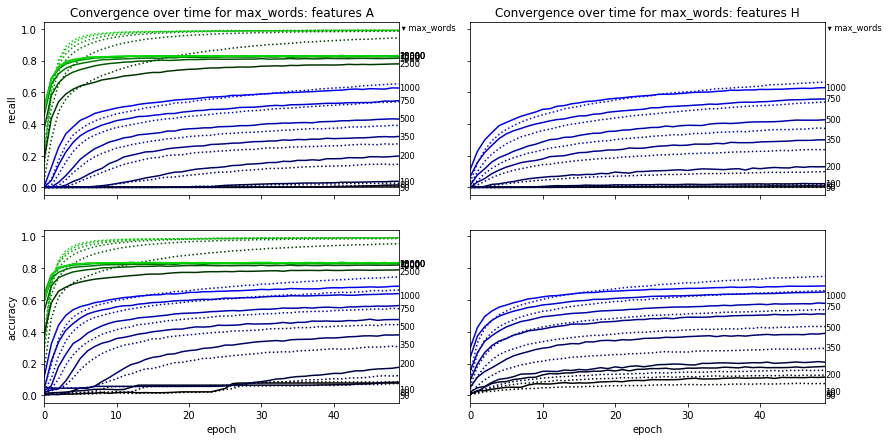

In [8]:
f, ((ax1,ax3),(ax2,ax4)) = plt.subplots(2,2, sharex='col', sharey='row', figsize=(14,7))
colors = ["#0000%x%x"%(i,i) for i in range(0,15,2)] + ["#00%x%x00"%(i,i) for i in range(3,15,2)] + ["#00%x%x00"%(i,i) for i in range(3,15,2)]

fxa = np.arange(0, max([a.shape[0] for a in numwords_a_history]))
for i, h in enumerate(numwords_a_history):
    ax1.plot(fxa, h[:,2], ':', color=colors[i])
    ax2.plot(fxa, h[:,3], ':', color=colors[i])
for i, h in enumerate(numwords_a_history):
    ax1.plot(fxa, h[:,5], label=numwords_labels[i], color=colors[i])
    ax2.plot(fxa, h[:,6], label=numwords_labels[i], color=colors[i])
    ax1.annotate(numwords_labels[i], xy=(49, h[-1,5]), fontsize='small', verticalalignment='center')
    ax2.annotate(numwords_labels[i], xy=(49, h[-1,5]), fontsize='small', verticalalignment='center')
ax1.annotate(' ▾ max_words', xy=(49,1), fontsize='small')
ax1.set_title('Convergence over time for max_words: features A')
ax1.set_ylabel('recall')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.set_xlim((0,49))

fxh = np.arange(0, max([a.shape[0] for a in numwords_h_history]))
for i, h in enumerate(numwords_h_history):
    ax3.plot(fxh, h[:,2], ':', color=colors[i])
    ax4.plot(fxh, h[:,3], ':', color=colors[i])
for i, h in enumerate(numwords_h_history):
    ax3.plot(fxh, h[:,5], label=numwords_labels[i], color=colors[i])
    ax4.plot(fxh, h[:,6], label=numwords_labels[i], color=colors[i])
    ax3.annotate(numwords_labels[i], xy=(49, h[-1,5]), fontsize='small', verticalalignment='center')
    ax4.annotate(numwords_labels[i], xy=(49, h[-1,5]), fontsize='small', verticalalignment='center')
ax3.annotate(' ▾ max_words', xy=(49,1), fontsize='small')
ax3.set_title('Convergence over time for max_words: features H')
ax4.set_xlabel('epoch')
ax4.set_xlim((0,49))
None

Here we see that (for feature selection method A) recall and accuracy improve with more words, but has a cap at about 5000 words. To see where overfitting is least (while still getting a good result), more epochs are needed.

## max_words versus result

Now we'll look at the accurracy and recall at the end, for different numbers of words.

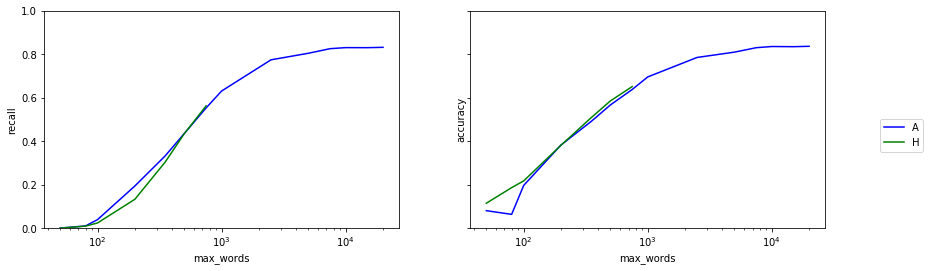

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,4))
ax1.plot(numwords_labels[:len(numwords_a_scores)], numwords_a_scores[:,1], color='blue', label='A')
ax1.plot(numwords_labels[:len(numwords_h_scores)], numwords_h_scores[:,1], color='green', label='H')
ax1.set_ylim((0,1))
ax1.set_ylabel('recall')
ax1.set_xlabel('max_words')
ax1.set_xscale('log')
ax2.plot(numwords_labels[:len(numwords_a_scores)], numwords_a_scores[:,2], color='blue', label='A')
ax2.plot(numwords_labels[:len(numwords_h_scores)], numwords_h_scores[:,2], color='green', label='H')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('max_words')
ax2.set_xscale('log')
f.legend(loc='center right')
None

_Let's wait for additional data to make conclusions._

# Model comparison

Besides feature selection, a number of different models was tried.

In [10]:
model_scores = np.asarray([
    # score,             recall,              accuracy
    [0.5973273170939895, 0.8511909437192685,   0.8664151134348027  ],
    [1.1422052502497821, 0.8509027072913091,   0.8567722658845759  ],
    [1.1477378627287655, 0.845662027930881,    0.8518460293571845  ],
    [1.5204193044395389, 0.8475486727560904,   0.8511385364146133  ],
    [1.5390585626792543, 0.8436705700628907,   0.8477845025791005  ],
    [2.209939332670958,  0.8831328783954767,   0.06687105305668    ],
    [3.0236534070435104, 0.047821188077939315, 0.42182218429583895 ],
])
model_history = [np.asarray(a) for a in [
    [[27,6.7219,0.0000e+00,0.2797,5.8190,1.6377e-04,0.3240], [25,5.1428,0.0155,0.3187,4.4634,0.0440,0.4152], [25,3.8349,0.1037,0.4723,3.3112,0.1823,0.5285], [25,2.8216,0.2562,0.5810,2.5167,0.3200,0.6115], [25,2.1453,0.3858,0.6537,2.0045,0.4299,0.6632], [25,1.6987,0.4856,0.7061,1.6688,0.5050,0.7013], [26,1.3947,0.5569,0.7448,1.4326,0.5601,0.7296], [26,1.1713,0.6104,0.7755,1.2597,0.6034,0.7520], [25,1.0020,0.6539,0.8012,1.1305,0.6365,0.7691], [26,0.8715,0.6915,0.8213,1.0318,0.6645,0.7829], [26,0.7655,0.7209,0.8378,0.9540,0.6896,0.7959], [25,0.6820,0.7482,0.8524,0.8938,0.7073,0.8044], [25,0.6145,0.7697,0.8630,0.8447,0.7254,0.8120], [25,0.5554,0.7895,0.8750,0.8049,0.7379,0.8180], [25,0.5079,0.8056,0.8828,0.7717,0.7509,0.8234], [25,0.4659,0.8206,0.8912,0.7447,0.7620,0.8285], [25,0.4304,0.8352,0.8979,0.7222,0.7698,0.8322], [25,0.4002,0.8448,0.9036,0.7016,0.7777,0.8357], [25,0.3712,0.8556,0.9100,0.6852,0.7860,0.8386], [25,0.3473,0.8643,0.9138,0.6704,0.7913,0.8419], [25,0.3261,0.8741,0.9195,0.6591,0.7976,0.8437], [25,0.3089,0.8805,0.9224,0.6497,0.8032,0.8454], [25,0.2911,0.8872,0.9265,0.6404,0.8065,0.8468], [25,0.2741,0.8949,0.9312,0.6319,0.8107,0.8487], [25,0.2612,0.8999,0.9336,0.6261,0.8139,0.8497], [25,0.2475,0.9055,0.9364,0.6207,0.8160,0.8502], [25,0.2379,0.9087,0.9380,0.6161,0.8193,0.8519], [25,0.2246,0.9133,0.9421,0.6117,0.8226,0.8537], [25,0.2158,0.9179,0.9438,0.6089,0.8238,0.8543], [25,0.2074,0.9202,0.9456,0.6047,0.8266,0.8558], [25,0.1980,0.9246,0.9481,0.6029,0.8283,0.8557], [25,0.1903,0.9280,0.9498,0.6012,0.8311,0.8573], [25,0.1836,0.9297,0.9511,0.5993,0.8322,0.8572], [25,0.1771,0.9330,0.9526,0.5985,0.8335,0.8580], [25,0.1705,0.9356,0.9549,0.5969,0.8354,0.8585], [25,0.1642,0.9377,0.9562,0.5972,0.8362,0.8594], [25,0.1588,0.9399,0.9582,0.5961,0.8379,0.8599], [25,0.1538,0.9434,0.9601,0.5961,0.8388,0.8611], [25,0.1491,0.9439,0.9599,0.5964,0.8399,0.8606], [25,0.1433,0.9469,0.9620,0.5961,0.8412,0.8619], [25,0.1396,0.9487,0.9627,0.5964,0.8418,0.8609], [25,0.1355,0.9498,0.9638,0.5955,0.8428,0.8620], [25,0.1322,0.9518,0.9649,0.5973,0.8435,0.8618], [25,0.1270,0.9538,0.9663,0.5981,0.8436,0.8613], [25,0.1232,0.9550,0.9672,0.5981,0.8449,0.8624], [25,0.1205,0.9567,0.9684,0.6006,0.8453,0.8621], [25,0.1165,0.9576,0.9689,0.6007,0.8464,0.8636], [25,0.1154,0.9581,0.9689,0.6019,0.8466,0.8632], [25,0.1109,0.9598,0.9702,0.6026,0.8478,0.8646], [25,0.1085,0.9612,0.9713,0.6039,0.8491,0.8643]],
    [[104,5.5905,0.0479,0.1217,4.0137,0.2102,0.3543], [93,2.8521,0.3728,0.4962,1.9301,0.5290,0.6384], [93,1.3060,0.6432,0.7328,1.1685,0.6943,0.7658], [93,0.6415,0.8012,0.8539,0.9380,0.7723,0.8154], [93,0.3594,0.8864,0.9147,0.8838,0.8093,0.8343], [93,0.2331,0.9282,0.9436,0.8818,0.8238,0.8432], [93,0.1729,0.9491,0.9594,0.8973,0.8320,0.8464], [93,0.1362,0.9615,0.9683,0.9197,0.8414,0.8523], [93,0.1114,0.9703,0.9749,0.9471,0.8415,0.8509], [93,0.1009,0.9745,0.9780,0.9435,0.8443,0.8539], [93,0.0905,0.9778,0.9807,0.9730,0.8445,0.8526], [93,0.0792,0.9812,0.9835,1.0005,0.8465,0.8537], [93,0.0748,0.9830,0.9848,0.9926,0.8467,0.8540], [93,0.0693,0.9845,0.9859,1.0006,0.8505,0.8570], [93,0.0648,0.9863,0.9876,1.0039,0.8503,0.8569], [93,0.0618,0.9871,0.9882,1.0300,0.8496,0.8559], [93,0.0585,0.9882,0.9892,1.0417,0.8508,0.8572], [93,0.0570,0.9888,0.9896,1.0422,0.8504,0.8562], [93,0.0522,0.9902,0.9908,1.0552,0.8497,0.8555], [93,0.0534,0.9897,0.9904,1.0597,0.8508,0.8568], [93,0.0532,0.9898,0.9905,1.0772,0.8516,0.8563], [93,0.0515,0.9900,0.9908,1.0659,0.8507,0.8562], [93,0.0508,0.9903,0.9910,1.0746,0.8505,0.8560], [93,0.0518,0.9901,0.9908,1.0702,0.8495,0.8553], [93,0.0498,0.9904,0.9910,1.1001,0.8505,0.8555], [93,0.0478,0.9914,0.9919,1.1050,0.8501,0.8552], [93,0.0464,0.9913,0.9918,1.1105,0.8519,0.8571], [92,0.0474,0.9909,0.9915,1.1048,0.8496,0.8549], [93,0.0483,0.9912,0.9918,1.1118,0.8518,0.8571], [93,0.0464,0.9913,0.9917,1.1343,0.8513,0.8555], [93,0.0471,0.9914,0.9919,1.1137,0.8497,0.8546], [92,0.0475,0.9912,0.9918,1.1350,0.8512,0.8556], [93,0.0461,0.9918,0.9923,1.1293,0.8507,0.8558], [92,0.0461,0.9914,0.9919,1.1396,0.8517,0.8562], [92,0.0445,0.9919,0.9924,1.1462,0.8528,0.8568], [92,0.0428,0.9921,0.9926,1.1580,0.8521,0.8565], [92,0.0441,0.9917,0.9923,1.1840,0.8503,0.8547], [93,0.0453,0.9914,0.9920,1.1515,0.8517,0.8565], [92,0.0440,0.9920,0.9925,1.1711,0.8504,0.8552], [92,0.0448,0.9917,0.9922,1.1646,0.8503,0.8541], [92,0.0445,0.9916,0.9920,1.1551,0.8494,0.8545], [92,0.0447,0.9914,0.9919,1.1751,0.8513,0.8558], [92,0.0472,0.9914,0.9919,1.1724,0.8504,0.8550], [92,0.0466,0.9915,0.9921,1.1751,0.8511,0.8560], [92,0.0445,0.9917,0.9923,1.1765,0.8524,0.8567], [92,0.0459,0.9913,0.9919,1.1684,0.8494,0.8547], [92,0.0456,0.9915,0.9920,1.1839,0.8506,0.8547], [92,0.0471,0.9914,0.9920,1.1706,0.8500,0.8552], [92,0.0452,0.9916,0.9921,1.2050,0.8507,0.8551], [92,0.0459,0.9916,0.9922,1.1637,0.8498,0.8544]],
    [[103,5.5523,0.0528,0.1328,3.9029,0.2306,0.3663], [93,2.6882,0.4011,0.5246,1.8278,0.5539,0.6584], [93,1.1540,0.6807,0.7621,1.1127,0.7156,0.7838], [93,0.5267,0.8378,0.8805,0.9137,0.7848,0.8241], [93,0.2808,0.9127,0.9336,0.8765,0.8152,0.8389], [93,0.1772,0.9482,0.9589,0.8940,0.8300,0.8459], [93,0.1278,0.9655,0.9717,0.9112,0.8368,0.8484], [93,0.1001,0.9748,0.9785,0.9223,0.8400,0.8508], [93,0.0836,0.9805,0.9830,0.9261,0.8452,0.8548], [93,0.0731,0.9840,0.9857,0.9365,0.8453,0.8550], [93,0.0656,0.9867,0.9879,0.9510,0.8484,0.8567], [93,0.0600,0.9886,0.9896,0.9673,0.8498,0.8578], [93,0.0549,0.9897,0.9903,0.9686,0.8510,0.8589], [93,0.0521,0.9905,0.9911,0.9652,0.8520,0.8591], [93,0.0496,0.9910,0.9915,0.9815,0.8531,0.8595], [93,0.0487,0.9918,0.9921,0.9861,0.8512,0.8582], [93,0.0457,0.9924,0.9928,0.9945,0.8527,0.8590], [93,0.0437,0.9926,0.9930,0.9966,0.8550,0.8607], [93,0.0440,0.9927,0.9930,1.0132,0.8541,0.8603], [93,0.0436,0.9927,0.9930,1.0065,0.8550,0.8614], [93,0.0432,0.9930,0.9933,1.0294,0.8539,0.8606], [93,0.0427,0.9929,0.9932,1.0247,0.8532,0.8593], [93,0.0428,0.9928,0.9931,1.0152,0.8528,0.8586], [93,0.0427,0.9929,0.9932,1.0184,0.8552,0.8611], [93,0.0431,0.9929,0.9933,1.0433,0.8519,0.8575], [93,0.0418,0.9930,0.9933,1.0418,0.8519,0.8577], [93,0.0432,0.9925,0.9930,1.0383,0.8503,0.8568], [93,0.0427,0.9926,0.9930,1.0526,0.8522,0.8576], [92,0.0454,0.9924,0.9928,1.0480,0.8494,0.8564], [93,0.0457,0.9922,0.9927,1.0741,0.8490,0.8553], [93,0.0450,0.9923,0.9926,1.0765,0.8482,0.8537], [93,0.0458,0.9918,0.9921,1.0555,0.8487,0.8557], [93,0.0488,0.9911,0.9917,1.0810,0.8478,0.8543], [93,0.0536,0.9905,0.9910,1.0573,0.8478,0.8546], [92,0.0534,0.9902,0.9909,1.0578,0.8466,0.8535], [92,0.0535,0.9904,0.9910,1.0608,0.8485,0.8556], [93,0.0511,0.9910,0.9916,1.0803,0.8477,0.8536], [93,0.0512,0.9909,0.9915,1.0872,0.8515,0.8568], [92,0.0524,0.9910,0.9915,1.0846,0.8487,0.8547], [92,0.0498,0.9916,0.9920,1.0871,0.8479,0.8544], [92,0.0495,0.9918,0.9922,1.1061,0.8500,0.8560], [92,0.0487,0.9922,0.9926,1.1062,0.8471,0.8532], [92,0.0493,0.9918,0.9923,1.0941,0.8515,0.8561], [93,0.0497,0.9918,0.9922,1.0635,0.8483,0.8553], [92,0.0484,0.9925,0.9929,1.1016,0.8498,0.8558], [92,0.0498,0.9920,0.9924,1.1030,0.8497,0.8553], [92,0.0488,0.9921,0.9926,1.0841,0.8500,0.8561], [93,0.0496,0.9920,0.9926,1.0758,0.8494,0.8562], [92,0.0468,0.9922,0.9926,1.1311,0.8498,0.8548], [92,0.0493,0.9920,0.9924,1.0982,0.8499,0.8558]],
    [[105,6.2723,2.2929e-04,0.0127,5.7576,9.8264e-05,0.0215], [94,5.6610,0.0041,0.0182,5.5522,0.0115,0.0215], [94,5.3805,0.0158,0.0372,4.9961,0.0392,0.0819], [94,4.4762,0.0700,0.1249,3.7994,0.1433,0.2213], [94,3.4441,0.1562,0.2395,3.0263,0.2340,0.3452], [93,2.7263,0.2598,0.3548,2.4619,0.3520,0.4606], [94,2.1162,0.3744,0.4761,2.0403,0.4528,0.5682], [93,1.6528,0.4783,0.5748,1.8102,0.5342,0.6322], [93,1.3266,0.5674,0.6525,1.6483,0.5995,0.6812], [93,1.0875,0.6366,0.7108,1.5348,0.6393,0.7139], [93,0.9040,0.6917,0.7566,1.4823,0.6773,0.7383], [94,0.7708,0.7308,0.7882,1.4413,0.7048,0.7554], [93,0.6727,0.7650,0.8143,1.4207,0.7226,0.7660], [93,0.5917,0.7914,0.8360,1.4095,0.7416,0.7783], [94,0.5272,0.8141,0.8529,1.4146,0.7506,0.7858], [93,0.4831,0.8297,0.8642,1.4095,0.7599,0.7908], [93,0.4348,0.8467,0.8783,1.3983,0.7696,0.7960], [93,0.3913,0.8627,0.8900,1.4057,0.7787,0.8008], [93,0.3606,0.8732,0.8991,1.3972,0.7853,0.8056], [93,0.3312,0.8844,0.9073,1.3948,0.7882,0.8076], [93,0.3077,0.8935,0.9142,1.4126,0.7927,0.8101], [93,0.2872,0.9007,0.9194,1.4152,0.7957,0.8133], [93,0.2636,0.9090,0.9269,1.4134,0.8038,0.8175], [93,0.2478,0.9159,0.9318,1.4260,0.8041,0.8172], [93,0.2342,0.9202,0.9345,1.4431,0.8053,0.8185], [93,0.2260,0.9246,0.9380,1.4336,0.8087,0.8205], [94,0.2115,0.9285,0.9413,1.4339,0.8097,0.8214], [93,0.2030,0.9322,0.9440,1.4254,0.8134,0.8241], [93,0.1898,0.9370,0.9478,1.4302,0.8134,0.8232], [93,0.1812,0.9396,0.9505,1.4359,0.8174,0.8260], [93,0.1728,0.9437,0.9534,1.4623,0.8165,0.8251], [93,0.1657,0.9462,0.9550,1.4675,0.8189,0.8279], [93,0.1592,0.9489,0.9578,1.4433,0.8234,0.8318], [94,0.1525,0.9507,0.9591,1.4480,0.8220,0.8299], [93,0.1488,0.9532,0.9609,1.4415,0.8223,0.8299], [93,0.1425,0.9547,0.9619,1.4557,0.8236,0.8310], [93,0.1347,0.9569,0.9637,1.4654,0.8254,0.8330], [93,0.1333,0.9579,0.9643,1.4650,0.8247,0.8325], [93,0.1308,0.9588,0.9652,1.4866,0.8257,0.8318], [94,0.1271,0.9600,0.9662,1.4958,0.8238,0.8310], [93,0.1225,0.9618,0.9678,1.4812,0.8278,0.8338], [93,0.1180,0.9639,0.9694,1.4721,0.8284,0.8345], [93,0.1111,0.9657,0.9707,1.4984,0.8282,0.8331], [93,0.1100,0.9664,0.9711,1.5200,0.8277,0.8326], [93,0.1090,0.9670,0.9716,1.4986,0.8299,0.8348], [93,0.1100,0.9669,0.9718,1.4785,0.8292,0.8348], [93,0.1070,0.9678,0.9723,1.5036,0.8296,0.8344], [93,0.1034,0.9695,0.9742,1.4886,0.8304,0.8357], [93,0.1023,0.9698,0.9742,1.5182,0.8293,0.8342], [93,0.0984,0.9710,0.9749,1.4914,0.8317,0.8367], [93,0.0976,0.9716,0.9754,1.4850,0.8308,0.8362], [93,0.0939,0.9730,0.9764,1.4952,0.8315,0.8369], [93,0.0959,0.9717,0.9757,1.5079,0.8310,0.8362], [93,0.0947,0.9721,0.9760,1.4979,0.8302,0.8356], [93,0.0928,0.9727,0.9760,1.4963,0.8318,0.8365], [93,0.0867,0.9748,0.9783,1.5272,0.8303,0.8349], [93,0.0859,0.9751,0.9783,1.5091,0.8333,0.8376], [93,0.0866,0.9750,0.9782,1.5309,0.8315,0.8357], [93,0.0869,0.9750,0.9782,1.4868,0.8329,0.8377], [93,0.0809,0.9765,0.9797,1.5340,0.8336,0.8383], [93,0.0814,0.9769,0.9799,1.5142,0.8344,0.8387], [93,0.0794,0.9774,0.9804,1.5035,0.8344,0.8393], [93,0.0774,0.9774,0.9803,1.5155,0.8334,0.8383], [93,0.0752,0.9780,0.9808,1.5493,0.8346,0.8387], [93,0.0796,0.9775,0.9806,1.4893,0.8349,0.8392], [93,0.0750,0.9788,0.9818,1.5137,0.8353,0.8399], [93,0.0759,0.9788,0.9815,1.5131,0.8349,0.8392], [93,0.0708,0.9801,0.9827,1.5648,0.8354,0.8393], [93,0.0744,0.9792,0.9817,1.5509,0.8349,0.8393], [94,0.0780,0.9785,0.9811,1.5337,0.8347,0.8393], [93,0.0771,0.9787,0.9813,1.5067,0.8326,0.8381], [93,0.0725,0.9794,0.9821,1.5526,0.8374,0.8408], [93,0.0744,0.9794,0.9818,1.5095,0.8352,0.8402], [93,0.0708,0.9800,0.9824,1.5270,0.8352,0.8390], [93,0.0688,0.9811,0.9836,1.5533,0.8382,0.8428], [93,0.0722,0.9803,0.9829,1.5183,0.8358,0.8406], [93,0.0682,0.9811,0.9836,1.5486,0.8369,0.8410], [93,0.0691,0.9813,0.9835,1.5292,0.8373,0.8423], [93,0.0677,0.9806,0.9832,1.5248,0.8374,0.8419], [93,0.0682,0.9814,0.9834,1.5269,0.8388,0.8431], [93,0.0660,0.9816,0.9838,1.5388,0.8387,0.8424], [93,0.0643,0.9823,0.9846,1.5354,0.8380,0.8422], [93,0.0657,0.9825,0.9844,1.5414,0.8386,0.8428], [93,0.0663,0.9820,0.9843,1.5469,0.8393,0.8432], [94,0.0666,0.9821,0.9842,1.5163,0.8382,0.8422], [93,0.0635,0.9830,0.9849,1.5428,0.8380,0.8423], [93,0.0667,0.9822,0.9845,1.5321,0.8387,0.8426], [93,0.0629,0.9831,0.9851,1.5377,0.8394,0.8432], [93,0.0617,0.9835,0.9855,1.5449,0.8396,0.8429], [93,0.0629,0.9828,0.9848,1.5368,0.8397,0.8435], [93,0.0595,0.9838,0.9856,1.5493,0.8415,0.8448], [93,0.0640,0.9829,0.9849,1.5468,0.8396,0.8433], [93,0.0631,0.9831,0.9852,1.5333,0.8393,0.8433], [93,0.0621,0.9831,0.9851,1.5357,0.8400,0.8436], [93,0.0609,0.9836,0.9855,1.5734,0.8372,0.8410], [93,0.0632,0.9830,0.9852,1.5266,0.8392,0.8435], [93,0.0604,0.9837,0.9856,1.5605,0.8392,0.8432], [93,0.0565,0.9847,0.9862,1.5709,0.8405,0.8436], [93,0.0578,0.9843,0.9862,1.5692,0.8386,0.8421], [93,0.0579,0.9844,0.9861,1.5549,0.8398,0.8439], [93,0.0601,0.9841,0.9860,1.5677,0.8393,0.8426], [93,0.0582,0.9845,0.9864,1.5648,0.8406,0.8443], [93,0.0571,0.9849,0.9868,1.5503,0.8436,0.8471], [93,0.0602,0.9842,0.9861,1.5580,0.8418,0.8452], [93,0.0598,0.9844,0.9862,1.5215,0.8425,0.8466], [93,0.0587,0.9847,0.9866,1.5304,0.8409,0.8447], [93,0.0587,0.9844,0.9864,1.5316,0.8408,0.8447], [93,0.0594,0.9846,0.9864,1.5151,0.8408,0.8446], [93,0.0560,0.9851,0.9868,1.5411,0.8414,0.8443], [93,0.0563,0.9852,0.9870,1.5449,0.8408,0.8445], [93,0.0559,0.9855,0.9872,1.5328,0.8413,0.8448], [93,0.0536,0.9859,0.9875,1.5557,0.8418,0.8454], [93,0.0545,0.9854,0.9873,1.5604,0.8418,0.8448], [93,0.0535,0.9856,0.9873,1.5331,0.8426,0.8461], [93,0.0537,0.9865,0.9880,1.5722,0.8410,0.8442], [93,0.0553,0.9858,0.9874,1.5580,0.8414,0.8443], [93,0.0551,0.9857,0.9875,1.5575,0.8406,0.8440], [93,0.0569,0.9856,0.9873,1.5478,0.8404,0.8440], [93,0.0553,0.9854,0.9872,1.5610,0.8419,0.8457], [93,0.0536,0.9864,0.9879,1.5543,0.8437,0.8471], [93,0.0566,0.9851,0.9869,1.5292,0.8422,0.8467], [93,0.0541,0.9860,0.9877,1.5259,0.8449,0.8484], [93,0.0532,0.9860,0.9877,1.5671,0.8418,0.8453], [93,0.0516,0.9866,0.9880,1.5739,0.8416,0.8453], [93,0.0533,0.9866,0.9882,1.5571,0.8414,0.8453], [93,0.0531,0.9861,0.9875,1.5483,0.8434,0.8470], [93,0.0536,0.9866,0.9881,1.5517,0.8436,0.8473], [93,0.0544,0.9861,0.9876,1.5405,0.8414,0.8455], [93,0.0553,0.9861,0.9878,1.5636,0.8436,0.8471], [93,0.0540,0.9866,0.9882,1.5770,0.8423,0.8455], [93,0.0532,0.9865,0.9882,1.5391,0.8432,0.8467], [93,0.0517,0.9867,0.9883,1.5549,0.8433,0.8468], [93,0.0518,0.9871,0.9886,1.5682,0.8432,0.8464], [93,0.0516,0.9870,0.9884,1.5701,0.8442,0.8473], [93,0.0547,0.9861,0.9876,1.5561,0.8434,0.8472], [93,0.0546,0.9863,0.9878,1.5455,0.8420,0.8461], [93,0.0509,0.9872,0.9887,1.5596,0.8438,0.8474], [93,0.0518,0.9869,0.9882,1.5725,0.8435,0.8469], [93,0.0501,0.9873,0.9889,1.6040,0.8428,0.8456], [93,0.0489,0.9876,0.9890,1.5682,0.8432,0.8464], [93,0.0502,0.9873,0.9886,1.5672,0.8456,0.8486], [93,0.0516,0.9870,0.9885,1.5749,0.8425,0.8460], [93,0.0484,0.9879,0.9894,1.5697,0.8454,0.8486], [93,0.0496,0.9880,0.9892,1.5579,0.8455,0.8489], [93,0.0493,0.9877,0.9892,1.5810,0.8452,0.8484], [93,0.0464,0.9885,0.9898,1.5763,0.8447,0.8484], [93,0.0481,0.9878,0.9892,1.5602,0.8453,0.8489], [93,0.0459,0.9882,0.9897,1.5970,0.8459,0.8490], [93,0.0477,0.9880,0.9894,1.5726,0.8440,0.8477], [93,0.0489,0.9878,0.9891,1.5575,0.8455,0.8488]],
    [[105,6.3482,9.8266e-05,0.0103,5.7668,0.0000e+00,0.0150], [94,5.6592,6.2235e-04,0.0144,5.5231,0.0040,0.0217], [94,5.3022,0.0161,0.0415,4.9487,0.0354,0.0690], [93,4.3953,0.0672,0.1204,3.7514,0.1415,0.2150], [94,3.3315,0.1666,0.2492,3.0043,0.2513,0.3517], [94,2.5662,0.2900,0.3830,2.4814,0.3729,0.4650], [94,2.0097,0.3982,0.4911,2.1801,0.4516,0.5403], [94,1.6169,0.4877,0.5749,1.9532,0.5170,0.6038], [93,1.3195,0.5613,0.6452,1.8372,0.5653,0.6465], [93,1.0663,0.6314,0.7093,1.7195,0.6222,0.6942], [93,0.8672,0.6993,0.7640,1.6259,0.6747,0.7293], [93,0.7016,0.7552,0.8072,1.5686,0.7083,0.7512], [93,0.5688,0.7990,0.8423,1.5451,0.7355,0.7692], [93,0.4730,0.8332,0.8691,1.5462,0.7517,0.7767], [93,0.3951,0.8631,0.8916,1.5280,0.7716,0.7925], [93,0.3327,0.8865,0.9094,1.5178,0.7759,0.7943], [93,0.2913,0.9013,0.9208,1.5392,0.7851,0.7999], [93,0.2618,0.9135,0.9300,1.5210,0.7905,0.8042], [94,0.2309,0.9241,0.9379,1.5178,0.7916,0.8047], [93,0.2134,0.9315,0.9437,1.5709,0.7972,0.8077], [93,0.1944,0.9373,0.9476,1.5589,0.7981,0.8079], [93,0.1790,0.9430,0.9521,1.5841,0.7990,0.8074], [93,0.1749,0.9456,0.9536,1.5758,0.8008,0.8089], [93,0.1622,0.9496,0.9571,1.5706,0.8044,0.8120], [94,0.1479,0.9547,0.9617,1.6071,0.8074,0.8144], [93,0.1388,0.9586,0.9647,1.6151,0.8060,0.8130], [93,0.1363,0.9597,0.9655,1.5924,0.8067,0.8141], [93,0.1279,0.9625,0.9677,1.5971,0.8087,0.8151], [93,0.1255,0.9636,0.9687,1.5843,0.8104,0.8163], [93,0.1176,0.9655,0.9701,1.5994,0.8119,0.8177], [93,0.1184,0.9658,0.9706,1.6257,0.8134,0.8192], [93,0.1119,0.9684,0.9728,1.6137,0.8137,0.8195], [93,0.1030,0.9709,0.9751,1.6299,0.8150,0.8201], [93,0.1007,0.9716,0.9752,1.6223,0.8131,0.8178], [93,0.1008,0.9723,0.9755,1.6266,0.8152,0.8201], [93,0.0973,0.9728,0.9761,1.6283,0.8171,0.8228], [93,0.0943,0.9740,0.9774,1.6221,0.8170,0.8225], [93,0.0930,0.9744,0.9775,1.6437,0.8181,0.8227], [93,0.0936,0.9747,0.9777,1.6523,0.8173,0.8216], [93,0.0915,0.9753,0.9781,1.6325,0.8176,0.8230], [93,0.0899,0.9758,0.9788,1.6552,0.8174,0.8223], [93,0.0864,0.9766,0.9794,1.6234,0.8199,0.8250], [93,0.0861,0.9769,0.9795,1.6676,0.8155,0.8199], [93,0.0825,0.9777,0.9803,1.6302,0.8194,0.8237], [93,0.0837,0.9775,0.9801,1.6538,0.8192,0.8231], [93,0.0820,0.9783,0.9809,1.6160,0.8196,0.8244], [93,0.0801,0.9787,0.9812,1.6339,0.8210,0.8255], [93,0.0762,0.9798,0.9819,1.6222,0.8216,0.8260], [93,0.0764,0.9800,0.9824,1.6466,0.8221,0.8266], [93,0.0785,0.9796,0.9818,1.6259,0.8220,0.8265], [93,0.0725,0.9804,0.9828,1.6205,0.8239,0.8285], [93,0.0706,0.9821,0.9841,1.6218,0.8241,0.8283], [93,0.0718,0.9813,0.9832,1.6467,0.8233,0.8276], [93,0.0734,0.9811,0.9834,1.6249,0.8245,0.8287], [93,0.0710,0.9819,0.9840,1.6244,0.8254,0.8293], [93,0.0716,0.9820,0.9840,1.6413,0.8244,0.8282], [93,0.0707,0.9821,0.9841,1.6222,0.8250,0.8289], [93,0.0687,0.9829,0.9848,1.6275,0.8223,0.8270], [93,0.0677,0.9833,0.9851,1.6277,0.8247,0.8295], [93,0.0651,0.9836,0.9854,1.6127,0.8256,0.8296], [93,0.0646,0.9837,0.9856,1.6408,0.8276,0.8312], [93,0.0686,0.9827,0.9847,1.6162,0.8238,0.8286], [93,0.0656,0.9841,0.9858,1.6374,0.8247,0.8296], [93,0.0636,0.9844,0.9859,1.6201,0.8249,0.8303], [93,0.0652,0.9839,0.9856,1.6309,0.8268,0.8309], [93,0.0654,0.9836,0.9854,1.6382,0.8276,0.8323], [93,0.0645,0.9840,0.9860,1.6702,0.8242,0.8284], [93,0.0603,0.9849,0.9866,1.6420,0.8272,0.8313], [93,0.0603,0.9849,0.9867,1.6170,0.8271,0.8317], [93,0.0606,0.9851,0.9869,1.6540,0.8276,0.8312], [93,0.0612,0.9849,0.9864,1.6404,0.8267,0.8300], [93,0.0664,0.9834,0.9853,1.6322,0.8247,0.8288], [93,0.0670,0.9839,0.9857,1.6381,0.8261,0.8299], [93,0.0637,0.9850,0.9866,1.6335,0.8255,0.8300], [93,0.0607,0.9856,0.9872,1.6226,0.8273,0.8316], [93,0.0604,0.9850,0.9865,1.6494,0.8281,0.8321], [93,0.0623,0.9853,0.9867,1.6161,0.8290,0.8329], [93,0.0629,0.9846,0.9862,1.6185,0.8274,0.8315], [93,0.0636,0.9849,0.9865,1.5976,0.8262,0.8308], [93,0.0575,0.9864,0.9880,1.6373,0.8281,0.8321], [93,0.0617,0.9853,0.9867,1.6166,0.8280,0.8325], [93,0.0649,0.9844,0.9858,1.6201,0.8293,0.8334], [93,0.0674,0.9843,0.9860,1.5993,0.8274,0.8316], [93,0.0723,0.9834,0.9852,1.5863,0.8283,0.8330], [93,0.0624,0.9855,0.9871,1.6023,0.8290,0.8327], [93,0.0582,0.9866,0.9881,1.6242,0.8297,0.8337], [93,0.0605,0.9862,0.9876,1.5924,0.8308,0.8353], [93,0.0564,0.9872,0.9885,1.6325,0.8319,0.8354], [93,0.0586,0.9868,0.9881,1.6067,0.8330,0.8366], [93,0.0573,0.9873,0.9886,1.6074,0.8322,0.8364], [93,0.0548,0.9871,0.9885,1.6226,0.8323,0.8365], [93,0.0547,0.9875,0.9888,1.6193,0.8328,0.8357], [93,0.0528,0.9881,0.9893,1.6070,0.8344,0.8380], [93,0.0511,0.9887,0.9898,1.6505,0.8331,0.8371], [93,0.0522,0.9882,0.9894,1.6168,0.8340,0.8376], [93,0.0556,0.9875,0.9888,1.6111,0.8333,0.8374], [93,0.0537,0.9878,0.9890,1.6059,0.8331,0.8376], [93,0.0510,0.9886,0.9898,1.6440,0.8332,0.8363], [93,0.0532,0.9878,0.9892,1.6231,0.8332,0.8372], [93,0.0545,0.9880,0.9891,1.6049,0.8328,0.8371], [93,0.0528,0.9884,0.9896,1.6066,0.8321,0.8361], [93,0.0518,0.9888,0.9899,1.6533,0.8320,0.8360], [93,0.0548,0.9874,0.9886,1.6173,0.8321,0.8358], [93,0.0524,0.9881,0.9893,1.5900,0.8325,0.8366], [93,0.0524,0.9882,0.9894,1.6051,0.8320,0.8370], [93,0.0524,0.9887,0.9897,1.5877,0.8324,0.8362], [93,0.0515,0.9891,0.9901,1.5928,0.8343,0.8382], [93,0.0519,0.9888,0.9901,1.6456,0.8321,0.8363], [93,0.0535,0.9886,0.9897,1.5768,0.8334,0.8382], [93,0.0518,0.9889,0.9901,1.5996,0.8332,0.8369], [93,0.0523,0.9885,0.9895,1.6179,0.8332,0.8367], [93,0.0549,0.9887,0.9898,1.6168,0.8348,0.8384], [93,0.0530,0.9890,0.9900,1.6377,0.8323,0.8363], [93,0.0534,0.9888,0.9899,1.6022,0.8348,0.8386], [93,0.0505,0.9894,0.9905,1.6248,0.8363,0.8396], [93,0.0490,0.9897,0.9907,1.6181,0.8353,0.8387], [93,0.0479,0.9899,0.9907,1.6214,0.8368,0.8402], [93,0.0471,0.9901,0.9910,1.6027,0.8358,0.8394], [93,0.0474,0.9902,0.9914,1.5842,0.8364,0.8407], [93,0.0465,0.9902,0.9910,1.6139,0.8373,0.8407], [93,0.0477,0.9903,0.9911,1.6013,0.8374,0.8407], [93,0.0478,0.9898,0.9909,1.6042,0.8357,0.8393], [93,0.0496,0.9896,0.9907,1.6181,0.8356,0.8393], [93,0.0513,0.9894,0.9905,1.5960,0.8357,0.8396], [93,0.0518,0.9894,0.9904,1.5892,0.8370,0.8405], [93,0.0507,0.9894,0.9905,1.6089,0.8353,0.8387], [93,0.0532,0.9890,0.9902,1.6316,0.8361,0.8399], [93,0.0520,0.9887,0.9899,1.6171,0.8350,0.8383], [93,0.0522,0.9888,0.9900,1.5902,0.8360,0.8405], [93,0.0513,0.9890,0.9900,1.6008,0.8355,0.8396], [93,0.0507,0.9891,0.9901,1.5735,0.8368,0.8402], [93,0.0490,0.9896,0.9906,1.5631,0.8379,0.8414], [93,0.0497,0.9896,0.9907,1.5984,0.8359,0.8402], [93,0.0495,0.9896,0.9907,1.5827,0.8361,0.8403], [93,0.0494,0.9896,0.9906,1.6344,0.8358,0.8392], [93,0.0512,0.9894,0.9903,1.5797,0.8349,0.8395], [93,0.0487,0.9895,0.9906,1.6113,0.8358,0.8397], [93,0.0492,0.9897,0.9906,1.5842,0.8366,0.8406], [93,0.0480,0.9899,0.9908,1.5803,0.8363,0.8403], [93,0.0467,0.9902,0.9913,1.6021,0.8380,0.8415], [93,0.0444,0.9909,0.9919,1.5865,0.8368,0.8409], [93,0.0461,0.9905,0.9915,1.6074,0.8376,0.8410], [93,0.0454,0.9907,0.9915,1.5979,0.8376,0.8411], [93,0.0466,0.9903,0.9913,1.5872,0.8349,0.8393], [93,0.0475,0.9900,0.9911,1.6089,0.8356,0.8392], [93,0.0480,0.9900,0.9908,1.5685,0.8362,0.8402], [93,0.0472,0.9905,0.9914,1.5961,0.8359,0.8401], [93,0.0450,0.9905,0.9913,1.6242,0.8368,0.8401], [93,0.0463,0.9901,0.9910,1.6098,0.8340,0.8380], [93,0.0436,0.9903,0.9912,1.5962,0.8366,0.8405]],
    [[103,6.2394,0.6508,0.0124,5.7745,0.5845,0.0096], [93,5.2524,0.6412,0.0070,4.3780,0.7127,0.0068], [93,3.4550,0.7408,0.0057,2.5440,0.7966,0.0035], [93,2.0662,0.8440,0.0090,1.9395,0.8568,0.0097], [93,1.5838,0.9163,0.0150,1.8147,0.8854,0.0189], [93,1.4117,0.9492,0.0184,1.7941,0.8947,0.0195], [93,1.3281,0.9647,0.0219,1.8011,0.8964,0.0307], [93,1.2836,0.9738,0.0269,1.8180,0.8949,0.0278], [93,1.2523,0.9792,0.0282,1.8296,0.8977,0.0364], [93,1.2314,0.9830,0.0316,1.8795,0.8931,0.0319], [93,1.2153,0.9861,0.0328,1.9107,0.8902,0.0401], [93,1.2040,0.9878,0.0368,1.9165,0.8922,0.0419], [93,1.1953,0.9894,0.0379,1.9289,0.8919,0.0414], [93,1.1879,0.9903,0.0375,1.9596,0.8906,0.0421], [93,1.1830,0.9909,0.0407,1.9673,0.8918,0.0439], [93,1.1772,0.9919,0.0418,1.9694,0.8914,0.0498], [93,1.1731,0.9923,0.0433,1.9886,0.8896,0.0465], [93,1.1692,0.9929,0.0440,2.0188,0.8868,0.0484], [93,1.1669,0.9933,0.0470,2.0585,0.8824,0.0478], [93,1.1637,0.9936,0.0464,2.0297,0.8881,0.0483], [93,1.1593,0.9942,0.0476,2.0469,0.8879,0.0464], [93,1.1591,0.9942,0.0496,2.0639,0.8861,0.0494], [93,1.1572,0.9945,0.0492,2.0771,0.8865,0.0534], [93,1.1550,0.9949,0.0522,2.0753,0.8874,0.0522], [93,1.1516,0.9950,0.0533,2.0818,0.8863,0.0502], [93,1.1516,0.9953,0.0515,2.1006,0.8844,0.0518], [93,1.1484,0.9958,0.0529,2.1130,0.8842,0.0559], [93,1.1486,0.9955,0.0562,2.1118,0.8852,0.0552], [93,1.1476,0.9957,0.0539,2.1247,0.8839,0.0554], [93,1.1462,0.9956,0.0560,2.1259,0.8856,0.0579], [93,1.1458,0.9958,0.0563,2.1186,0.8855,0.0584], [93,1.1449,0.9958,0.0586,2.1275,0.8846,0.0581], [93,1.1426,0.9963,0.0600,2.1639,0.8814,0.0606], [93,1.1423,0.9963,0.0607,2.1724,0.8824,0.0596], [93,1.1433,0.9960,0.0601,2.1199,0.8861,0.0593], [93,1.1419,0.9961,0.0590,2.1532,0.8837,0.0605], [93,1.1411,0.9963,0.0616,2.1457,0.8862,0.0605], [93,1.1402,0.9965,0.0613,2.1564,0.8850,0.0635], [93,1.1387,0.9965,0.0632,2.2027,0.8809,0.0585], [93,1.1388,0.9967,0.0633,2.1742,0.8849,0.0622], [93,1.1376,0.9967,0.0644,2.1995,0.8838,0.0642], [93,1.1374,0.9967,0.0652,2.2116,0.8813,0.0629], [93,1.1385,0.9966,0.0665,2.2056,0.8830,0.0638], [93,1.1374,0.9965,0.0661,2.2142,0.8804,0.0632], [93,1.1372,0.9967,0.0669,2.1742,0.8855,0.0661], [93,1.1366,0.9967,0.0693,2.1705,0.8851,0.0654], [93,1.1347,0.9968,0.0697,2.1843,0.8861,0.0688], [93,1.1355,0.9969,0.0703,2.1723,0.8875,0.0671], [93,1.1345,0.9969,0.0705,2.1967,0.8859,0.0680], [93,1.1358,0.9969,0.0699,2.1792,0.8870,0.0680]],
    [[6,6.3632,0.6485,0.0130,6.1775,0.5792,0.0185], [4,6.0759,0.5537,0.0188,5.9566,0.5638,0.0180], [4,5.8601,0.5945,0.0178,5.7643,0.6042,0.0188], [5,5.6646,0.6034,0.0185,5.5873,0.6017,0.0201], [4,5.4705,0.5992,0.0189,5.4085,0.5986,0.0225], [4,5.2706,0.5902,0.0182,5.2123,0.5812,0.0185], [5,5.0642,0.5650,0.0170,5.0189,0.5467,0.0196], [4,4.8502,0.5216,0.0160,4.7956,0.4820,0.0157], [5,4.6345,0.4795,0.0148,4.5955,0.4592,0.0143], [4,4.4199,0.4252,0.0154,4.3714,0.3660,0.0232], [4,4.0729,0.2250,0.1246,3.9585,0.0988,0.2380], [4,3.7681,0.0665,0.2466,3.7858,0.0609,0.2743], [4,3.6016,0.0429,0.2804,3.6700,0.0476,0.2972], [4,3.4787,0.0344,0.3026,3.5832,0.0423,0.3122], [4,3.3798,0.0296,0.3206,3.5223,0.0453,0.3219], [4,3.2951,0.0288,0.3353,3.4644,0.0392,0.3305], [4,3.2207,0.0267,0.3485,3.4098,0.0332,0.3446], [4,3.1548,0.0252,0.3594,3.3722,0.0362,0.3519], [4,3.0926,0.0247,0.3701,3.3360,0.0359,0.3554], [5,3.0374,0.0240,0.3812,3.3058,0.0370,0.3619], [4,2.9900,0.0236,0.3882,3.2761,0.0322,0.3658], [4,2.9377,0.0239,0.3975,3.2560,0.0343,0.3698], [4,2.8970,0.0232,0.4038,3.2306,0.0354,0.3758], [4,2.8548,0.0228,0.4102,3.2148,0.0391,0.3752], [4,2.8181,0.0236,0.4167,3.1928,0.0396,0.3828], [4,2.7802,0.0236,0.4234,3.1748,0.0340,0.3857], [4,2.7431,0.0227,0.4297,3.1634,0.0380,0.3858], [4,2.7083,0.0231,0.4359,3.1478,0.0370,0.3906], [4,2.6775,0.0239,0.4406,3.1367,0.0360,0.3924], [4,2.6514,0.0230,0.4447,3.1249,0.0387,0.3948], [5,2.6191,0.0235,0.4514,3.1154,0.0358,0.3968], [4,2.5900,0.0232,0.4570,3.1037,0.0387,0.3997], [4,2.5632,0.0232,0.4603,3.0943,0.0371,0.4002], [4,2.5369,0.0223,0.4655,3.0897,0.0392,0.3995], [4,2.5147,0.0221,0.4711,3.0783,0.0385,0.4035], [4,2.4906,0.0237,0.4755,3.0717,0.0412,0.4047], [4,2.4690,0.0238,0.4777,3.0693,0.0413,0.4045], [4,2.4446,0.0242,0.4818,3.0599,0.0391,0.4086], [4,2.4259,0.0243,0.4842,3.0573,0.0426,0.4077], [4,2.4044,0.0247,0.4898,3.0531,0.0437,0.4079], [4,2.3820,0.0243,0.4927,3.0518,0.0459,0.4092], [4,2.3661,0.0248,0.4941,3.0432,0.0421,0.4121], [4,2.3444,0.0250,0.4994,3.0427,0.0441,0.4122], [4,2.3245,0.0244,0.5040,3.0373,0.0444,0.4127], [4,2.3102,0.0253,0.5060,3.0367,0.0437,0.4144], [4,2.2949,0.0254,0.5067,3.0359,0.0436,0.4164], [4,2.2735,0.0261,0.5126,3.0323,0.0433,0.4175], [4,2.2626,0.0268,0.5134,3.0325,0.0460,0.4141], [4,2.2471,0.0273,0.5175,3.0295,0.0465,0.4162], [4,2.2279,0.0263,0.5218,3.0293,0.0475,0.4169]],
]]
model_labels = [
    "A:  Flat (current)",
    "B:  Deep",
    "B2: Deep (low dropout)",
    # "B3: Deeper" was dropped, as it stuck at loss:16 recall:0.02 accuracy:0.02 from epoch 2 to 5 and beyond
    "B4: Deep (hourglass)",
    "B5: Deep (hourglass, low dropout)",
    "B6: Deep (sigmoid)",
    "C:  Embedding",
]

## Training

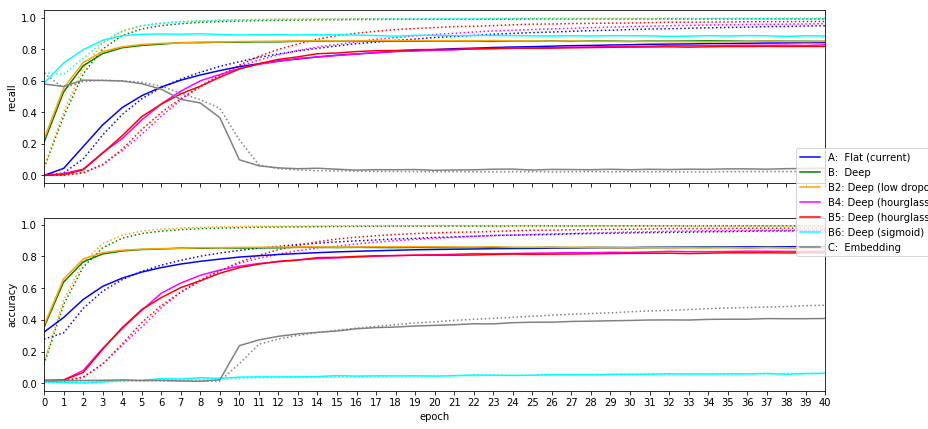

In [11]:
f, (ax1,ax2) = plt.subplots(2,1, sharex=True, figsize=(14,7))
#fx = np.arange(0, max([a.shape[0] for a in model_history]))
fx = np.arange(0, 50)
colors = ['blue', 'green', 'orange', 'magenta', 'red', 'cyan', 'grey']
for i, h in enumerate(model_history):
    ax1.plot(fx, h[0:50,2], ':', color=colors[i])
    ax2.plot(fx, h[0:50,3], ':', color=colors[i])
for i, h in enumerate(model_history):
    ax1.plot(fx, h[0:50,5], label=model_labels[i], color=colors[i])
    ax2.plot(fx, h[0:50,6], label=model_labels[i], color=colors[i])
ax1.set_ylabel('recall')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.set_xticks(fx)
ax2.set_xlim((0,40))
f.legend(bbox_to_anchor=(1,0.45),loc='center right')
None

It's clear that C and B6 are no options. While A does pretty well, with B4 and B5 converging slower, B and B2 are faster in reaching a good level. These may be improvements, with 5-10 epochs being enough (vs. 30 for A). B2 (low dropout) seems to be slightly above B (higher dropout).

## End comparison

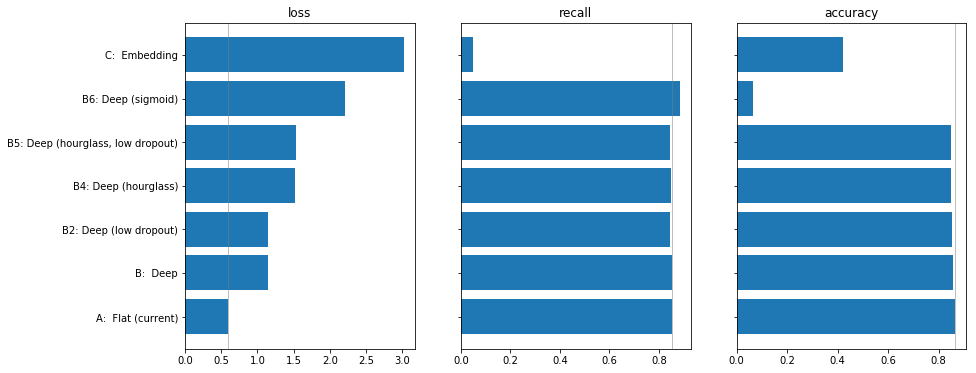

In [12]:
f, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize=(14,6))
fy = np.arange(0, model_scores.shape[0])
ax1.axvline(x=model_scores[0,0], color='grey', linewidth=0.5)
ax2.axvline(x=model_scores[0,1], color='grey', linewidth=0.5)
ax3.axvline(x=model_scores[0,2], color='grey', linewidth=0.5)
ax1.barh(fy, model_scores[:,0])
ax2.barh(fy, model_scores[:,1])
ax3.barh(fy, model_scores[:,2])
ax1.set_title('loss')
ax2.set_title('recall')
ax3.set_title('accuracy')
ax1.set_yticks(fy)
ax1.set_yticklabels(model_labels)
None

Compared to the current flat model, there is not much to improve by using a deeper model (with the parameters tried here).

# Conclusion

Using name and brand as features is doing quite well. Adding ingredients or categories can help, but just a little. Adding them both does not seem such a good idea (there is a trade-off between new words being introduced - looking at the influence of max_words may help).

The current flat (two-layer) model seems to be the best among a number of other deep neural networks. Adding a few layers to the flat model may decrease training time, but may even slightly hurt performance. There may be things to win by creating our own embedding layers, but that was outside the scope of this experiment.